# Python Capstone Part 2
# Modeliing

In [1]:
!pip install missingno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msn

from sklearn.preprocessing import RobustScaler # preprocessing
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn import base
from sklearn.model_selection import KFold
from warnings import filterwarnings
from scipy.stats import zscore
from IPython.display import Image
import pickle

%matplotlib inline
sns.set(style = 'darkgrid', palette = 'bright')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')
filterwarnings(action = 'ignore')

In [2]:
pd.options.display.max_rows = 101
pd.options.display.max_columns = 101
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(10)

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   
5         990025                       KKh 060                    0.824692   
6         990025                       Grus II                    0.657457   
7         990025                      UGCA 292                    0.951043   
8         990025                   Aquarius II                    0.657402   
9         990025                  Andromeda XI                    0.657180   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   
5                      63.887135             28409.062695      0.671697   
6                      68.555326             25648.328827      0.745674   
7                      75.693397             20935.541513      0.947961   
8                      61.337084             18231.029378      0.826377   
9                      62.554929             16196.125655      0.679096   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   
5                                     14.062458   
6                                     15.434546   
7                                     14.862880   
8                                     15.173325   
9                                     12.937281   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   
5                                  9.978597   
6                                 10.021786   
7                                       NaN   
8                                  6.941815   
9                                  6.529242   

   Intergalactic Development Index (IDI)  Education Index  \
0                                    NaN              NaN   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                                    NaN              NaN   
4                               0.910341         0.918353   
5                               0.815264         0.796807   
6                               0.662192         0.743891   
7                                    NaN              NaN   
8                               0.725536         0.647240   
9                               0.561520         0.482450   

   Intergalactic Development Index (IDI), Rank  \
0                                          NaN   
1                                   152.522198   
2                                   209.813266   
3                                          NaN   
4                                    71.885345   
5                                   121.839696   
6                                   149.567075   
7                                          NaN   
8                                   168.487029   
9                                   154.098787   

   Population u

In [5]:
df_test.head(10)

galactic year                                galaxy  \
0        1007012                               KK98 77   
1        1007012                         Reticulum III   
2        1008016                         Reticulum III   
3        1007012                               Segue 1   
4        1013042                               Virgo I   
5        1012036  Wolf-Lundmark-Melotte (WLM, DDO 221)   
6        1011030                         Reticulum III   
7        1009020                               KK98 77   
8        1007012                                KKR 25   
9        1010025                               KK98 77   

   existence expectancy index  existence expectancy at birth  \
0                    0.456086                      51.562543   
1                    0.529835                      57.228262   
2                    0.560976                      59.379539   
3                    0.565910                      59.952390   
4                    0.588274                      55.428320   
5                    0.589654                      66.588119   
6                    0.589852                      65.929589   
7                    0.594438                      59.766365   
8                    0.598516                      61.178249   
9                    0.598777                      63.967935   

   Gross income per capita  Income Index  \
0             12236.576447      0.593325   
1              3431.883825      0.675407   
2             27562.914252      0.594624   
3             20352.232905      0.837700   
4             23959.704016      0.520579   
5             14004.867808      0.724970   
6             13188.133433      0.618425   
7             10395.817571      0.563009   
8             24639.661929      0.791240   
9             29450.026633      0.624785   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                                     11.774890   
3                                     11.613621   
4                                     10.392416   
5                                     11.918349   
6                                     11.225966   
7                                     11.756748   
8                                     11.389803   
9                                     11.061482   

   Mean years of education (galactic years)  \
0                                 10.699072   
1                                  5.311122   
2                                  5.937797   
3                                 10.067882   
4                                  6.374637   
5                                  4.147414   
6                                  5.264255   
7                                  9.914050   
8                                  8.200359   
9                                 10.699379   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.547114         0.556267   
1                               0.497688         0.409969   
2                               0.544744         0.486167   
3                               0.691641         0.523441   
4                               0.530676         0.580418   
5                               0.563767         0.491936   
6                               0.658853         0.406619   
7                               0.662800         0.675582   
8                               0.691245         0.723380   
9                               0.667834         0.668096   

   Intergalactic Development Index (IDI), Rank  \
0                                   232.621842   
1                                   247.580771   
2                                   249.798771   
3                                   211.505060   
4                                   234.721069   
5                                   223.105519   
6                                   229.653879   
7                     

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 80 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   galactic year                                                                            3865 non-null   int64  
 1   galaxy                                                                                   3865 non-null   object 
 2   existence expectancy index                                                               3864 non-null   float64
 3   existence expectancy at birth                                                            3864 non-null   float64
 4   Gross income per capita                                                                  3837 non-null   float64
 5   Income Index                                                  

In [7]:
print(df_train.columns)
print(df_train.shape)
df_test.shape

Index(['galactic year', 'galaxy', 'existence expectancy index',
       'existence expectancy at birth', 'Gross income per capita',
       'Income Index', 'Expected years of education (galactic years)',
       'Mean years of education (galactic years)',
       'Intergalactic Development Index (IDI)', 'Education Index',
       'Intergalactic Development Index (IDI), Rank',
       'Population using at least basic drinking-water services (%)',
       'Population using at least basic sanitation services (%)',
       'Gross capital formation (% of GGP)', 'Population, total (millions)',
       'Population, urban (%)',
       'Mortality rate, under-five (per 1,000 live births)',
       'Mortality rate, infant (per 1,000 live births)',
       'Old age dependency ratio (old age (65 and older) per 100 creatures (ages 15-64))',
       'Population, ages 15–64 (millions)',
       'Population, ages 65 and older (millions)',
       'Life expectancy at birth, male (galactic years)',
       'Life expect

(890, 79)

<AxesSubplot:>

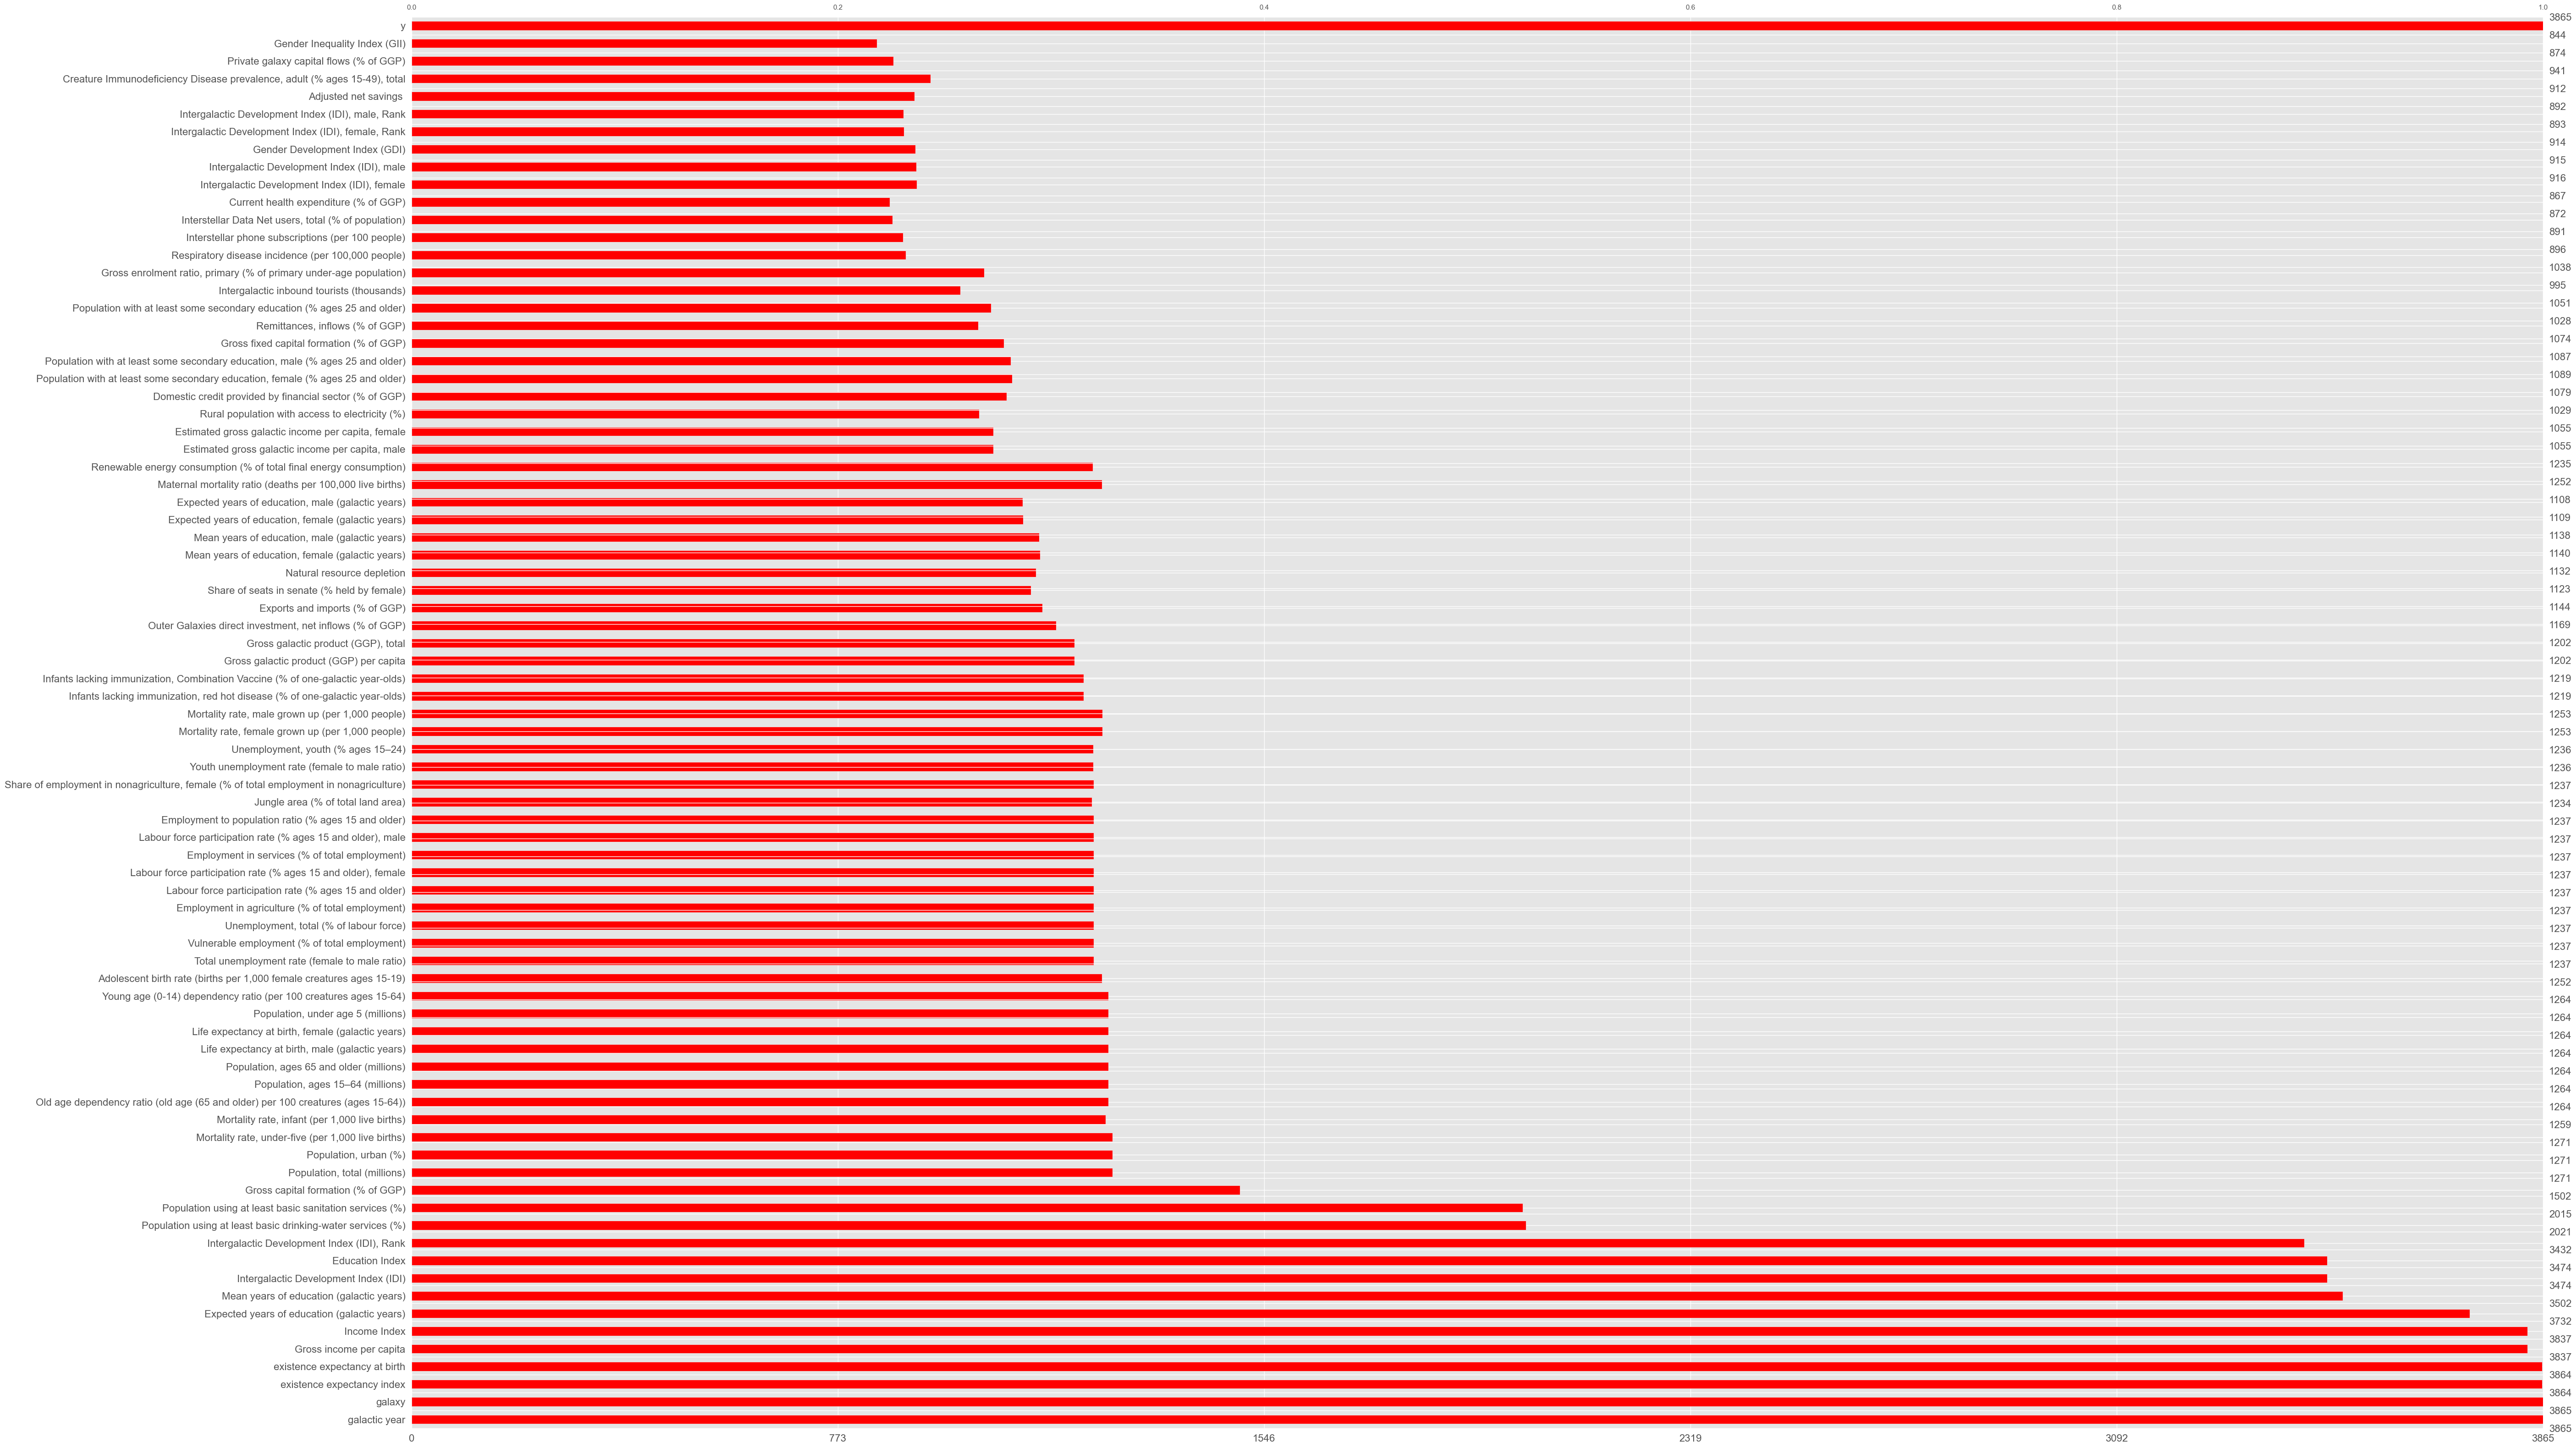

In [8]:
msn.bar(df_train, figsize=(60, 40), color='red')

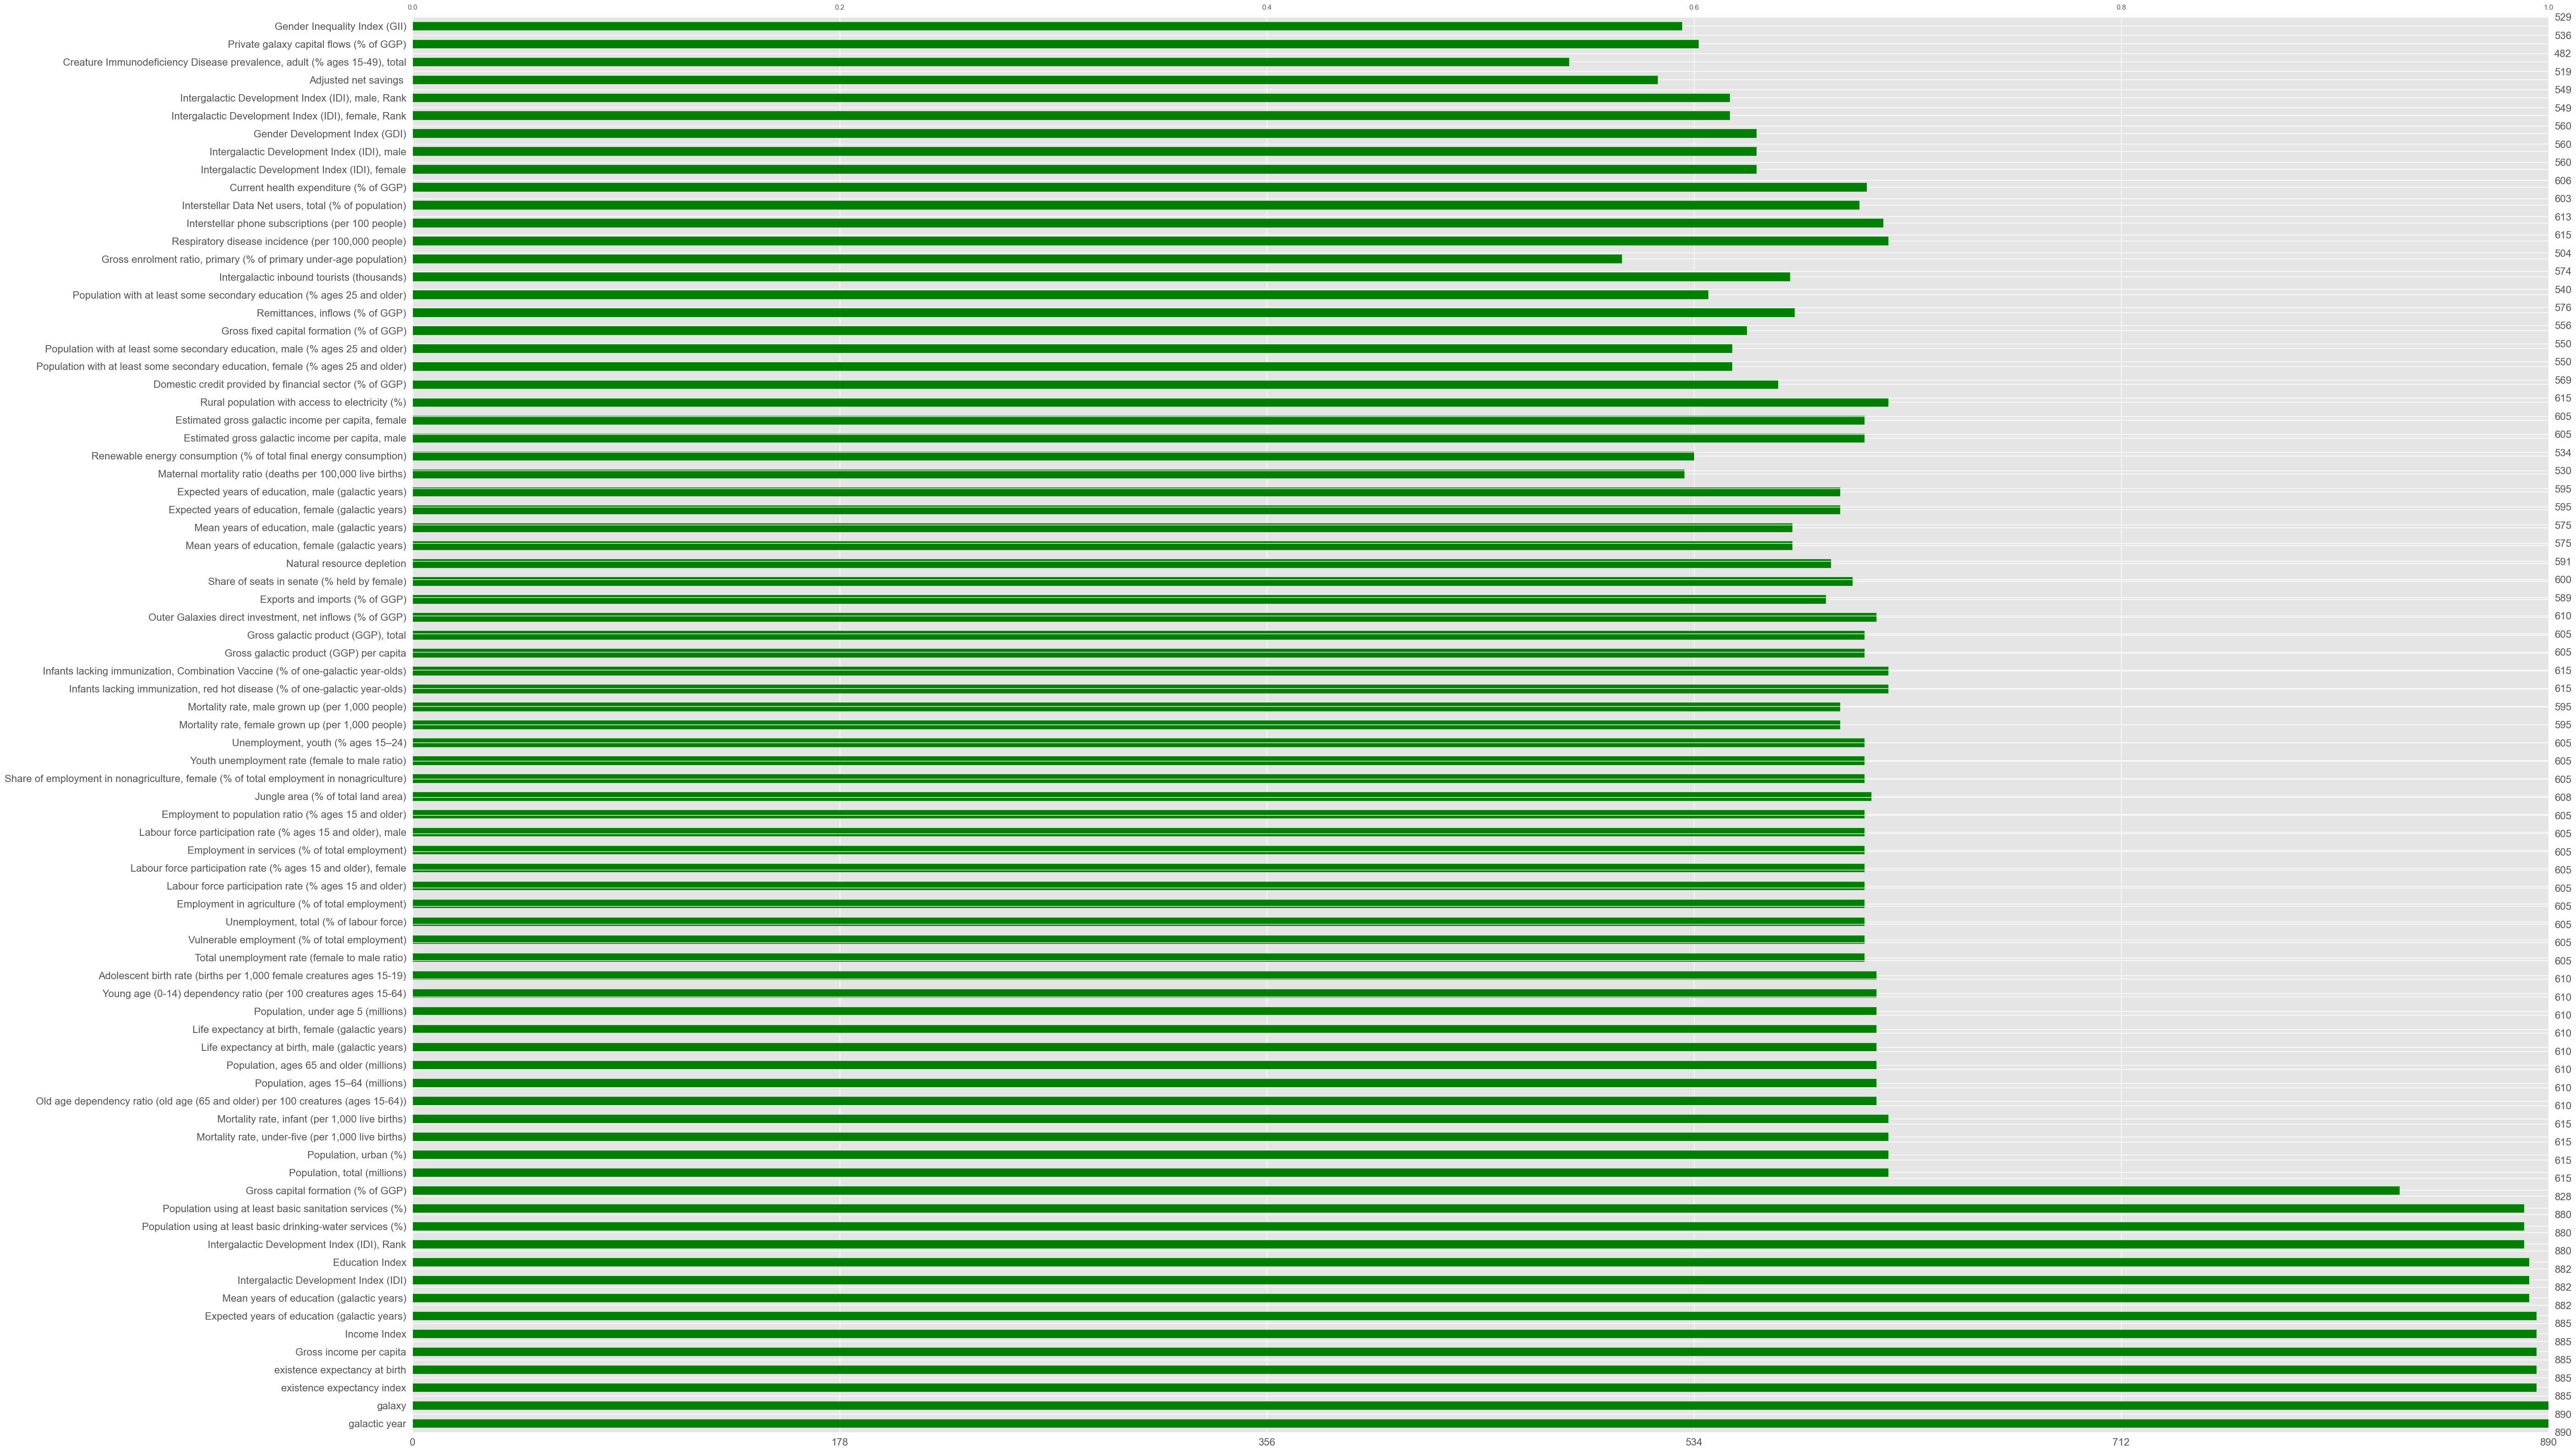

In [9]:
msn.bar(df_test,figsize=(60, 40), color='green')
plt.show()

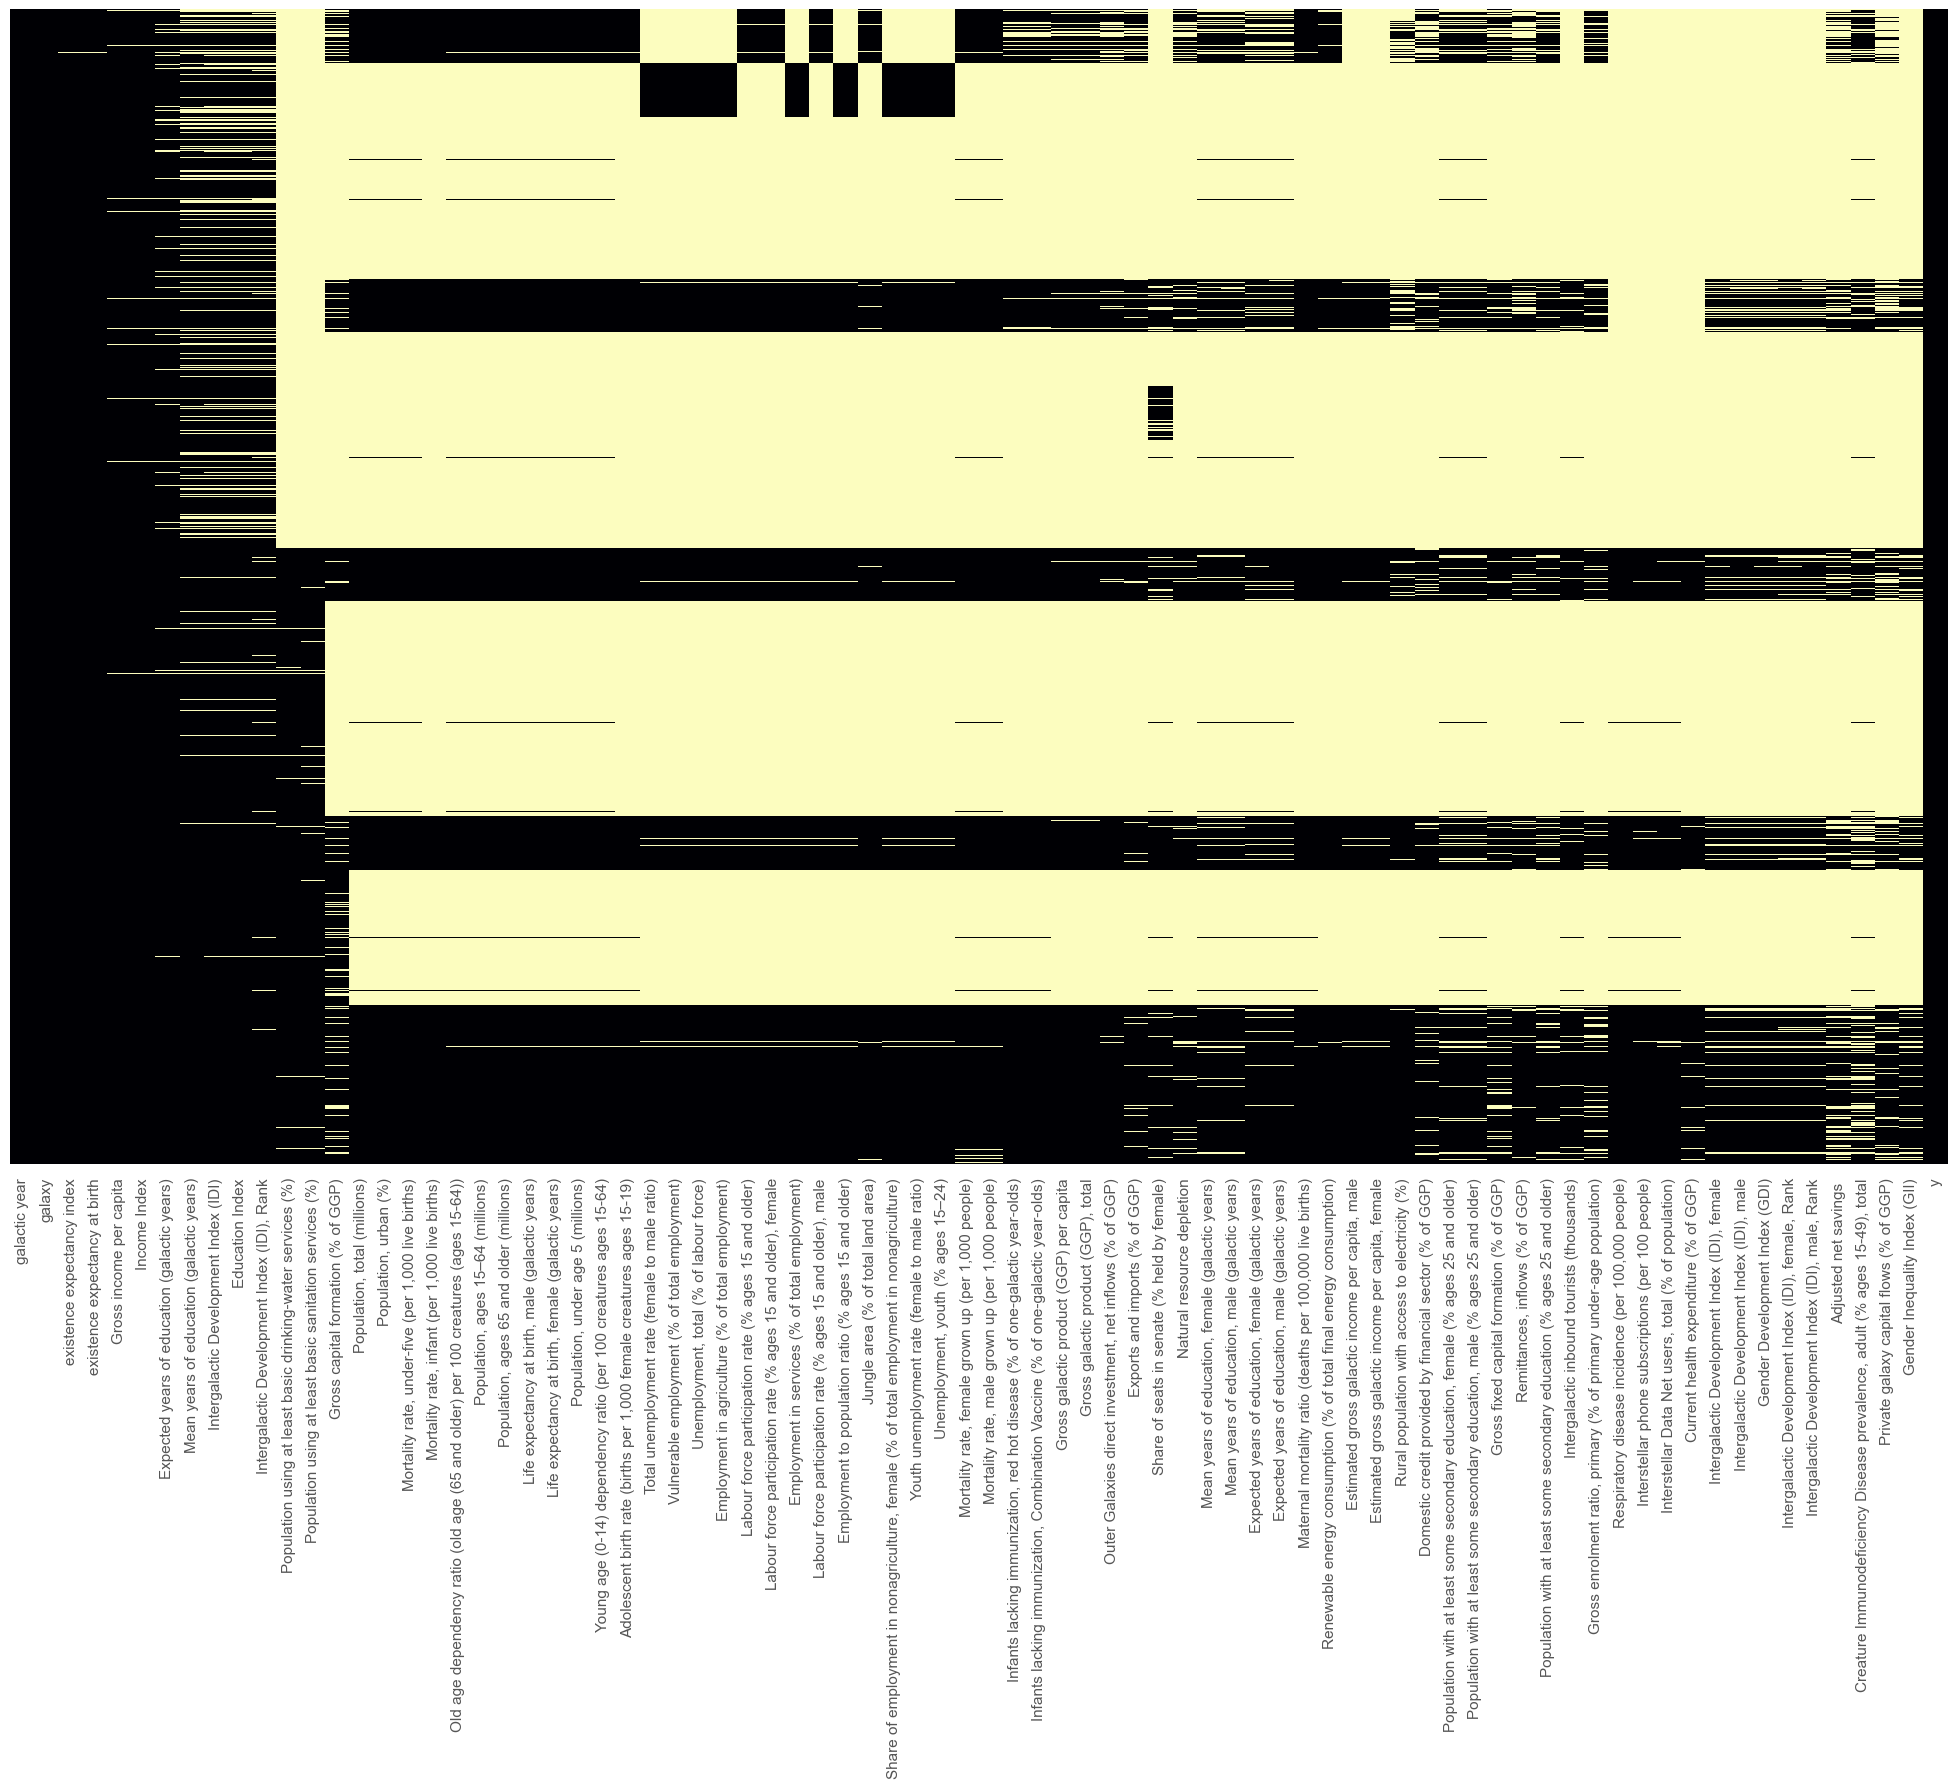

In [10]:
plt.figure(figsize = (25,15))
sns.heatmap(data = df_train.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

In [11]:
df_train['Intergalactic Development Index (IDI), female, Rank']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3860    124.564121
3861    163.664516
3862     66.498714
3863    182.249079
3864     57.204155
Name: Intergalactic Development Index (IDI), female, Rank, Length: 3865, dtype: float64

In [12]:
df_train['galaxy'].value_counts()

Andromeda XXII[57]                             26
Tucana Dwarf                                   26
Andromeda XXIV                                 26
Andromeda XIX[60]                              26
Andromeda XII                                  26
                                               ..
Sagittarius Dwarf Irregular Galaxy (SagDIG)    17
Aquarius Dwarf Galaxy (DDO 210)                17
Andromeda XXI[57]                              17
Pegasus Dwarf Irregular (DDO 216)              17
NGC 5253                                        1
Name: galaxy, Length: 181, dtype: int64

In [13]:
df_test['galaxy'].value_counts()

Pegasus Dwarf Irregular (DDO 216)              10
Andromeda XXI[57]                              10
Sagittarius Dwarf Irregular Galaxy (SagDIG)    10
Wolf-Lundmark-Melotte (WLM, DDO 221)           10
Andromeda X                                    10
                                               ..
Pisces II                                       1
Pegasus III                                     1
Canes Venatici II Dwarf                         1
Leo IV Dwarf                                    1
Boötes IV                                       1
Name: galaxy, Length: 172, dtype: int64

<AxesSubplot:xlabel='galactic year', ylabel='count'>

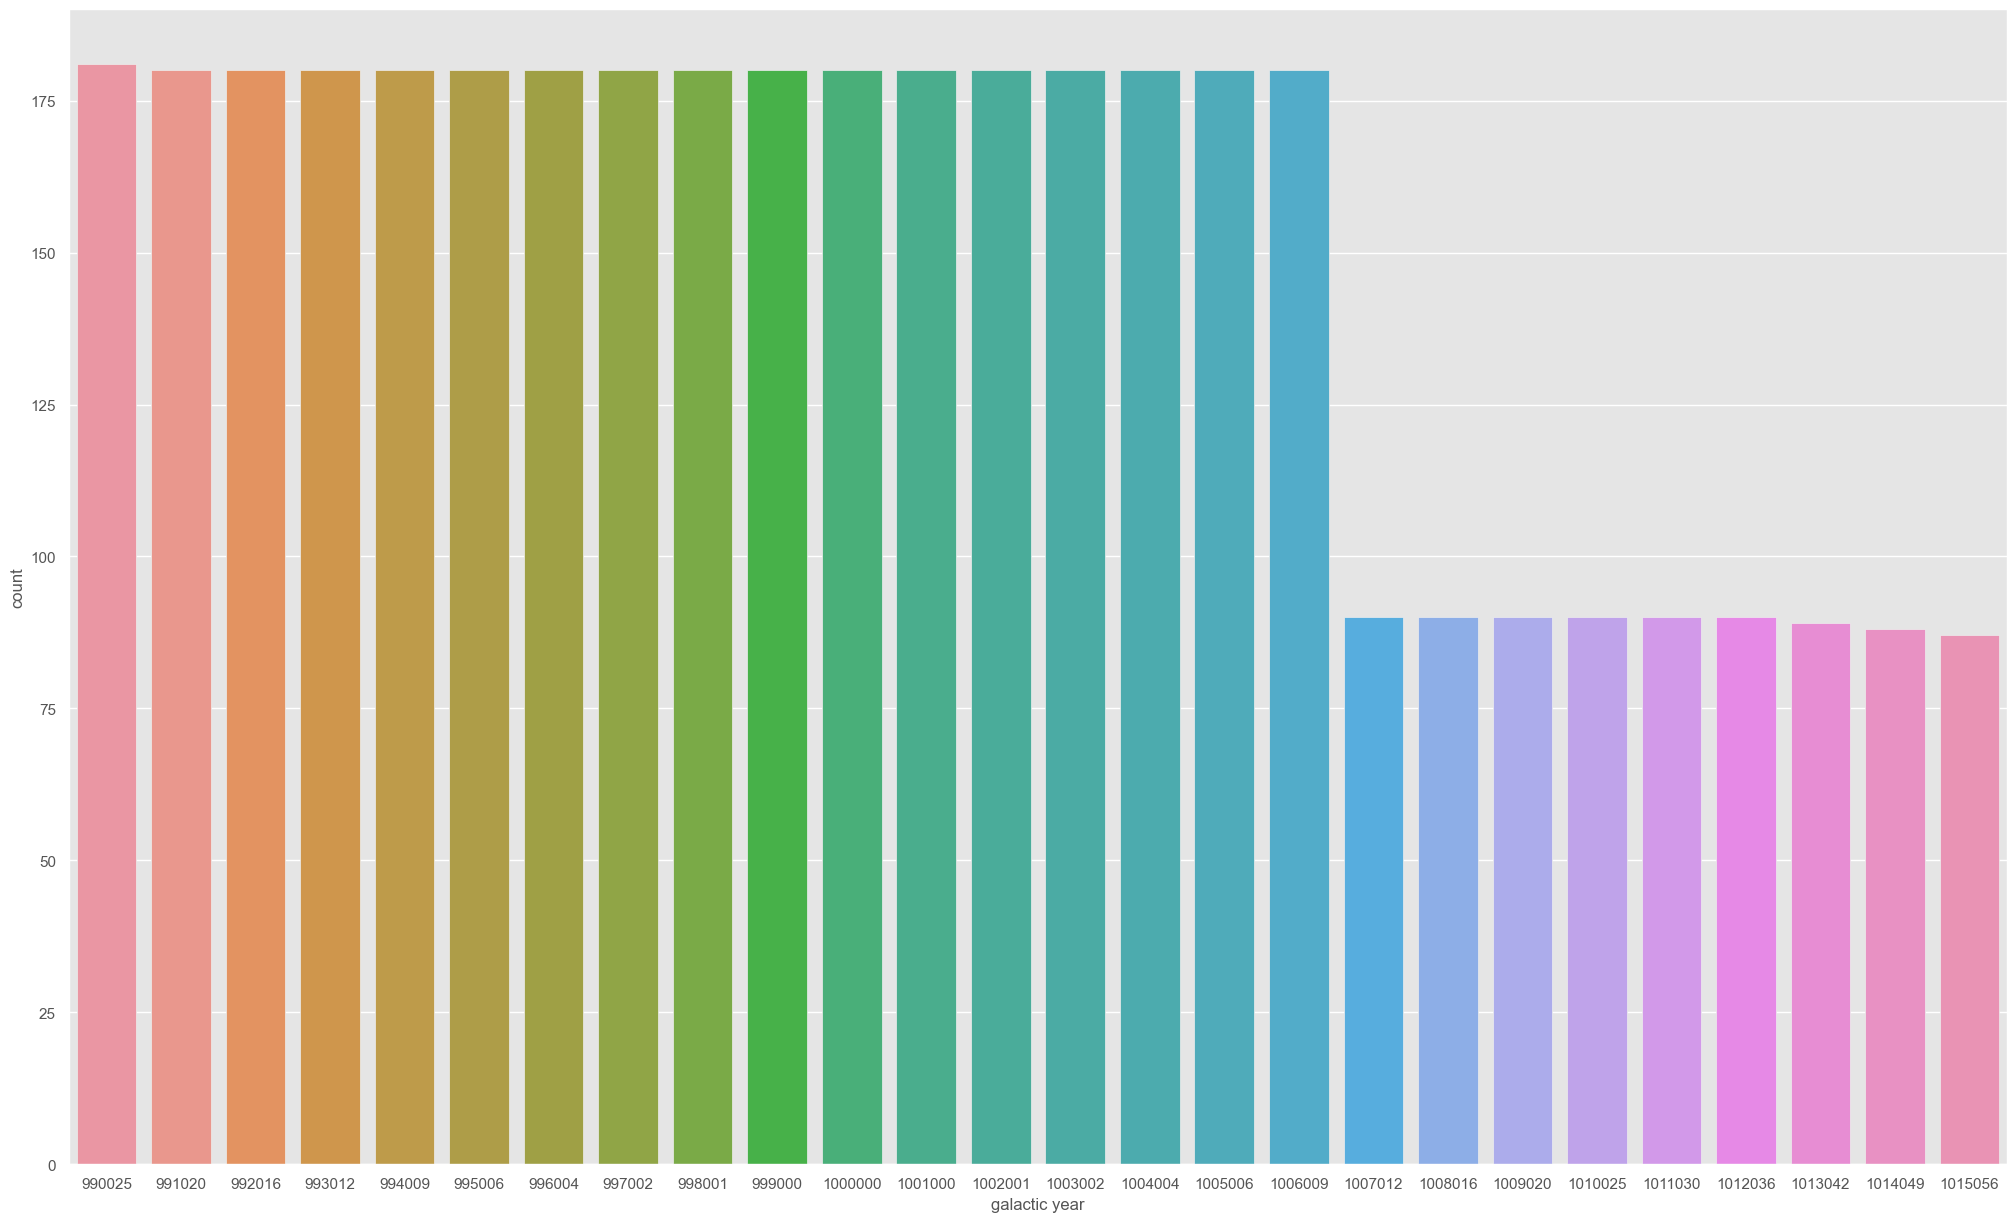

In [14]:
plt.figure(figsize = (25,15))
sns.countplot(x=df_train['galactic year'])

<AxesSubplot:xlabel='galactic year', ylabel='count'>

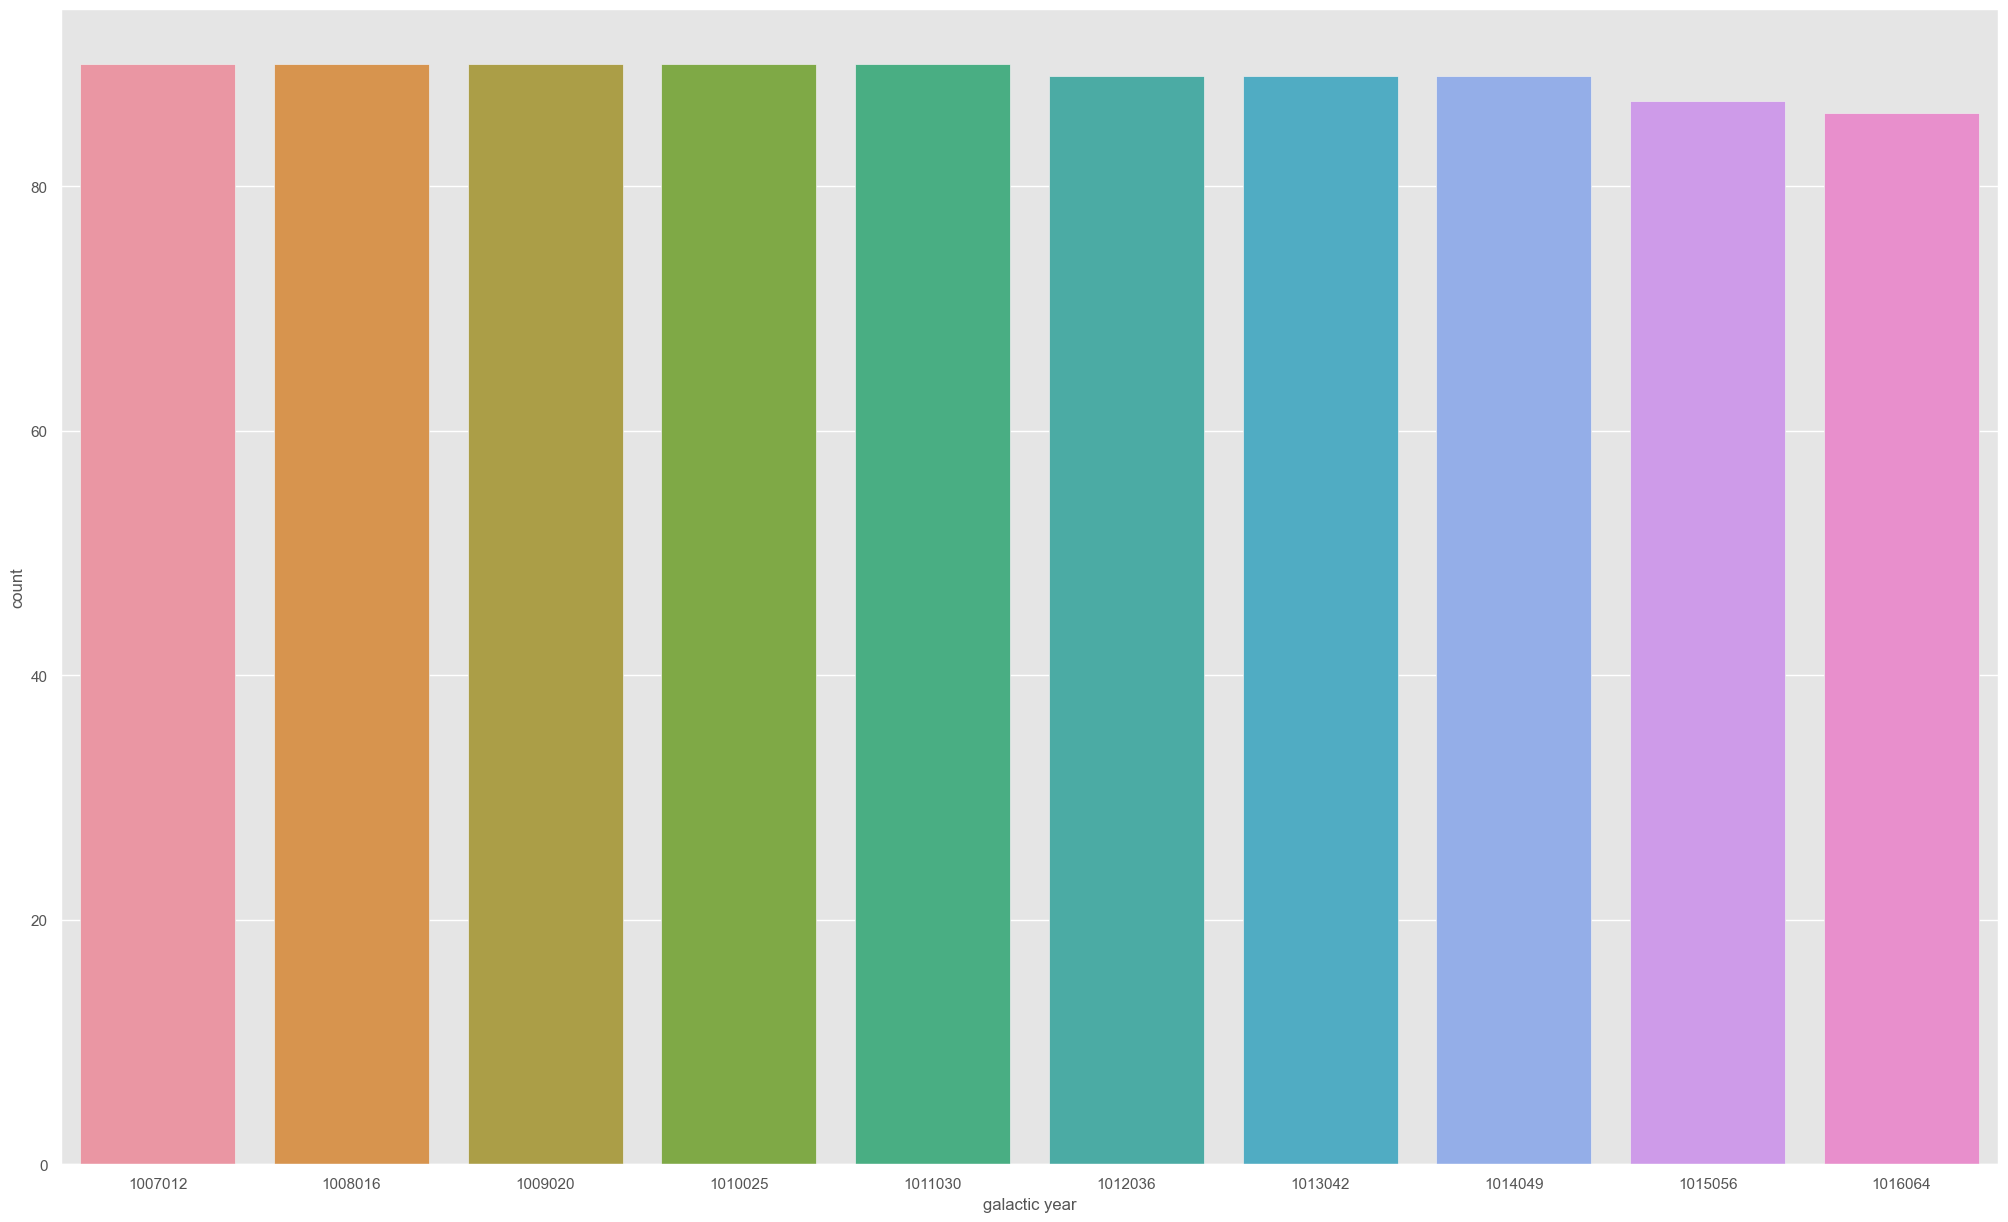

In [15]:
plt.figure(figsize = (25,15))
sns.countplot(x=df_test['galactic year'])

<Figure size 4000x3000 with 0 Axes>

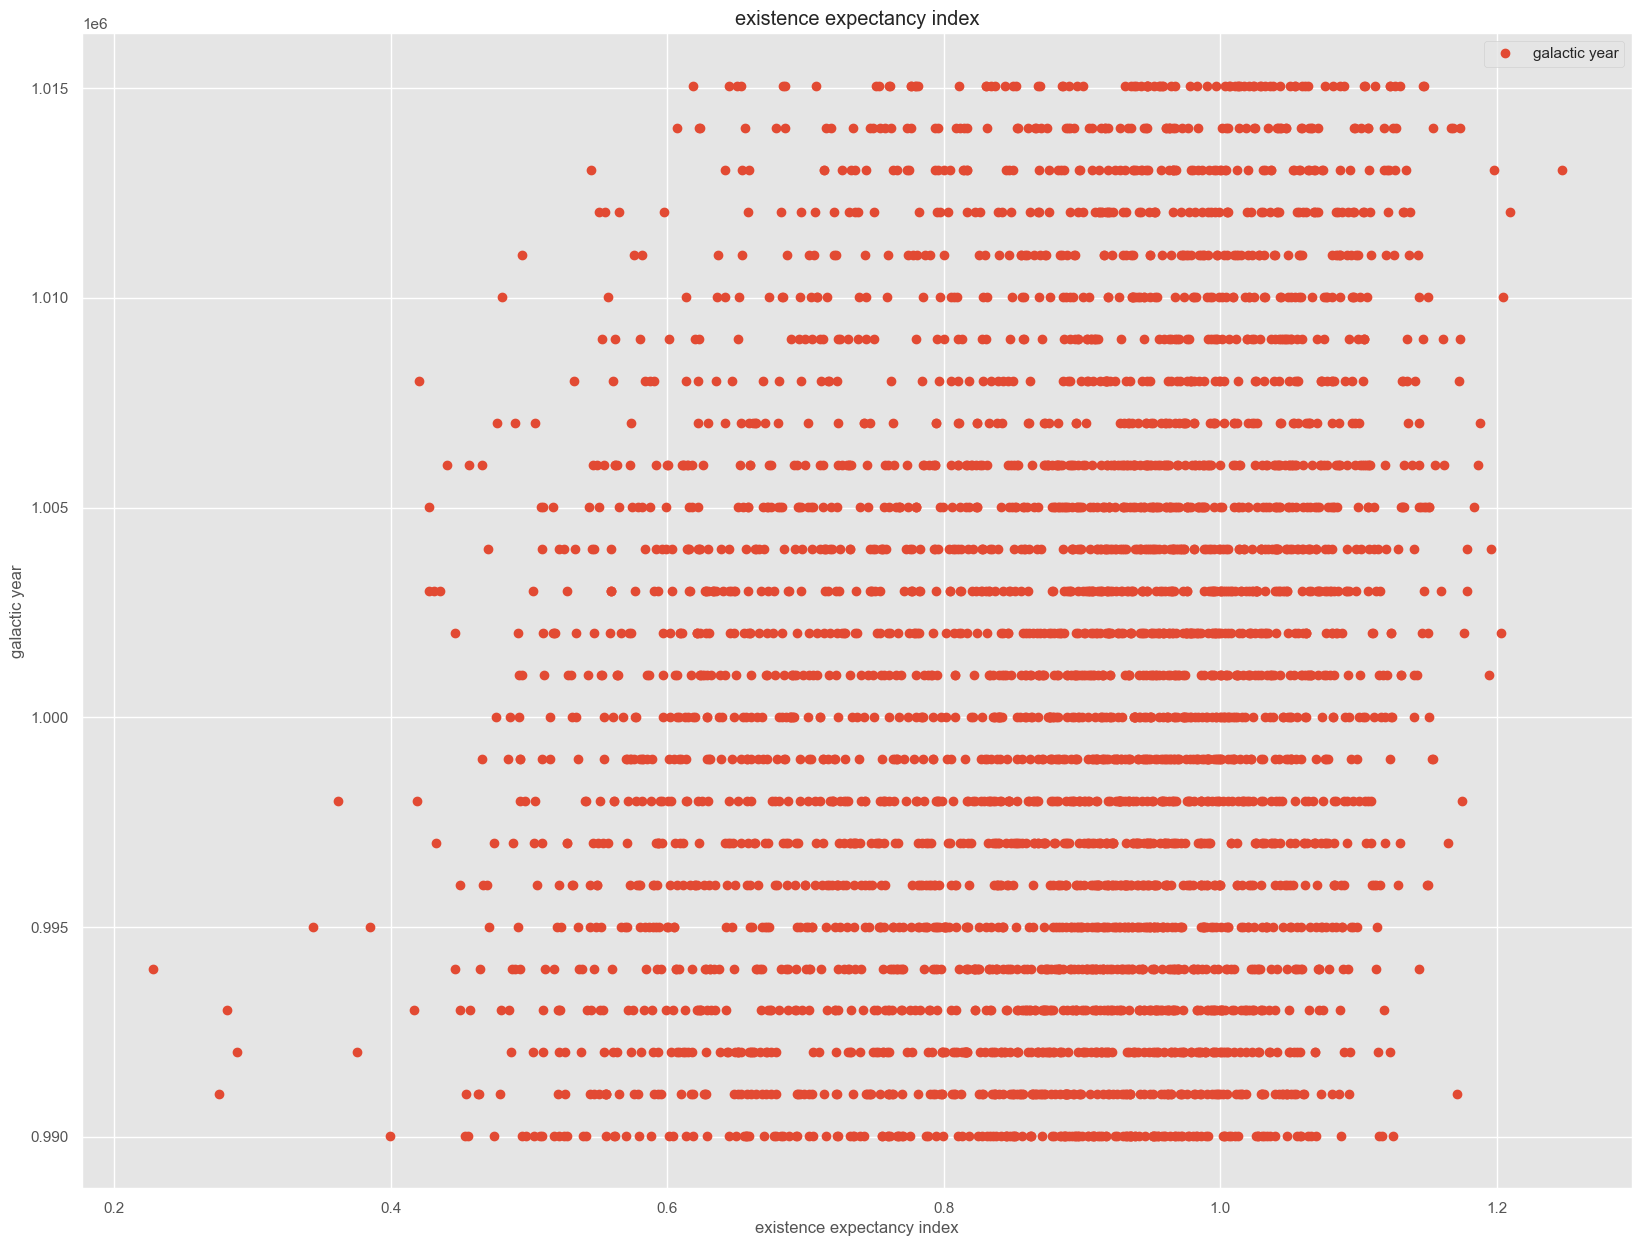

In [16]:
plt.figure(figsize = (40,30))
df_train.plot(x='existence expectancy index', y='galactic year', style='o')  
plt.title('existence expectancy index')  
plt.xlabel('existence expectancy index')  
plt.ylabel('galactic year')  
plt.show()

<Figure size 4000x3000 with 0 Axes>

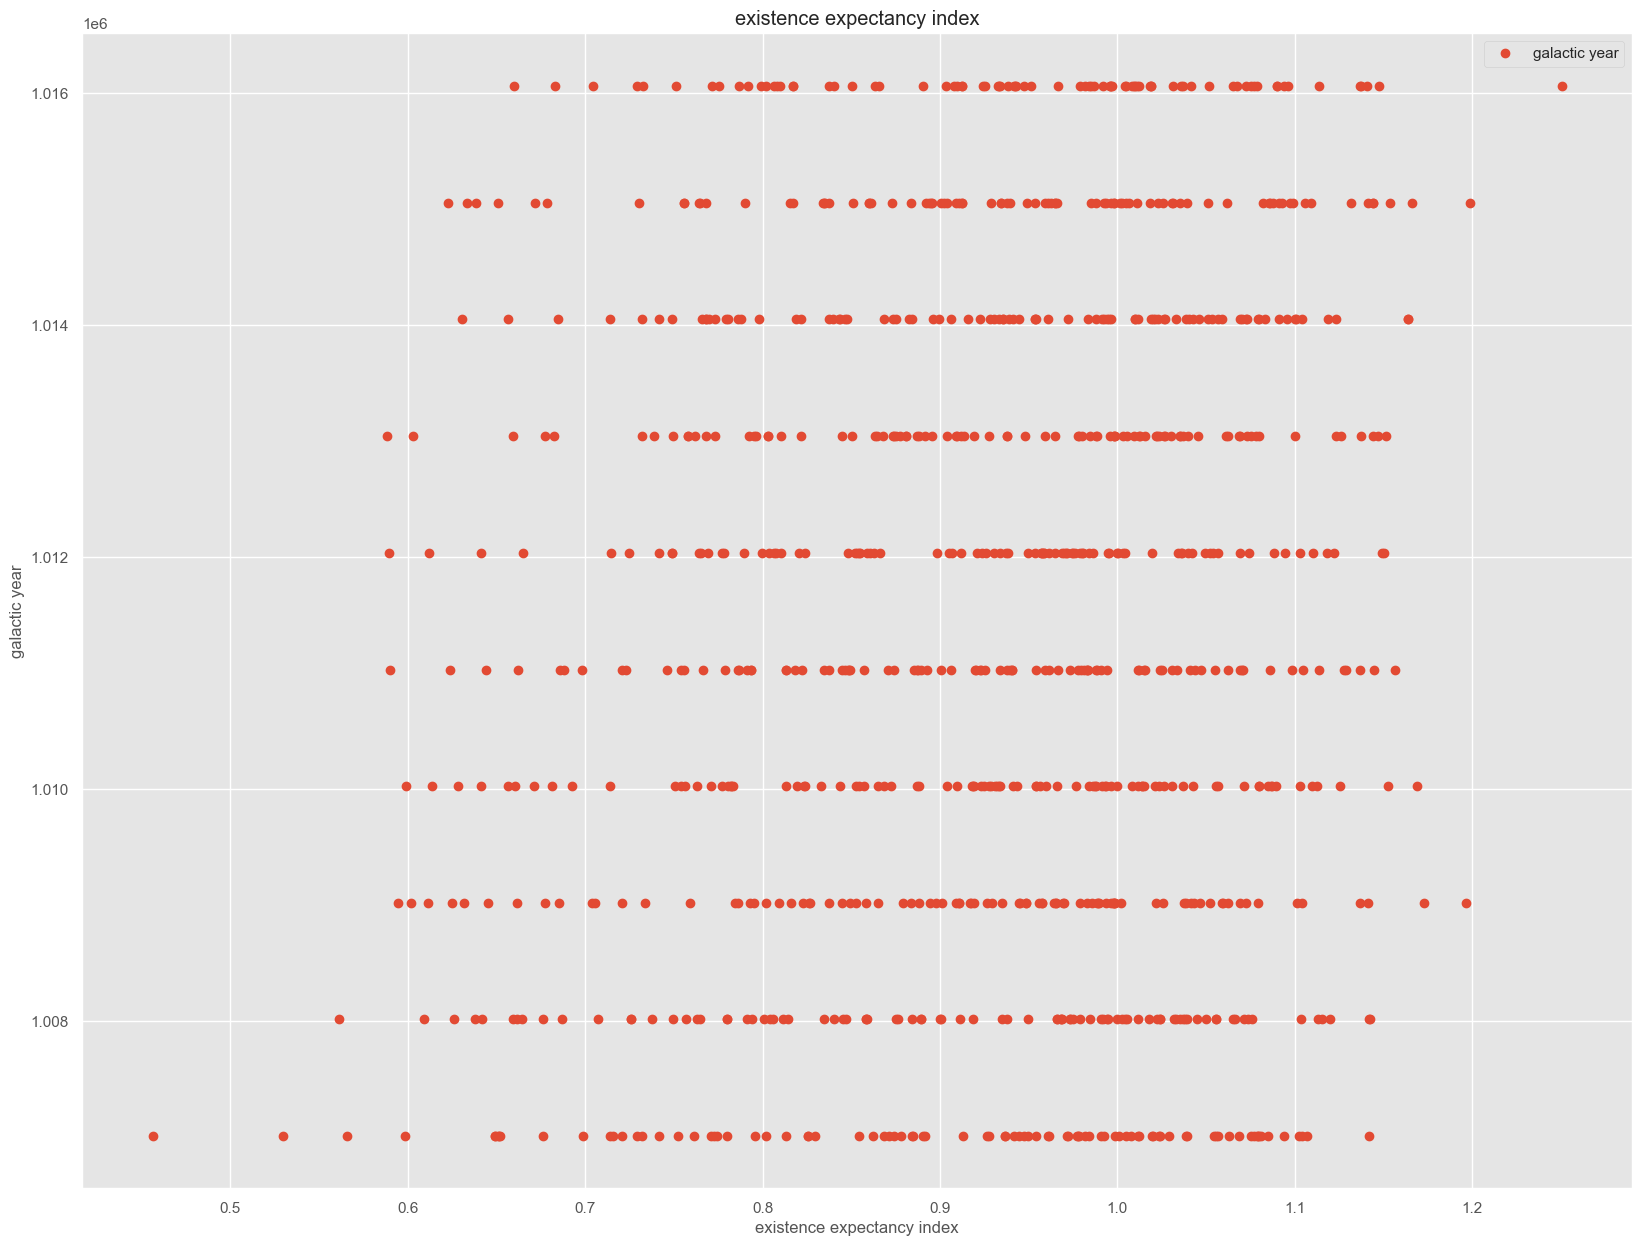

In [17]:
plt.figure(figsize = (40,30))
df_test.plot(x='existence expectancy index', y='galactic year', style='o')  
plt.title('existence expectancy index')  
plt.xlabel('existence expectancy index')  
plt.ylabel('galactic year')  
plt.show()

<AxesSubplot:xlabel='Gross income per capita', ylabel='Density'>

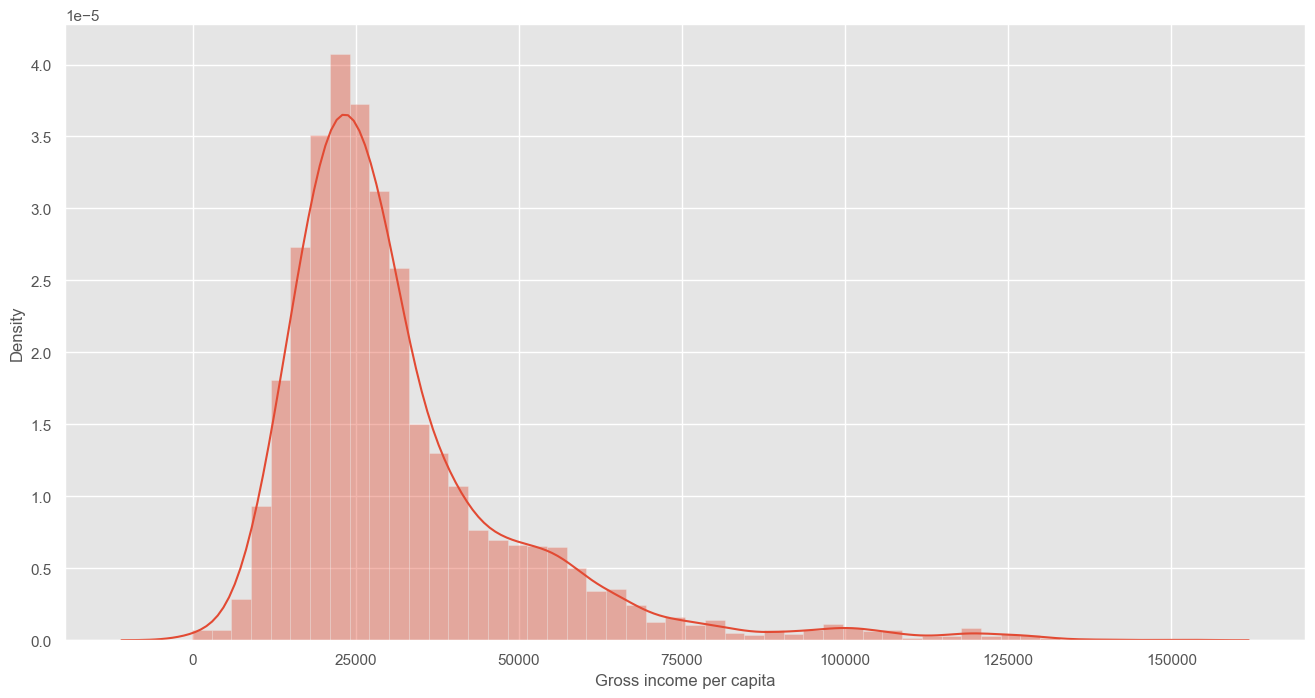

In [18]:
import seaborn as seabornInstance
plt.figure(figsize=(16,8))
plt.tight_layout()
seabornInstance.distplot(df_train['Gross income per capita'])

<AxesSubplot:xlabel='Gross income per capita', ylabel='Density'>

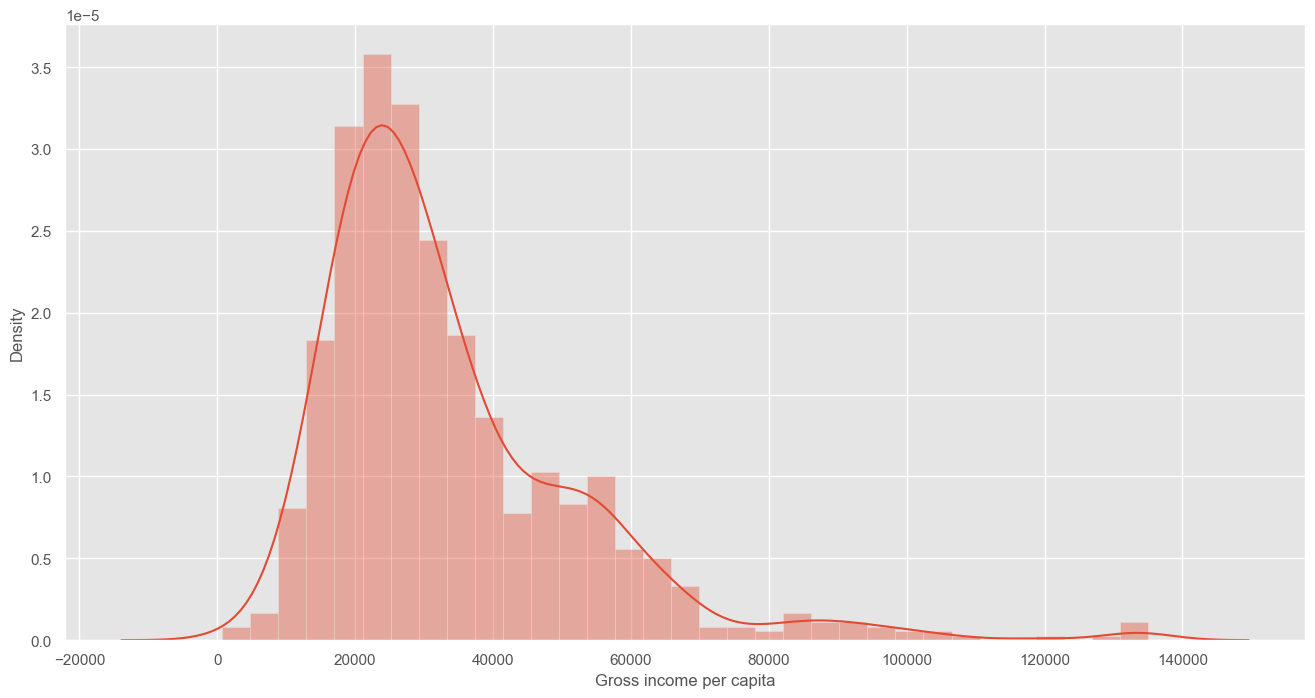

In [19]:
plt.figure(figsize=(16,8))
plt.tight_layout()
seabornInstance.distplot(df_test['Gross income per capita'])

<AxesSubplot:xlabel='Income Index', ylabel='Density'>

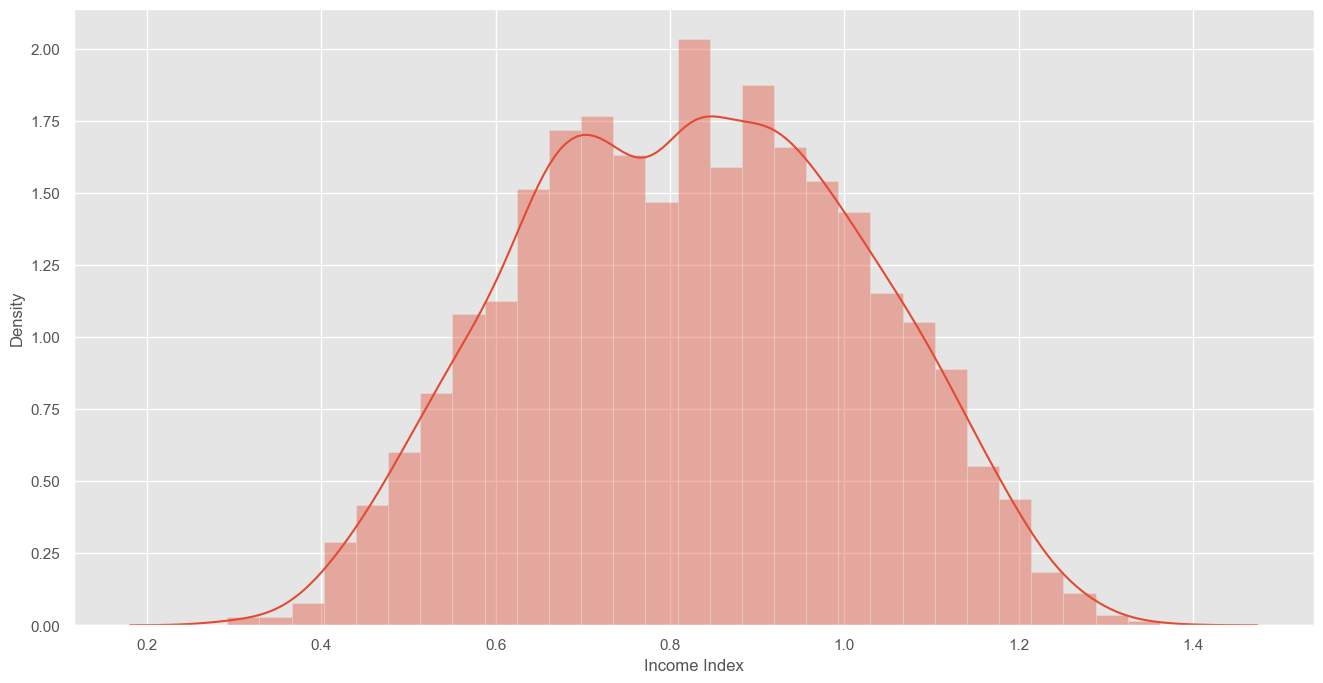

In [20]:
plt.figure(figsize=(16,8))
plt.tight_layout()
seabornInstance.distplot(df_train['Income Index'])


<AxesSubplot:xlabel='Income Index', ylabel='Density'>

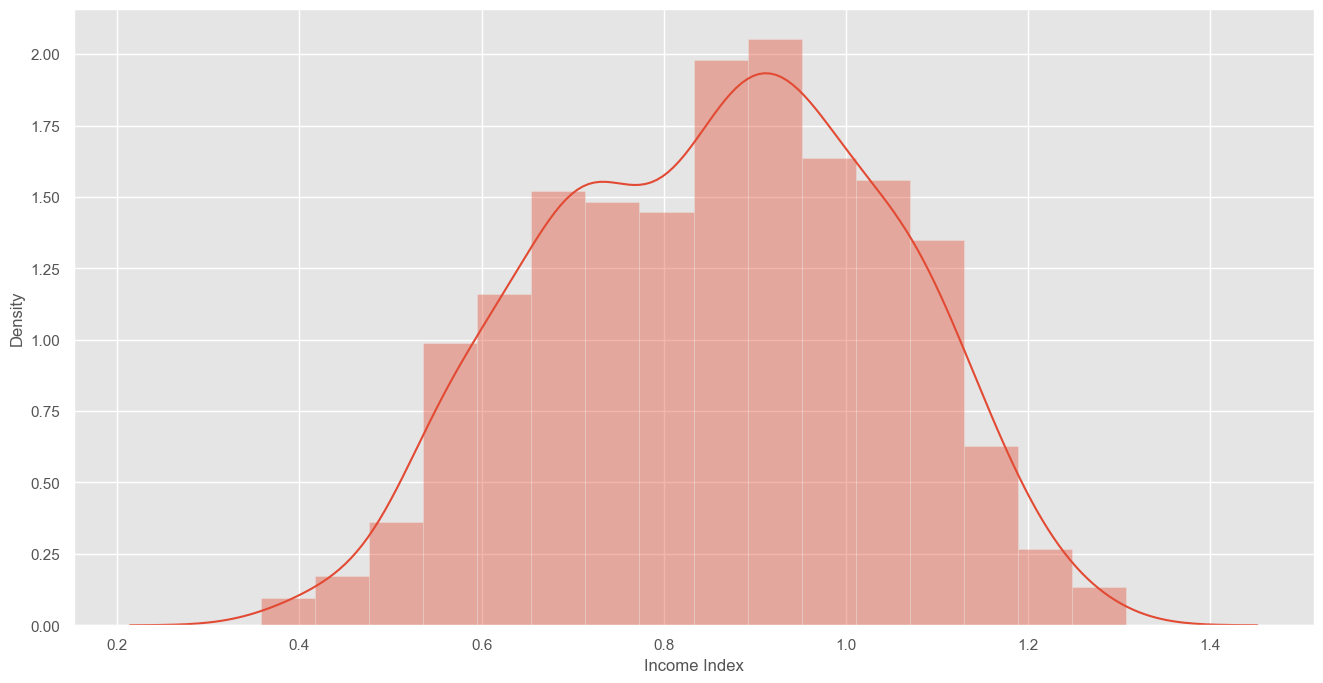

In [21]:
plt.figure(figsize=(16,8))
plt.tight_layout()
seabornInstance.distplot(df_test['Income Index'])

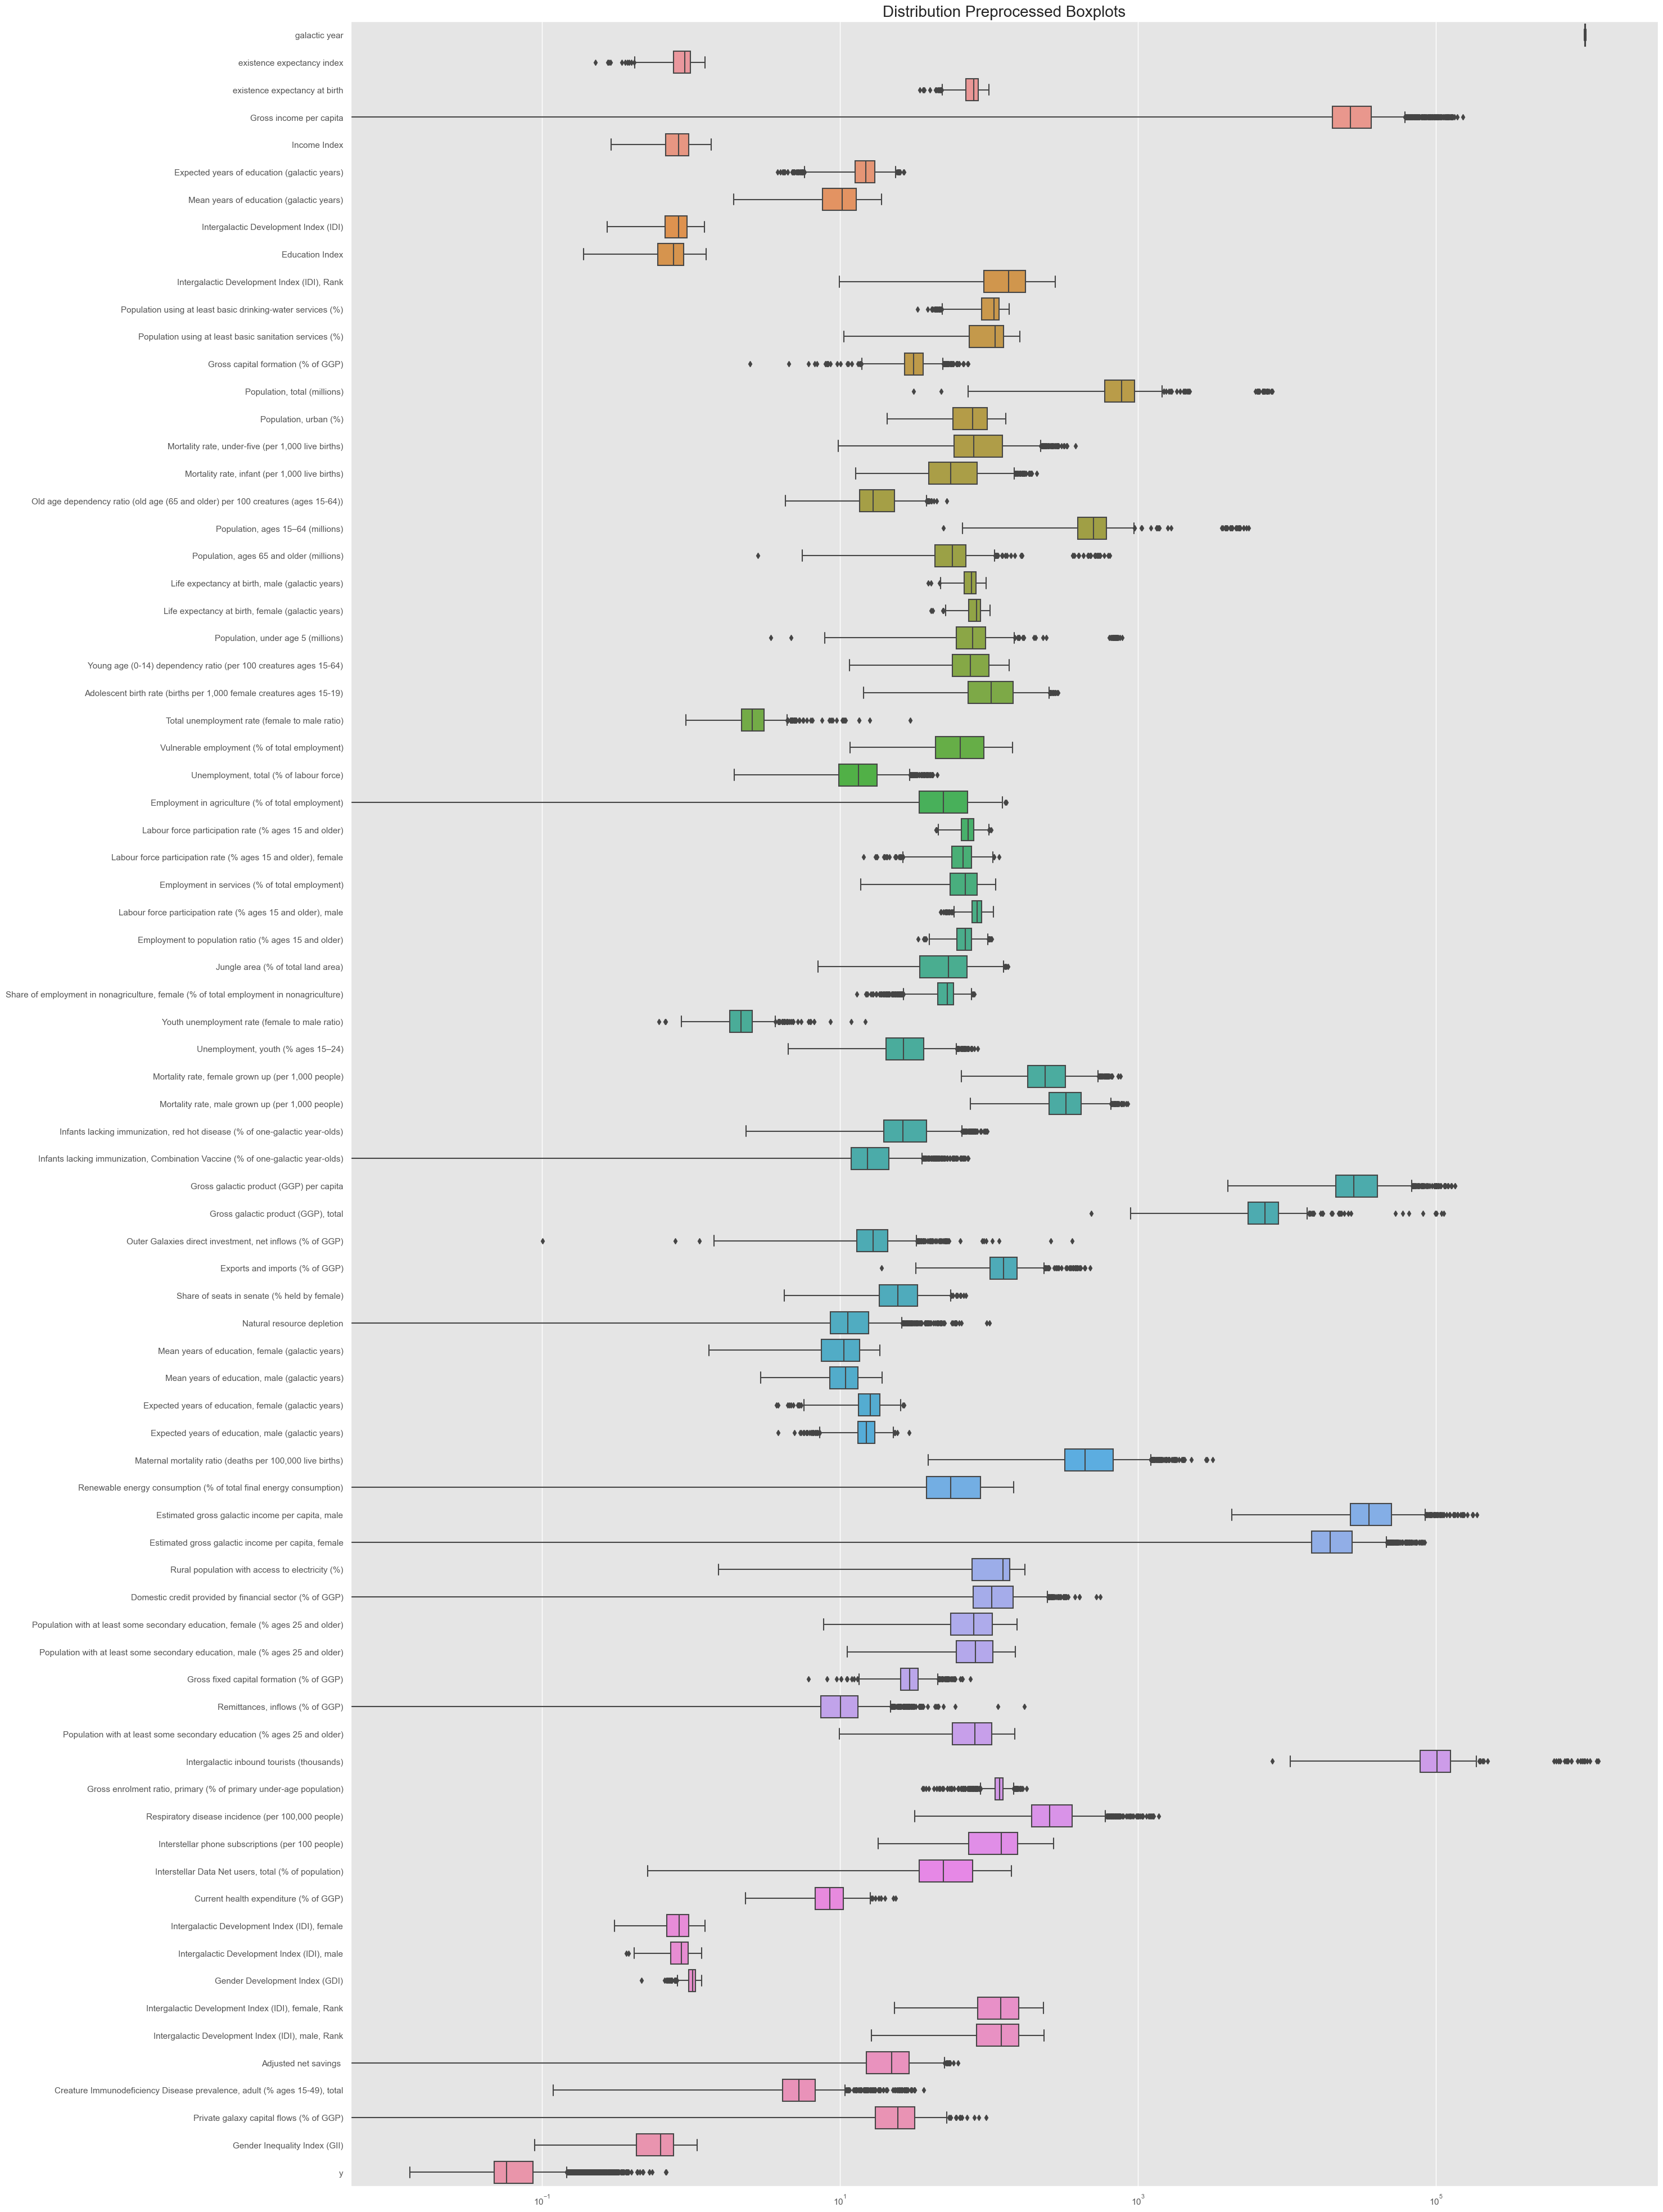

In [22]:
plt.figure(figsize = (30,50))
ax = sns.boxplot(data=df_train, orient="h")
ax.set_title('Distribution Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

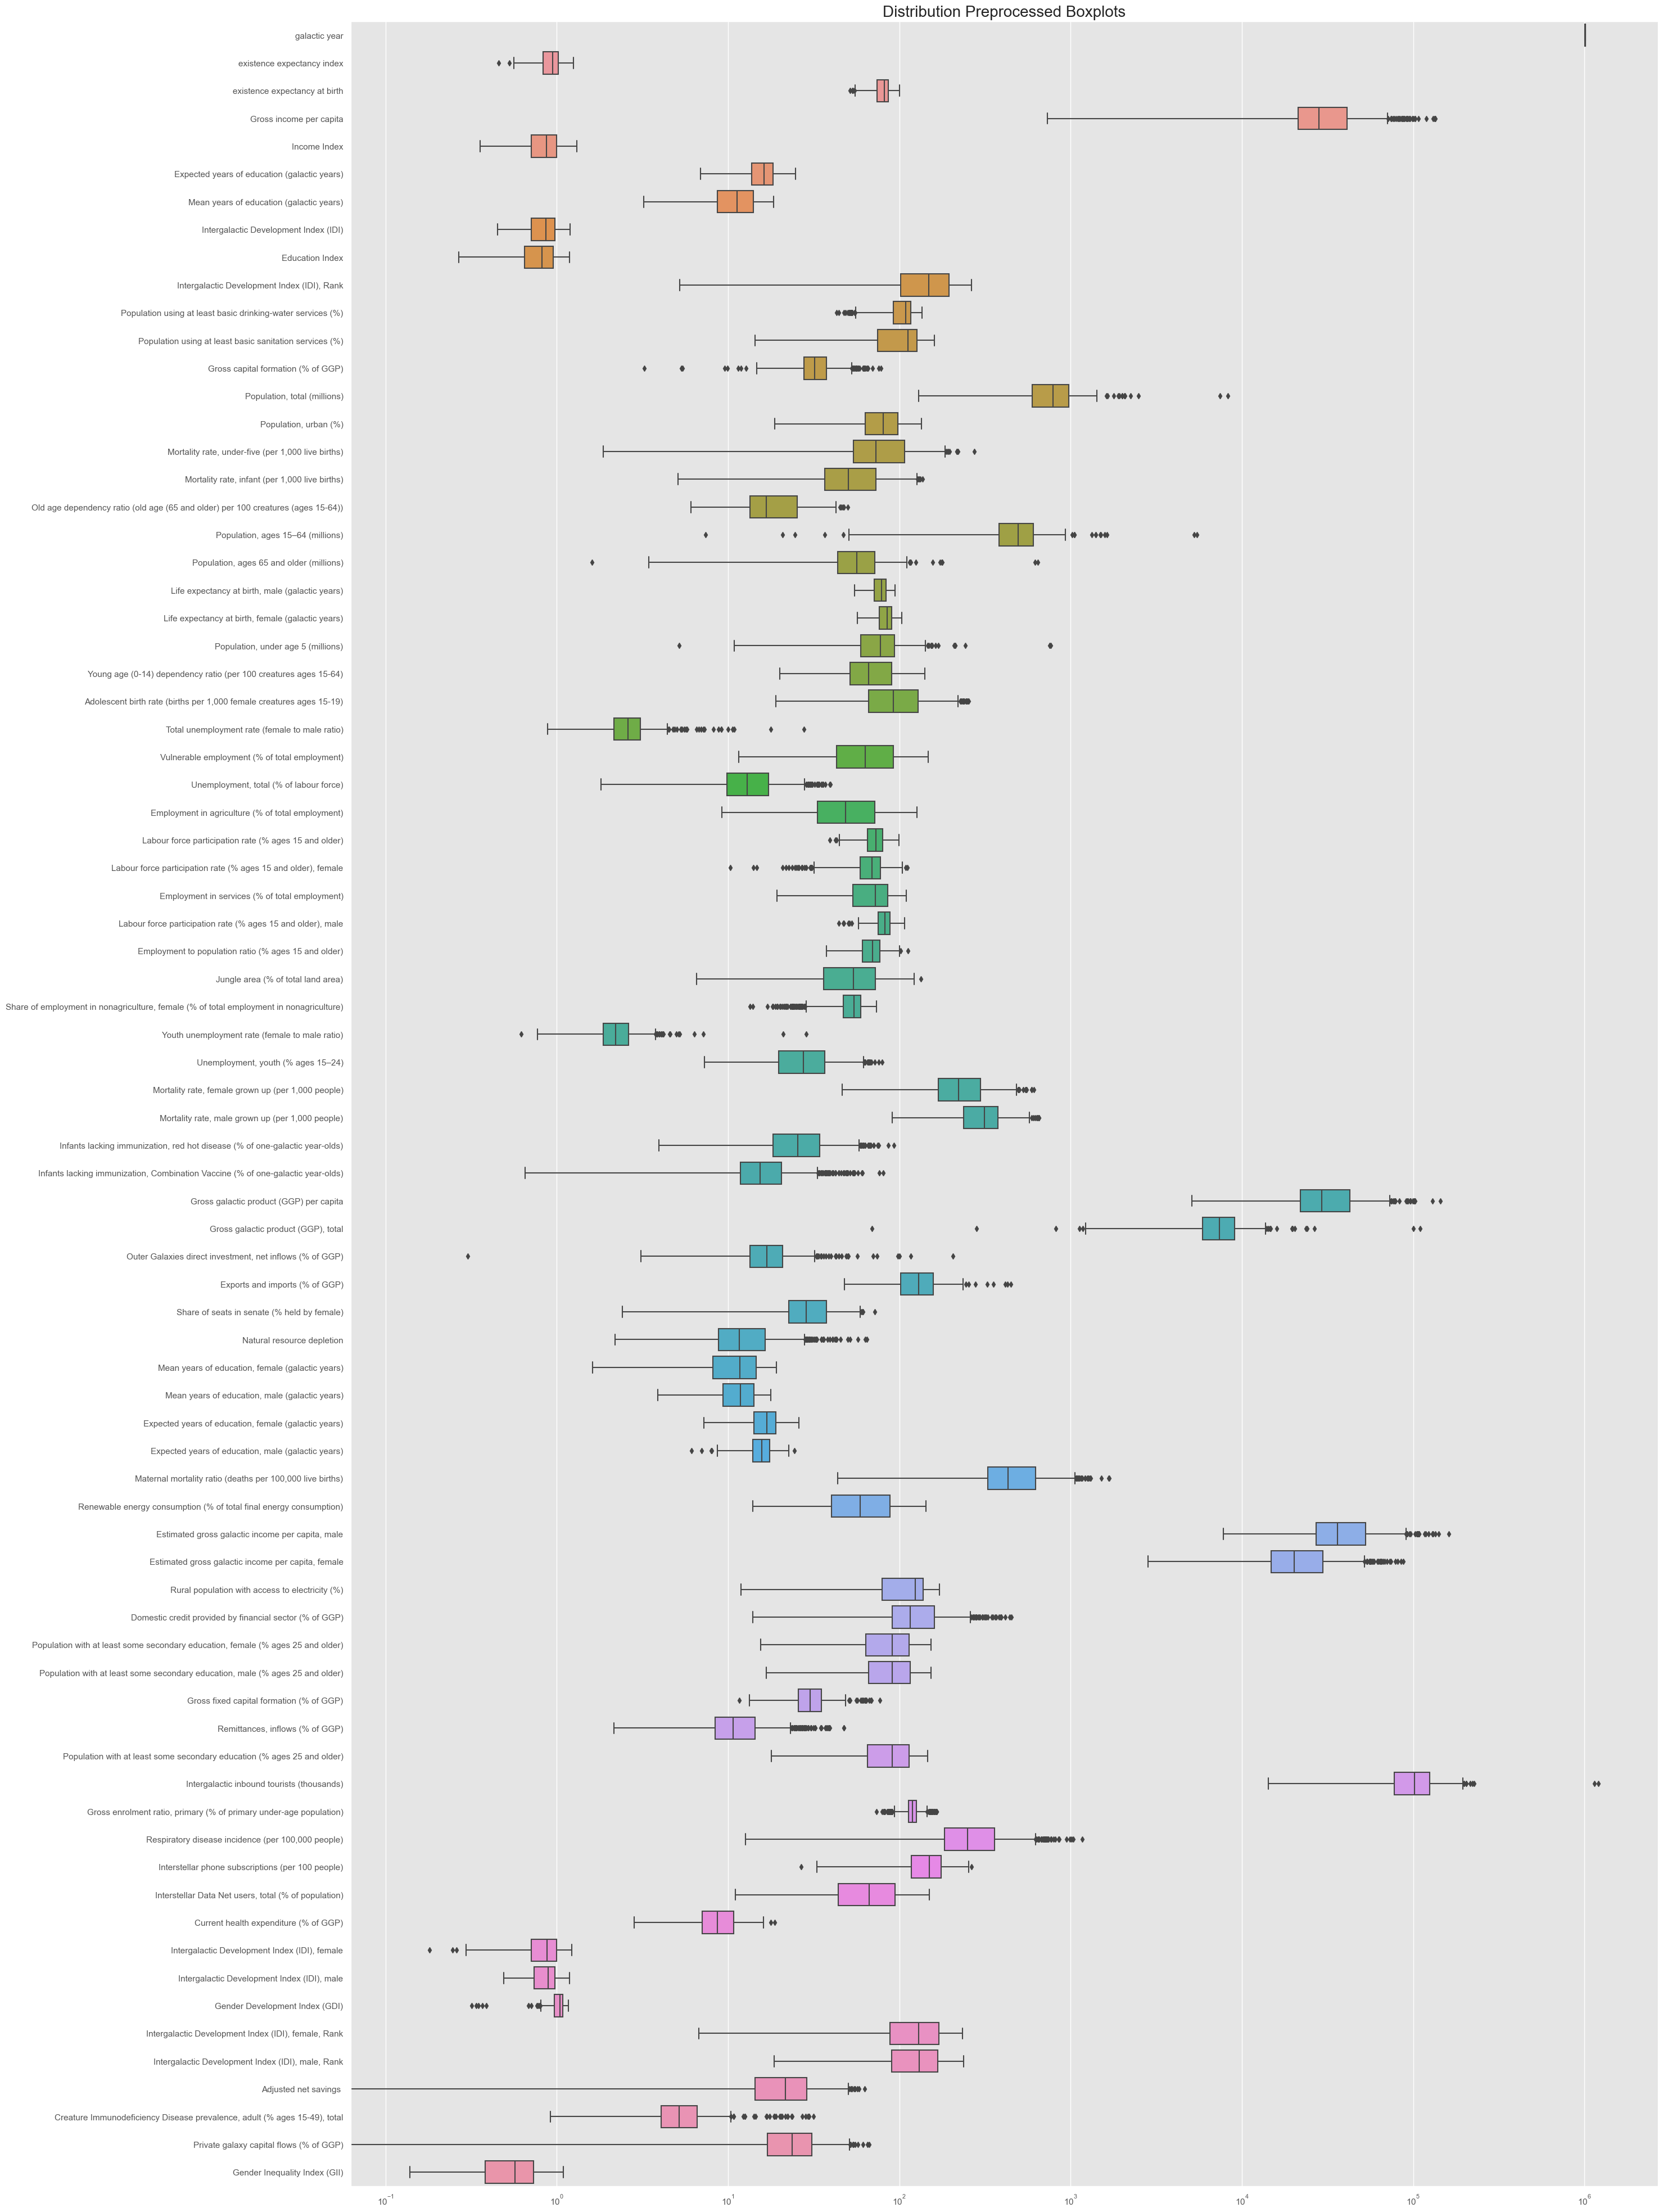

In [23]:
plt.figure(figsize = (30,50))
ax = sns.boxplot(data=df_test, orient="h")
ax.set_title('Distribution Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

<Figure size 1600x800 with 0 Axes>

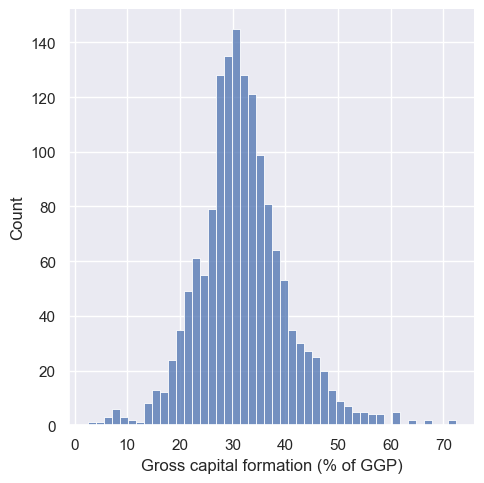

In [24]:
plt.figure(figsize = (16,8))
sns.set_theme(style="darkgrid")
sns.displot(
    df_train, x="Gross capital formation (% of GGP)"    
)

In [25]:
df_train = df_train[[f for f in df_train.columns if f in df_train.iloc[:,0:11].columns or f=='y']]
df_test = df_test.iloc[:,0:11]

In [26]:
display(df_train.head(), df_test.head())

galactic year                        galaxy  existence expectancy index  \
0         990025  Large Magellanic Cloud (LMC)                    0.628657   
1         990025              Camelopardalis B                    0.818082   
2         990025                       Virgo I                    0.659443   
3         990025            UGC 8651 (DDO 181)                    0.555862   
4         990025                  Tucana Dwarf                    0.991196   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      63.125200             27109.234310      0.646039   
1                      81.004994             30166.793958      0.852246   
2                      59.570534              8441.707353      0.499762   
3                      52.333293                      NaN           NaN   
4                      81.802464             81033.956906      1.131163   

   Expected years of education (galactic years)  \
0                                      8.240543   
1                                     10.671823   
2                                      8.840316   
3                                           NaN   
4                                     13.800672   

   Mean years of education (galactic years)  \
0                                       NaN   
1                                  4.742470   
2                                  5.583973   
3                                       NaN   
4                                 13.188907   

   Intergalactic Development Index (IDI)  Education Index  \
0                                    NaN              NaN   
1                               0.833624         0.467873   
2                               0.469110         0.363837   
3                                    NaN              NaN   
4                               0.910341         0.918353   

   Intergalactic Development Index (IDI), Rank         y  
0                                          NaN  0.052590  
1                                   152.522198  0.059868  
2                                   209.813266  0.050449  
3                                          NaN  0.049394  
4                                    71.885345  0.154247

galactic year         galaxy  existence expectancy index  \
0        1007012        KK98 77                    0.456086   
1        1007012  Reticulum III                    0.529835   
2        1008016  Reticulum III                    0.560976   
3        1007012        Segue 1                    0.565910   
4        1013042        Virgo I                    0.588274   

   existence expectancy at birth  Gross income per capita  Income Index  \
0                      51.562543             12236.576447      0.593325   
1                      57.228262              3431.883825      0.675407   
2                      59.379539             27562.914252      0.594624   
3                      59.952390             20352.232905      0.837700   
4                      55.428320             23959.704016      0.520579   

   Expected years of education (galactic years)  \
0                                     10.414164   
1                                      7.239485   
2                                     11.774890   
3                                     11.613621   
4                                     10.392416   

   Mean years of education (galactic years)  \
0                                 10.699072   
1                                  5.311122   
2                                  5.937797   
3                                 10.067882   
4                                  6.374637   

   Intergalactic Development Index (IDI)  Education Index  \
0                               0.547114         0.556267   
1                               0.497688         0.409969   
2                               0.544744         0.486167   
3                               0.691641         0.523441   
4                               0.530676         0.580418   

   Intergalactic Development Index (IDI), Rank  
0                                   232.621842  
1                                   247.580771  
2                                   249.798771  
3                                   211.505060  
4                                   234.721069

In [27]:
def data_clean(data, pct_threshold=0.5): 
    
    for col in data.columns:
        col_type = data[col].dtype
        
        if col_type != 'object':
            c_min = data[col].min()
            c_max = data[col].max()
            if 'int' in str(col_type): 
                if c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    data[col] = data[col].astype(np.uint8)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    data[col] = data[col].astype(np.uint16)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    data[col] = data[col].astype(np.uint32)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    data[col] = data[col].astype(np.uint64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    data[col] = data[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    data[col] = data[col].astype(np.float32)
                else:
                    data[col] = data[col].astype(np.float64)
        
        elif col_type=='object':
            if data[col].nunique() / data[col].shape[0] < pct_threshold:  
                data[col] = data[col].astype('category') 
            else:
                continue

In [28]:
data_clean(df_train)

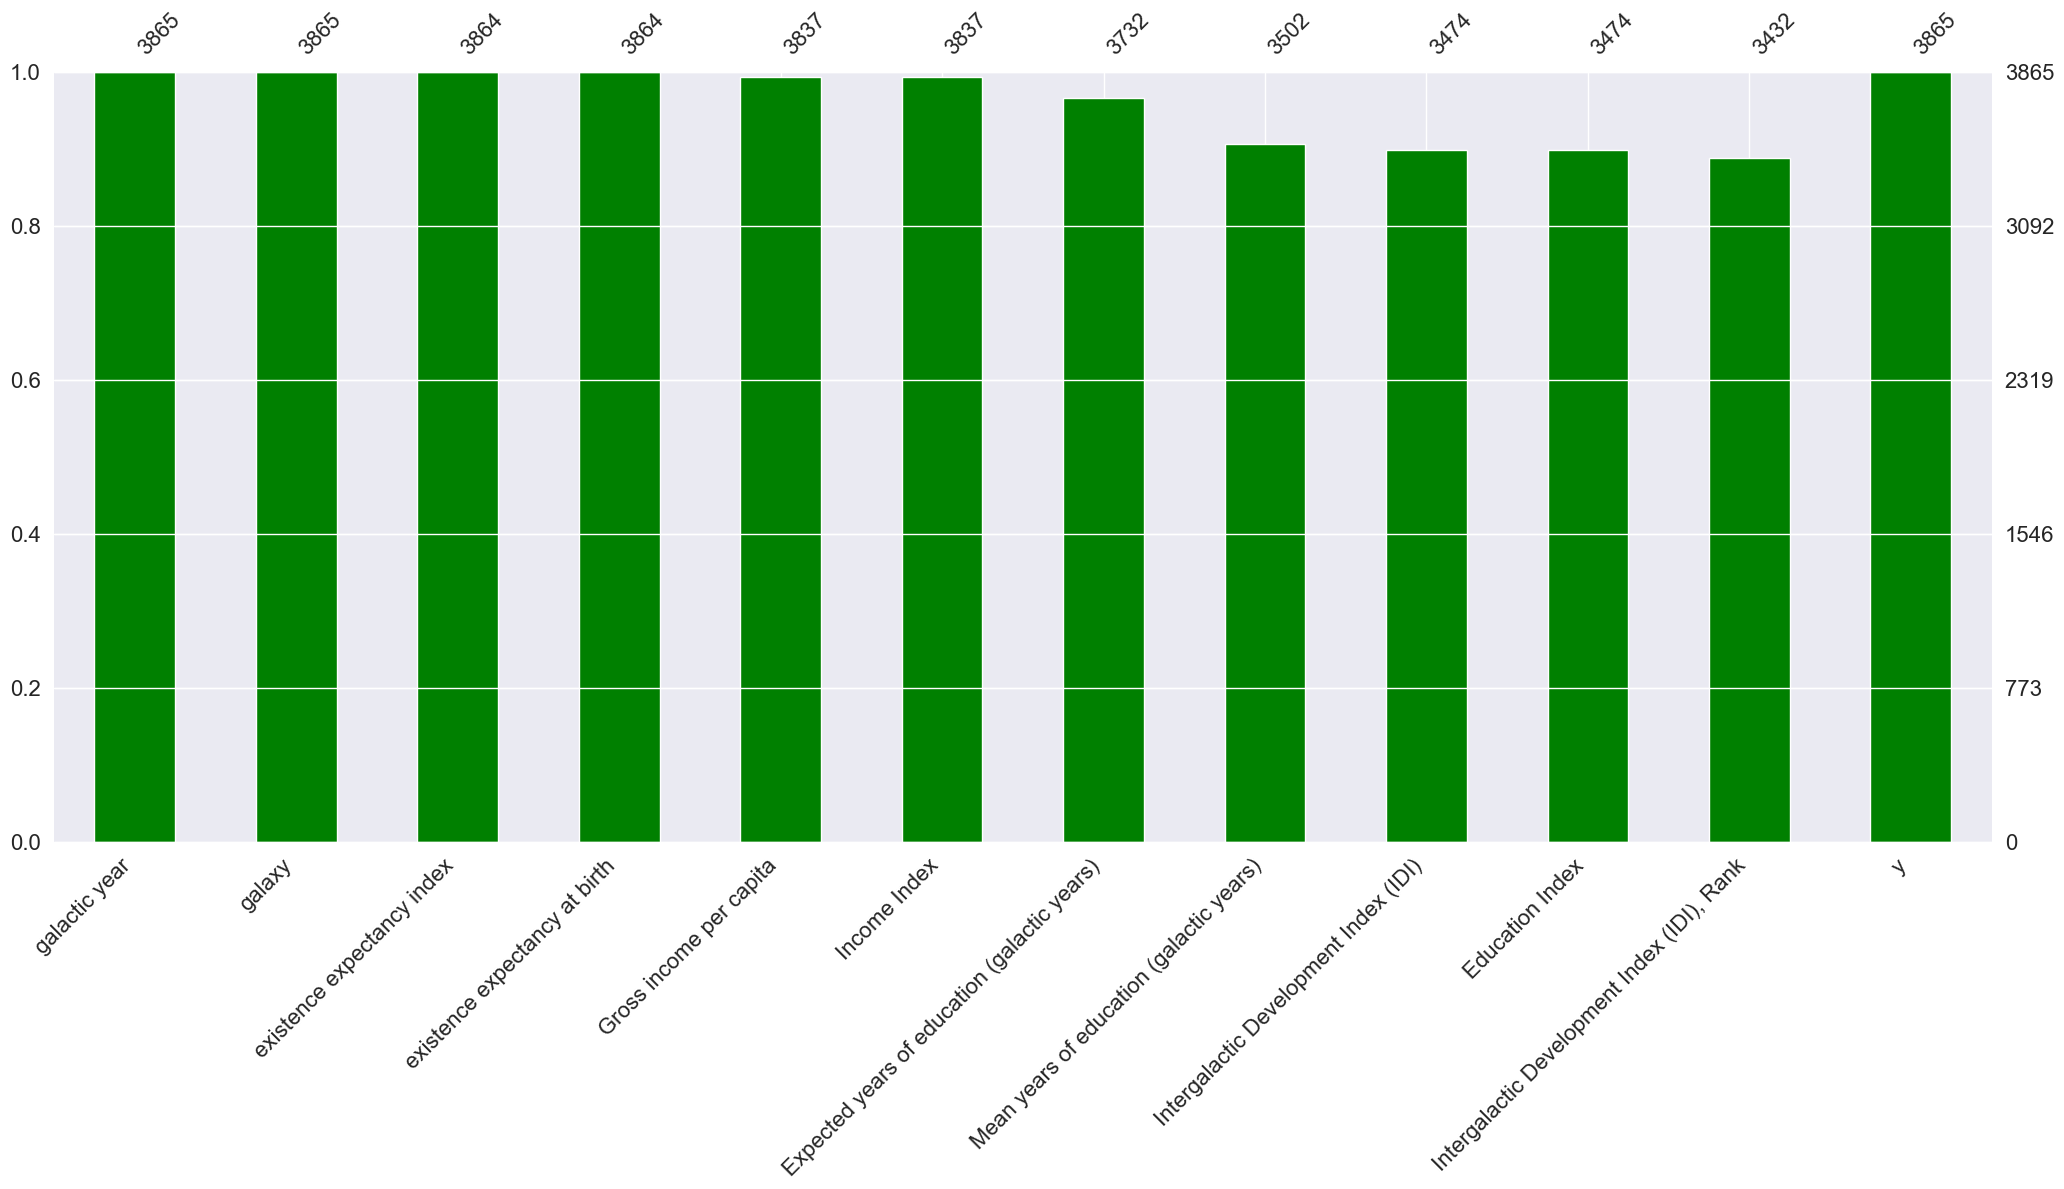

In [29]:
msn.bar(df_train, color='green')
plt.show()

In [30]:
data_clean(df_test)

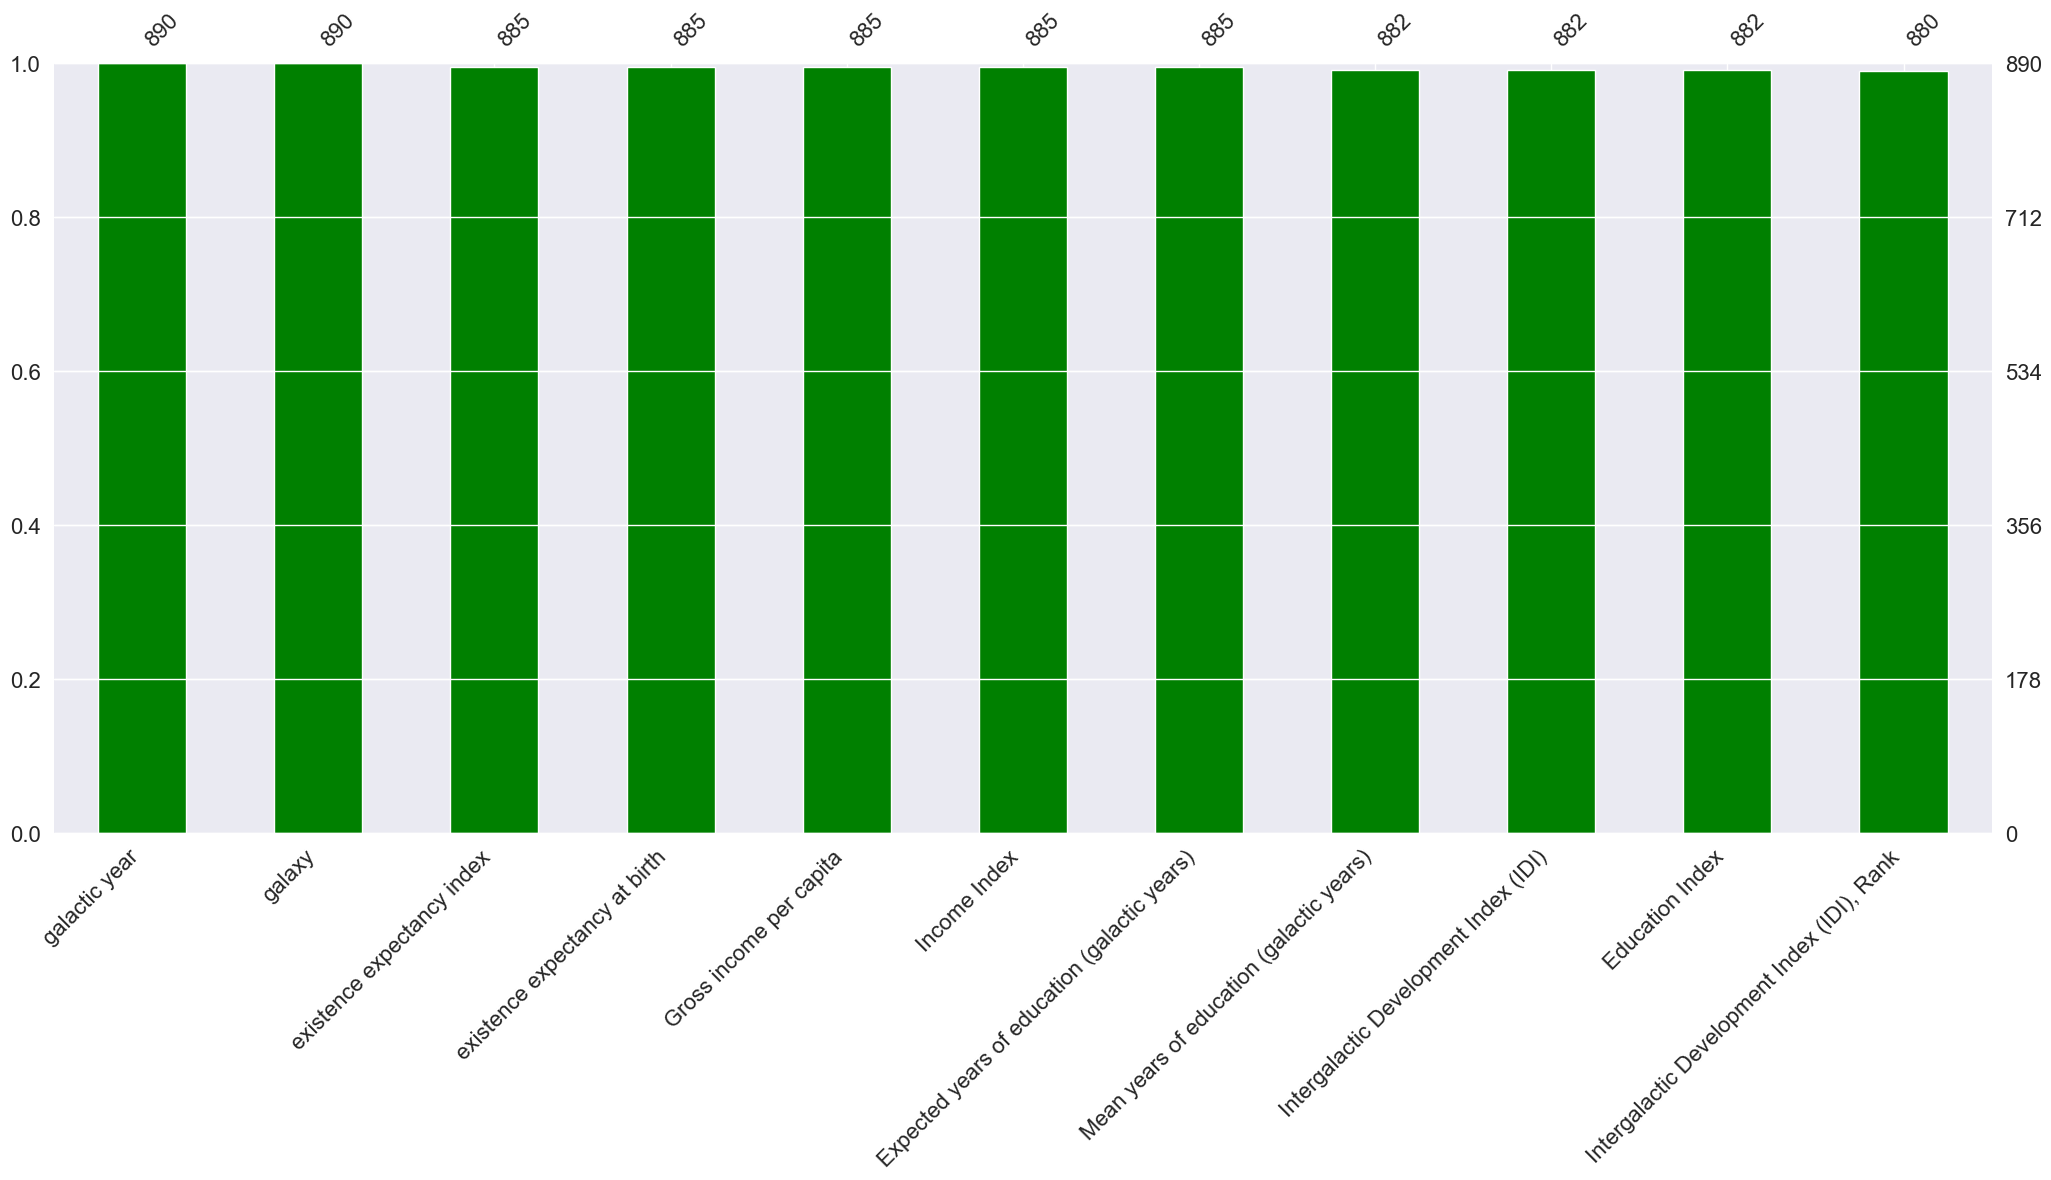

In [31]:
msn.bar(df_test, color='green')
plt.show()

In [32]:
def column_null_ratio(data):
    ratio = []
    for f in data.columns:
        n_missing = data[f].isna().sum()
        ratio.append(n_missing / data.shape[0])
    return ratio

In [33]:
display(column_null_ratio(df_train),
        column_null_ratio(df_test))

[0.0,
 0.0,
 0.000258732212160414,
 0.000258732212160414,
 0.007244501940491591,
 0.007244501940491591,
 0.034411384217335056,
 0.09391979301423027,
 0.10116429495472186,
 0.10116429495472186,
 0.11203104786545925,
 0.0]

[0.0,
 0.0,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.0056179775280898875,
 0.008988764044943821,
 0.008988764044943821,
 0.008988764044943821,
 0.011235955056179775]

In [35]:
def column_names(data):
    data.rename(columns=lambda x: x.lower().replace(' ', '_').replace('-', '_').replace(',', ''), inplace=True)
    return print(f'Column names cleaned: {df_train.columns}')
column_names_alter(df_train)
column_names_alter(df_test)

Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')
Column names cleaned: Index(['galactic_year', 'galaxy', 'existence_expectancy_index',
       'existence_expectancy_at_birth', 'gross_income_per_capita',
       'income_index', 'expected_years_of_education_(galactic_years)',
       'mean_years_of_education_(galactic_years)',
       'intergalactic_development_index_(idi)', 'education_index',
       'intergalactic_development_index_(idi)_rank', 'y'],
      dtype='object')


In [37]:
def v_stripper(data):
    for f in data.columns:
        if data[f].dtype == 'O':
            data[f] = data[f].str.strip()
            print(f'The unique values for {f} variable: {df_train[f].unique()}\n')
v_stripper(df_train)            
v_stripper(df_test) 

In [38]:
def duplicate_check_remove(data):
    num_duplicates = data.duplicated().sum()
    if num_duplicates > 0:
        print(f'The number of duplicate rows before: {num_duplicates}')
        data.drop_duplicates(inplace = True)
        print(f'The number of duplicate rows now: {data.duplicated().sum()}')
    else:
        print('There are no duplicate rows in the dataset.')
duplicate_check_remove(df_test)
duplicate_check_remove(df_train)

There are no duplicate rows in the dataset.
There are no duplicate rows in the dataset.


In [39]:
display(df_train['galactic_year'].value_counts().to_frame().T,  
        df_train['galaxy'].value_counts().to_frame().T)

990025   999000   1006009  1005006  1004004  991020   1002001  \
galactic_year      181      180      180      180      180      180      180   

               1001000  1000000  1003002  998001   997002   996004   995006   \
galactic_year      180      180      180      180      180      180      180   

               994009   993012   992016   1007012  1008016  1009020  1010025  \
galactic_year      180      180      180       90       90       90       90   

               1011030  1012036  1013042  1014049  1015056  
galactic_year       90       90       89       88       87

Andromeda XII  Andromeda XIX[60]  Andromeda XXII[57]  Tucana Dwarf  \
galaxy             26                 26                  26            26   

        Andromeda XXIV  Pegasus III  Pisces IV (Andromeda XIV)  Eridanus II  \
galaxy              26           25                         25           25   

        Cassiopeia III (Andromeda XXXII)  Cetus III  \
galaxy                                25         25   

        Phoenix Dwarf Galaxy (P 6830)  Pisces V (Andromeda XVI)  Boötes IV  \
galaxy                             25                        25         25   

        Andromeda XXVIII  Cetus Dwarf  Andromeda XXV  Pisces II  \
galaxy                25           25             25         25   

        Triangulum Galaxy (M33)  Canes Venatici II Dwarf  Pisces Dwarf  \
galaxy                       25                       25            25   

        IC 1613 (UGC 668)  Andromeda XX  M32 (NGC 221)  \
galaxy                 25            25             25   

        Pegasus Dwarf Sph (And VI)  Andromeda XV  Leo IV Dwarf  \
galaxy                          25            25            25   

        NGC 147 (DDO 3)  Andromeda XXIII  Andromeda VIII  Andromeda II  \
galaxy               25               25              25            25   

        IC 10 (UGC 192)  ESO 321-014[70]  NGC 404  KKH 12  NGC 5206  \
galaxy               25               24       24      24        24   

        Dwingeloo 2  UGC 8651 (DDO 181)  Tucana III  KK98 35  Indus II  \
galaxy           24                  24          24       24        24   

        ESO 540-030 (KDG 2)  NGC 2366  Draco II  Grus I  Grus II  NGC 1560  \
galaxy                   24        24        24      24       24        24   

        Horologium I  Horologium II  Maffei 2  FM2000 1  ...  Tucana II  MB 3  \
galaxy            24             24        24        24  ...         19    19   

        Maffei 1  Hydrus I  Segue 2  HIPASS J1247-77  UGC 8833  Triangulum II  \
galaxy        19        19       19               19        19             19   

        ESO 540-032  ESO 383-087 (ISG 39)  NGC 247  ESO 325-11  NGC 3741  \
galaxy           19                    19       19          19        19   

        ESO 274-01[70]  Large Magellanic Cloud (LMC)  NGC 4214 (UGC 7278)  \
galaxy              19                            19                   19   

        Segue 1  Andromeda Galaxy (M31)  Columba I  Andromeda XI  \
galaxy       19                      18         18            18   

        Andromeda XXIX  Andromeda XXVI  Andromeda V  \
galaxy              18              18           18   

        Barnard's Galaxy (NGC 6822)  Canes Venatici I Dwarf  \
galaxy                           18                      18   

        Cassiopeia Dwarf (Cas dSph, Andromeda VII)  \
galaxy                                          18   

        Cassiopeia II (Andromeda XXX)  Pisces III (Andromeda XIII)  \
galaxy                             18                           18   

        Fornax Dwarf (E356-G04)  Hydra II  Andromeda I  \
galaxy                       18        18           18   

        Lacerta I (Andromeda XXXI)  Leo A (Leo III, DDO 69)  \
galaxy                          18                       18   

        Leo I Dwarf (DDO 74, UGC 5470)  Leo II Dwarf (Leo B, DDO 93)  \
galaxy                              18                            18   

        Leo T Dwarf  Leo V Dwarf  M110 (NGC 205)  NGC 185  Andromeda IX  \
galaxy           18           18              18       18            18   

        Andromeda III  Perseus I (Andromeda XXXIII)  Andromeda XVII  \
galaxy             18                            18              18   

        Andromeda X  Sagittarius Dwarf Irregular Galaxy (SagDIG)  \
galaxy           17                                           17   

        Andromeda XXI[57]  Aquarius Dwarf Galaxy (DDO 210)  \
galaxy                 17                               17   

        Pegasus Dwarf Irregular (DDO 216)  \
galaxy                                 17  

In [40]:
separate_gal = [f for f in set(df_test['galaxy'].to_list()) 
            if f not in set(df_train['galaxy'].to_list())]
print(f'Test dataset contains {len(separate_gal)} values that train does not')

Test dataset contains 0 values that train does not


In [41]:
separate_year = [f for f in set(df_test['galactic_year'].to_list())  
            if f not in set(df_train['galactic_year'].to_list())]
print(f'Test dataset contains {len(separate_year)} values that train does not')

Test dataset contains 1 values that train does not


In [42]:
df_test[df_test['galaxy']=='NGC 5253']

Empty DataFrame
Columns: [galactic_year, galaxy, existence_expectancy_index, existence_expectancy_at_birth, gross_income_per_capita, income_index, expected_years_of_education_(galactic_years), mean_years_of_education_(galactic_years), intergalactic_development_index_(idi), education_index, intergalactic_development_index_(idi)_rank]
Index: []

In [43]:
df_train = df_train[df_train['galaxy']!='NGC 5253']

In [44]:
df_train['galactic_year'] = df_train['galactic_year'].astype('O') 
df_test['galactic_year'] = df_test['galactic_year'].astype('O')

In [45]:
class KFoldTargetEncoderTrain(base.BaseEstimator, base.TransformerMixin):
   
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
        
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):        
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)       
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = True)        
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan       
        
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = X_val[self.colnames].map(X_tr.groupby(self.colnames)[self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)  #Fill in the place that has become nan with the global mean
            
        if self.verbosity:            
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'.format(col_mean_name,self.targetName, 
                                                                                  np.corrcoef(X[self.targetName].values,encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [46]:
for f in df_train.columns[0:2]:
    targetc = KFoldTargetEncoderTrain(f, 'y', n_fold=5)
    df_t = targetc.fit_transform(df_train) 

Correlation between the new feature, galactic_year_Kfold_Target_Enc and, y is -0.09070331811522893.
Correlation between the new feature, galaxy_Kfold_Target_Enc and, y is 0.9597946743135857.


In [47]:
df_train = pd.concat([df_train.iloc[:,2:].drop('y', axis=1), df_train['y']], axis=1) 
df_train.head()

existence_expectancy_index  existence_expectancy_at_birth  \
0                    0.628418                       63.12500   
1                    0.817871                       81.00000   
2                    0.659668                       59.56250   
3                    0.555664                       52.34375   
4                    0.991211                       81.81250   

   gross_income_per_capita  income_index  \
0             27109.234375      0.645996   
1             30166.794922      0.852051   
2              8441.707031      0.499756   
3                      NaN           NaN   
4             81033.953125      1.130859   

   expected_years_of_education_(galactic_years)  \
0                                      8.242188   
1                                     10.671875   
2                                      8.843750   
3                                           NaN   
4                                     13.796875   

   mean_years_of_education_(galactic_years)  \
0                                       NaN   
1                                  4.742188   
2                                  5.582031   
3                                       NaN   
4                                 13.187500   

   intergalactic_development_index_(idi)  education_index  \
0                                    NaN              NaN   
1                               0.833496         0.467773   
2                               0.468994         0.363770   
3                                    NaN              NaN   
4                               0.910156         0.918457   

   intergalactic_development_index_(idi)_rank  galactic_year_Kfold_Target_Enc  \
0                                         NaN                        0.083313   
1                                     152.500                        0.083435   
2                                     209.875                        0.083313   
3                                         NaN                        0.080750   
4                                      71.875                        0.081848   

   galaxy_Kfold_Target_Enc         y  
0                 0.049164  0.052582  
1                 0.058563  0.059875  
2                 0.042450  0.050446  
3                 0.040253  0.049408  
4                 0.222656  0.154297

In [48]:
class KFoldTargetEncoderTest(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,train,colNames,encodedName):
        
        self.train = train
        self.colNames = colNames
        self.encodedName = encodedName
        
        
    def fit(self, X, y=None):
        return self

    def transform(self,X):


        mean = self.train[[self.colNames,self.encodedName]].groupby(self.colNames).mean().reset_index() 
        
        dd = {}
        for index, row in mean.iterrows():
            dd[row[self.colNames]] = row[self.encodedName]

        
        X[self.encodedName] = X[self.colNames]
        X = X.replace({self.encodedName: dd})

        return X
test_targetc = KFoldTargetEncoderTest(df_t, 'galactic_year', 'galactic_year_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test)
test_targetc = KFoldTargetEncoderTest(df_t, 'galaxy', 'galaxy_Kfold_Target_Enc')
df_test = test_targetc.fit_transform(df_test) 
df_test = df_test.iloc[:,2:]

In [49]:
df_test

existence_expectancy_index  existence_expectancy_at_birth  \
0                      0.456055                       51.56250   
1                      0.529785                       57.21875   
2                      0.561035                       59.37500   
3                      0.565918                       59.93750   
4                      0.588379                       55.43750   
..                          ...                            ...   
885                         NaN                            NaN   
886                         NaN                            NaN   
887                         NaN                            NaN   
888                         NaN                            NaN   
889                         NaN                            NaN   

     gross_income_per_capita  income_index  \
0               12236.576172      0.593262   
1                3431.883789      0.675293   
2               27562.914062      0.594727   
3               20352.232422      0.837891   
4               23959.703125      0.520508   
..                       ...           ...   
885                      NaN           NaN   
886                      NaN           NaN   
887                      NaN           NaN   
888                      NaN           NaN   
889                      NaN           NaN   

     expected_years_of_education_(galactic_years)  \
0                                       10.414062   
1                                        7.238281   
2                                       11.773438   
3                                       11.617188   
4                                       10.390625   
..                                            ...   
885                                           NaN   
886                                           NaN   
887                                           NaN   
888                                           NaN   
889                                           NaN   

     mean_years_of_education_(galactic_years)  \
0                                   10.695312   
1                                    5.312500   
2                                    5.937500   
3                                   10.070312   
4                                    6.375000   
..                                        ...   
885                                       NaN   
886                                       NaN   
887                                       NaN   
888                                       NaN   
889                                       NaN   

     intergalactic_development_index_(idi)  education_index  \
0                                 0.546875         0.556152   
1                                 0.497803         0.409912   
2                                 0.544922         0.486084   
3                                 0.691406         0.523438   
4                                 0.530762         0.580566   
..                                     ...              ...   
885                                    NaN              NaN   
886                                    NaN              NaN   
887                                    NaN              NaN   
888                                    NaN              NaN   
889                                    NaN              NaN   

     intergalactic_development_index_(idi)_rank  \
0                                       232.625   
1                                       247.625   
2                                       249.750   
3                                       211.500   
4                                       234.750   
..                                          ...   
885                                         NaN   
886                                         NaN   
887                                         NaN   
888                                         NaN   
889                                         NaN   

     galactic_year_Kfold_Target_Enc galaxy_Kfold_Target_Enc  
0

In [50]:
imputer = IterativeImputer(random_state=123, n_nearest_features=15, max_iter=3693, verbose = 1)
df_imputed = imputer.fit_transform(df_train)
df_imputed = pd.DataFrame(df_imputed, columns=df_train.columns)
df_imputed

[IterativeImputer] Completing matrix with shape (3864, 12)
[IterativeImputer] Change: 3476.8883469490193, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 6182.987311019685, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 5552.610463155111, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 2933.5373702797083, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 1812.3453619848535, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 1205.4144641786097, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 841.0838995141854, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 604.4294441480365, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 442.237149396597, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 327.0192723906232, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 243.3004360821503, scaled tolerance: 151.0726875 
[IterativeImputer] Change: 181.63885577597932, scaled tolerance: 151.0726875 
[IterativeImp

existence_expectancy_index  existence_expectancy_at_birth  \
0                       0.628418                       63.12500   
1                       0.817871                       81.00000   
2                       0.659668                       59.56250   
3                       0.555664                       52.34375   
4                       0.991211                       81.81250   
...                          ...                            ...   
3859                    1.029297                       82.81250   
3860                    0.937988                       75.87500   
3861                    1.036133                       93.56250   
3862                    0.938965                       78.25000   
3863                    1.032227                       91.62500   

      gross_income_per_capita  income_index  \
0                27109.234375      0.645996   
1                30166.794922      0.852051   
2                 8441.707031      0.499756   
3                14457.185547      0.541780   
4                81033.953125      1.130859   
...                       ...           ...   
3859             34310.472656      0.854980   
3860             36899.066406      0.929688   
3861             37002.976562      1.084961   
3862             28180.458984      0.687500   
3863             73109.218750      1.208008   

      expected_years_of_education_(galactic_years)  \
0                                         8.242188   
1                                        10.671875   
2                                         8.843750   
3                                         9.503830   
4                                        13.796875   
...                                            ...   
3859                                     18.578125   
3860                                     16.156250   
3861                                     21.062500   
3862                                      9.390625   
3863                                     18.906250   

      mean_years_of_education_(galactic_years)  \
0                                     5.871447   
1                                     4.742188   
2                                     5.582031   
3                                     5.815766   
4                                    13.187500   
...                                        ...   
3859                                 10.554688   
3860                                  9.148438   
3861                                 16.656250   
3862                                  8.906250   
3863                                 16.203125   

      intergalactic_development_index_(idi)  education_index  \
0                                  0.547358         0.441625   
1                                  0.833496         0.467773   
2                                  0.468994         0.363770   
3                                  0.489064         0.452697   
4                                  0.910156         0.918457   
...                                     ...              ...   
3859                               0.906738         0.862793   
3860                               0.865723         0.747559   
3861                               0.983887         1.100586   
3862                               0.735840         0.602539   
3863                               1.171875         1.084961   

      intergalactic_development_index_(idi)_rank  \
0                                     192.002545   
1                                     152.500000   
2                                     209.875000   
3                                     210.157580   
4                                      71.875000   
...                                          ...   
3859                                  144.875000   
3860                                  164.750000   
3861                                   63.718750   
3862                                  216.750000   
3863                                   63.937

In [51]:
df_train=df_imputed
df_train.isnull()

existence_expectancy_index  existence_expectancy_at_birth  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   
...                          ...                            ...   
3859                       False                          False   
3860                       False                          False   
3861                       False                          False   
3862                       False                          False   
3863                       False                          False   

      gross_income_per_capita  income_index  \
0                       False         False   
1                       False         False   
2                       False         False   
3                       False         False   
4                       False         False   
...                       ...           ...   
3859                    False         False   
3860                    False         False   
3861                    False         False   
3862                    False         False   
3863                    False         False   

      expected_years_of_education_(galactic_years)  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
...                                            ...   
3859                                         False   
3860                                         False   
3861                                         False   
3862                                         False   
3863                                         False   

      mean_years_of_education_(galactic_years)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   
...                                        ...   
3859                                     False   
3860                                     False   
3861                                     False   
3862                                     False   
3863                                     False   

      intergalactic_development_index_(idi)  education_index  \
0                                     False            False   
1                                     False            False   
2                                     False            False   
3                                     False            False   
4                                     False            False   
...                                     ...              ...   
3859                                  False            False   
3860                                  False            False   
3861                                  False            False   
3862                                  False            False   
3863                                  False            False   

      intergalactic_development_index_(idi)_rank  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
3859                                       False   
3860                                       False   
3861                                       False   
3862                                       False   
3863                                       Fa

In [52]:
df_train.isnull().sum()

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

In [53]:
df_imputed = imputer.fit_transform(df_test)
df_imputed = pd.DataFrame(df_imputed, columns=df_test.columns)

[IterativeImputer] Completing matrix with shape (890, 11)
[IterativeImputer] Change: 3524.3274435072353, scaled tolerance: 1016.064 
[IterativeImputer] Change: 685.962163555591, scaled tolerance: 1016.064 
[IterativeImputer] Early stopping criterion reached.


In [54]:
df_test=df_imputed

In [55]:
df_test.isnull().sum()

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
dtype: int64

In [56]:
display(df_train.isnull().sum(), df_test.isnull().sum())

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
y                                               0
dtype: int64

existence_expectancy_index                      0
existence_expectancy_at_birth                   0
gross_income_per_capita                         0
income_index                                    0
expected_years_of_education_(galactic_years)    0
mean_years_of_education_(galactic_years)        0
intergalactic_development_index_(idi)           0
education_index                                 0
intergalactic_development_index_(idi)_rank      0
galactic_year_Kfold_Target_Enc                  0
galaxy_Kfold_Target_Enc                         0
dtype: int64

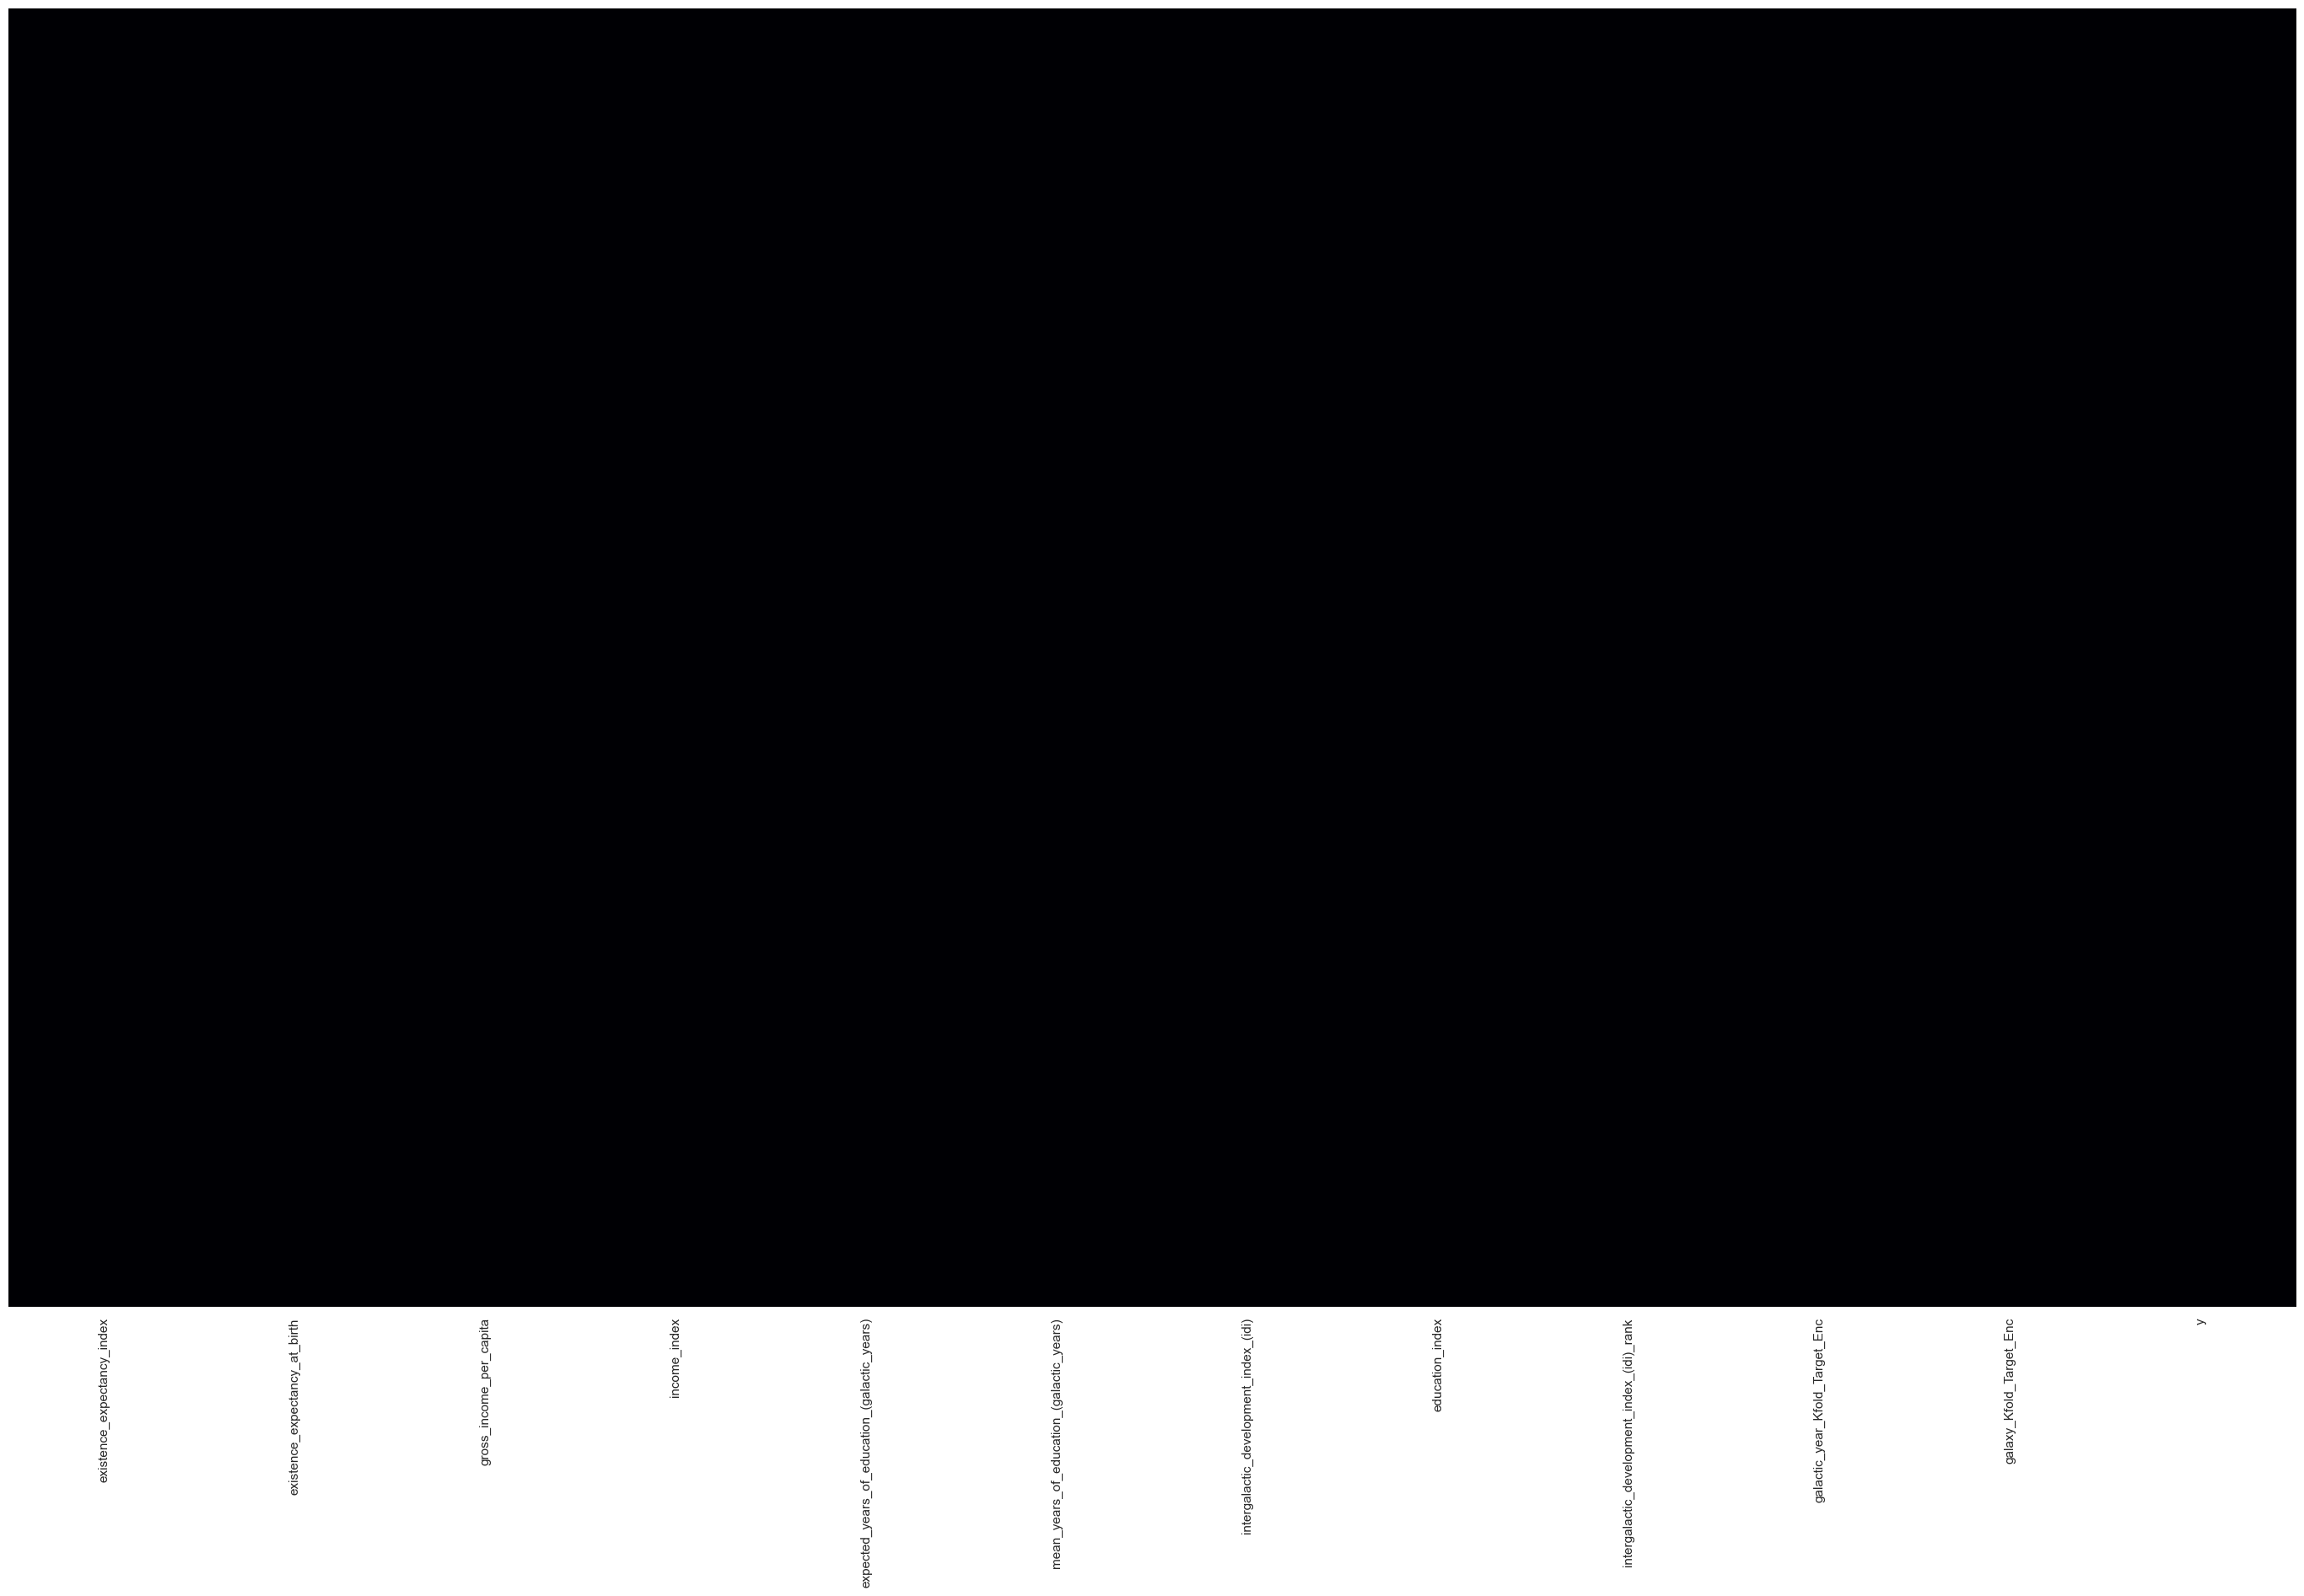

In [58]:
plt.figure(figsize = (35,20))
sns.heatmap(data = df_train.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

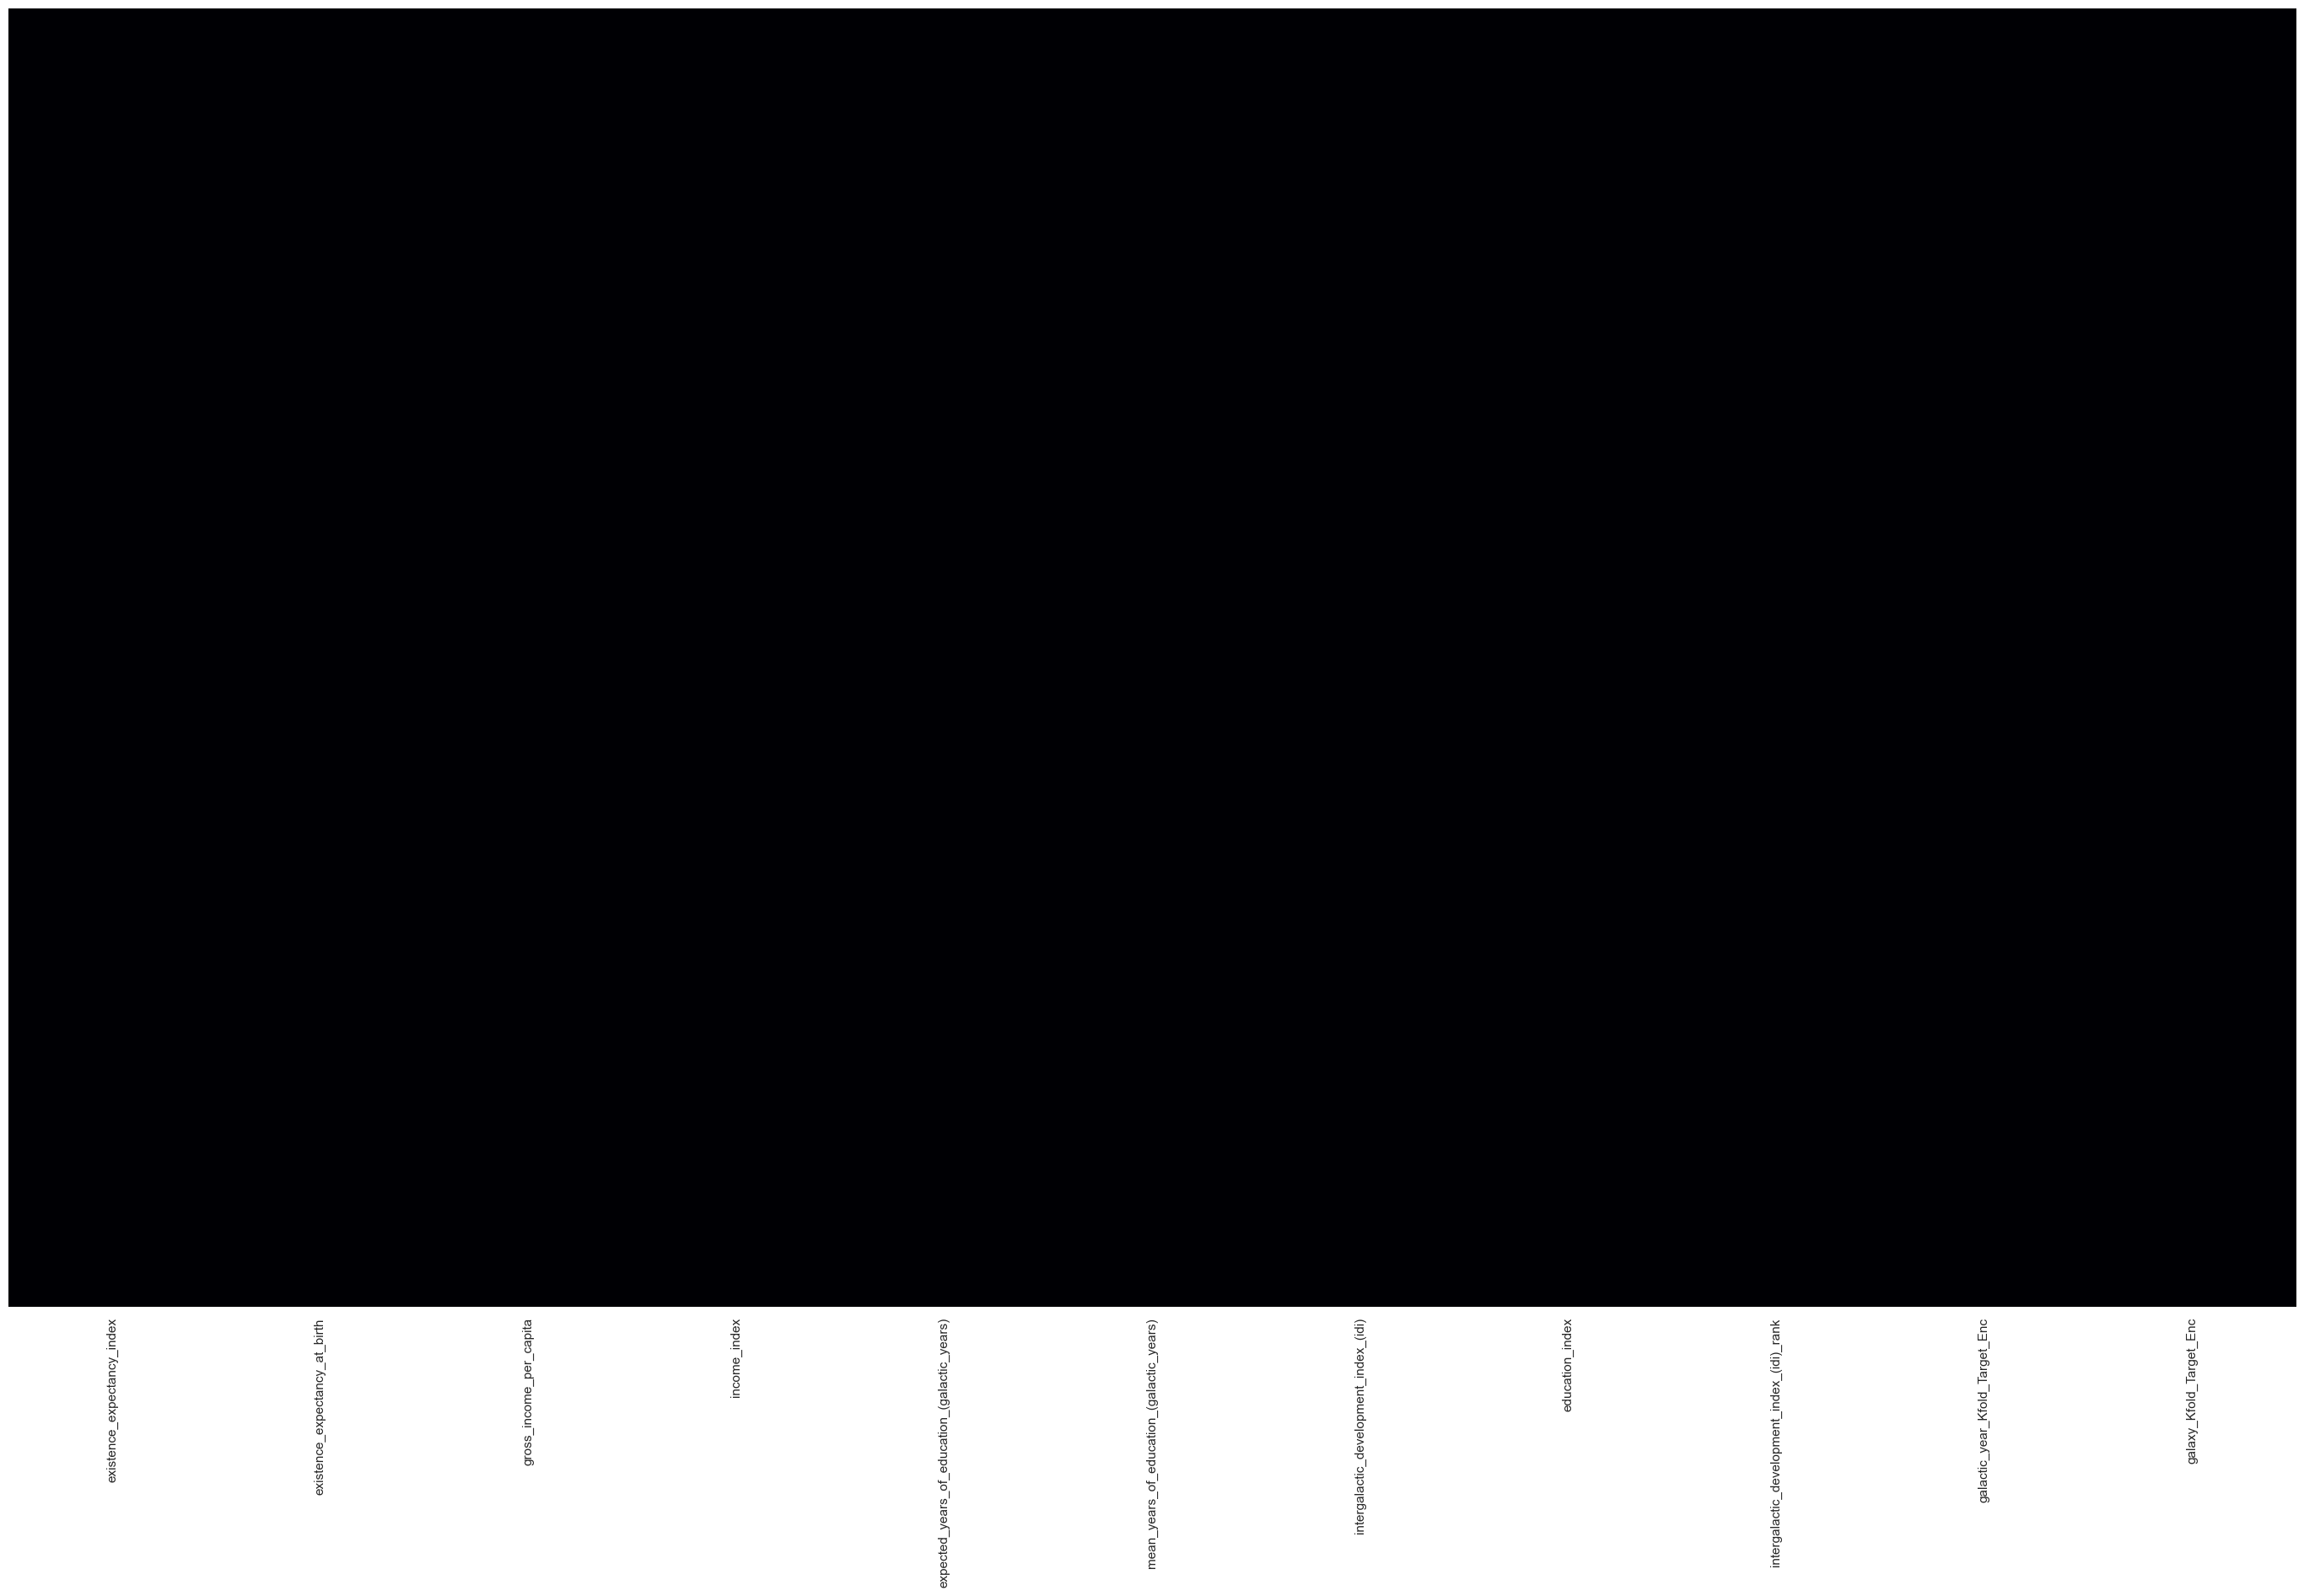

In [59]:
plt.figure(figsize = (35,20))
sns.heatmap(data = df_test.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

In [60]:
df_train.head(10).T

0             1  \
existence_expectancy_index                        0.628418      0.817871   
existence_expectancy_at_birth                    63.125000     81.000000   
gross_income_per_capita                       27109.234375  30166.794922   
income_index                                      0.645996      0.852051   
expected_years_of_education_(galactic_years)      8.242188     10.671875   
mean_years_of_education_(galactic_years)          5.871447      4.742188   
intergalactic_development_index_(idi)             0.547358      0.833496   
education_index                                   0.441625      0.467773   
intergalactic_development_index_(idi)_rank      192.002545    152.500000   
galactic_year_Kfold_Target_Enc                    0.083313      0.083435   
galaxy_Kfold_Target_Enc                           0.049164      0.058563   
y                                                 0.052582      0.059875   

                                                        2             3  \
existence_expectancy_index                       0.659668      0.555664   
existence_expectancy_at_birth                   59.562500     52.343750   
gross_income_per_capita                       8441.707031  14457.185547   
income_index                                     0.499756      0.541780   
expected_years_of_education_(galactic_years)     8.843750      9.503830   
mean_years_of_education_(galactic_years)         5.582031      5.815766   
intergalactic_development_index_(idi)            0.468994      0.489064   
education_index                                  0.363770      0.452697   
intergalactic_development_index_(idi)_rank     209.875000    210.157580   
galactic_year_Kfold_Target_Enc                   0.083313      0.080750   
galaxy_Kfold_Target_Enc                          0.042450      0.040253   
y                                                0.050446      0.049408   

                                                         4             5  \
existence_expectancy_index                        0.991211      0.824707   
existence_expectancy_at_birth                    81.812500     63.875000   
gross_income_per_capita                       81033.953125  28409.062500   
income_index                                      1.130859      0.671875   
expected_years_of_education_(galactic_years)     13.796875     14.062500   
mean_years_of_education_(galactic_years)         13.187500      9.976562   
intergalactic_development_index_(idi)             0.910156      0.815430   
education_index                                   0.918457      0.796875   
intergalactic_development_index_(idi)_rank       71.875000    121.812500   
galactic_year_Kfold_Target_Enc                    0.081848      0.081848   
galaxy_Kfold_Target_Enc                           0.222656      0.042755   
y                                                 0.154297      0.052856   

                                                         6             7  \
existence_expectancy_index                        0.657227      0.951172   
existence_expectancy_at_birth                    68.562500     75.687500   
gross_income_per_capita                       25648.328125  20935.541016   
income_index                                      0.745605      0.947754   
expected_years_of_education_(galactic_years)     15.437500     14.859375   
mean_years_of_education_(galactic_years)         10.023438     10.368866   
intergalactic_development_index_(idi)             0.662109      0.829227   
education_index                                   0.743652      0.752591   
intergalactic_development_index_(idi)_rank      149.625000    131.026739   
galactic_year_Kfold_Target_Enc                    0.081299      0.081848   
galaxy_Kfold_Target_Enc                           0.048920      0.056671   
y                                                 0.052795      0.062622   

                                                         8             9  
existence_expectancy_index             

In [61]:
df_test.head(10).T

0            1  \
existence_expectancy_index                        0.456055     0.529785   
existence_expectancy_at_birth                    51.562500    57.218750   
gross_income_per_capita                       12236.576172  3431.883789   
income_index                                      0.593262     0.675293   
expected_years_of_education_(galactic_years)     10.414062     7.238281   
mean_years_of_education_(galactic_years)         10.695312     5.312500   
intergalactic_development_index_(idi)             0.546875     0.497803   
education_index                                   0.556152     0.409912   
intergalactic_development_index_(idi)_rank      232.625000   247.625000   
galactic_year_Kfold_Target_Enc                    0.082297     0.082297   
galaxy_Kfold_Target_Enc                           0.045853     0.042896   

                                                         2             3  \
existence_expectancy_index                        0.561035      0.565918   
existence_expectancy_at_birth                    59.375000     59.937500   
gross_income_per_capita                       27562.914062  20352.232422   
income_index                                      0.594727      0.837891   
expected_years_of_education_(galactic_years)     11.773438     11.617188   
mean_years_of_education_(galactic_years)          5.937500     10.070312   
intergalactic_development_index_(idi)             0.544922      0.691406   
education_index                                   0.486084      0.523438   
intergalactic_development_index_(idi)_rank      249.750000    211.500000   
galactic_year_Kfold_Target_Enc                    0.081871      0.082297   
galaxy_Kfold_Target_Enc                           0.042896      0.042826   

                                                         4             5  \
existence_expectancy_index                        0.588379      0.589844   
existence_expectancy_at_birth                    55.437500     66.562500   
gross_income_per_capita                       23959.703125  14004.868164   
income_index                                      0.520508      0.725098   
expected_years_of_education_(galactic_years)     10.390625     11.921875   
mean_years_of_education_(galactic_years)          6.375000      4.148438   
intergalactic_development_index_(idi)             0.530762      0.563965   
education_index                                   0.580566      0.491943   
intergalactic_development_index_(idi)_rank      234.750000    223.125000   
galactic_year_Kfold_Target_Enc                    0.098178      0.093873   
galaxy_Kfold_Target_Enc                           0.042302      0.044773   

                                                         6             7  \
existence_expectancy_index                        0.589844      0.594238   
existence_expectancy_at_birth                    65.937500     59.781250   
gross_income_per_capita                       13188.133789  10395.817383   
income_index                                      0.618652      0.562988   
expected_years_of_education_(galactic_years)     11.226562     11.757812   
mean_years_of_education_(galactic_years)          5.265625      9.914062   
intergalactic_development_index_(idi)             0.658691      0.662598   
education_index                                   0.406738      0.675781   
intergalactic_development_index_(idi)_rank      229.625000    233.750000   
galactic_year_Kfold_Target_Enc                    0.080061      0.080754   
galaxy_Kfold_Target_Enc                           0.042896      0.045853   

                                                         8             9  
existence_expectancy_index                        0.598633      0.598633  
existence_expectancy_at_birth                    61.187500     63.968750  
gross_income_per_capita                       24639.662109  29450.027344  
income_index                                      0.791016      0.625000  
expected_years_of_education_(galactic_year

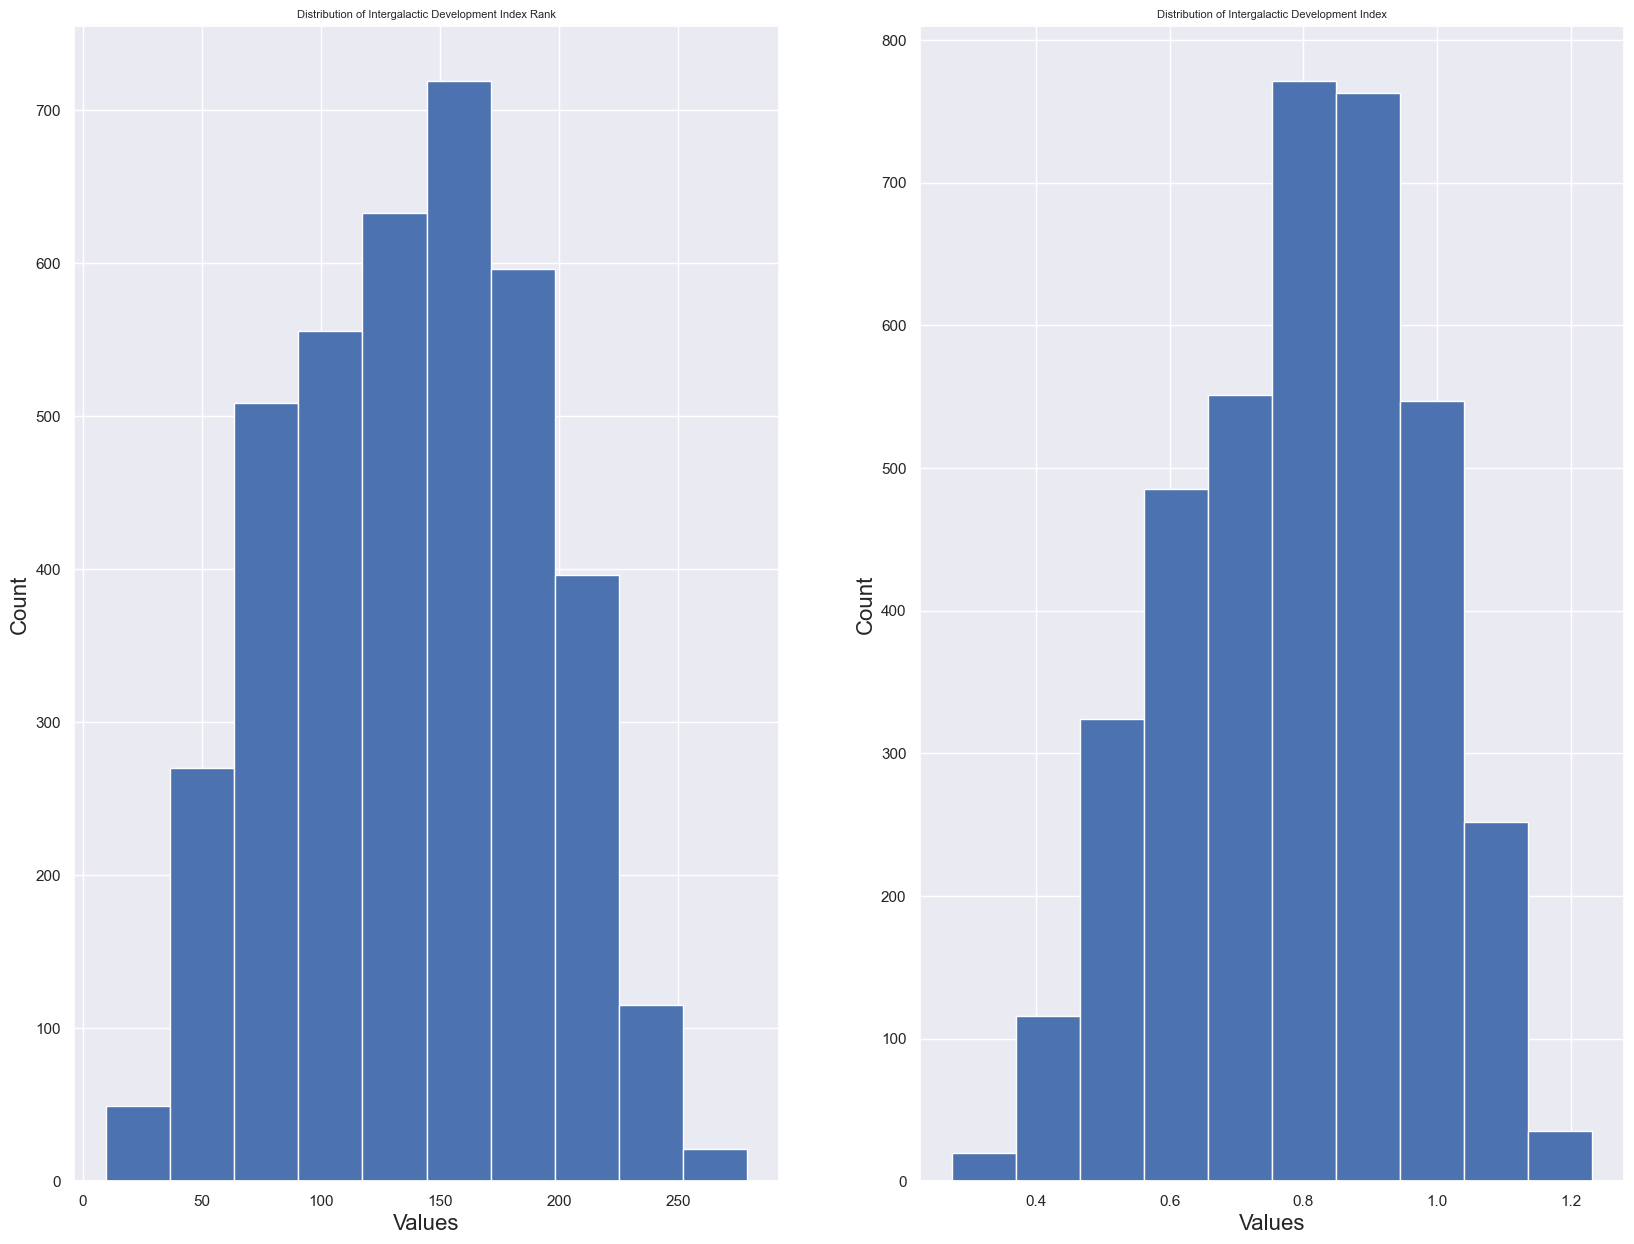

In [62]:
plt.subplot(1, 2, 2)
plt.hist(df_train['intergalactic_development_index_(idi)'])
plt.title(label = 'Distribution of Intergalactic Development Index', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)

plt.subplot(1, 2, 1)
plt.hist(df_train['intergalactic_development_index_(idi)_rank'])
plt.title(label = 'Distribution of Intergalactic Development Index Rank', fontsize = 8)
plt.xlabel(xlabel = 'Values', fontsize = 16)
plt.ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

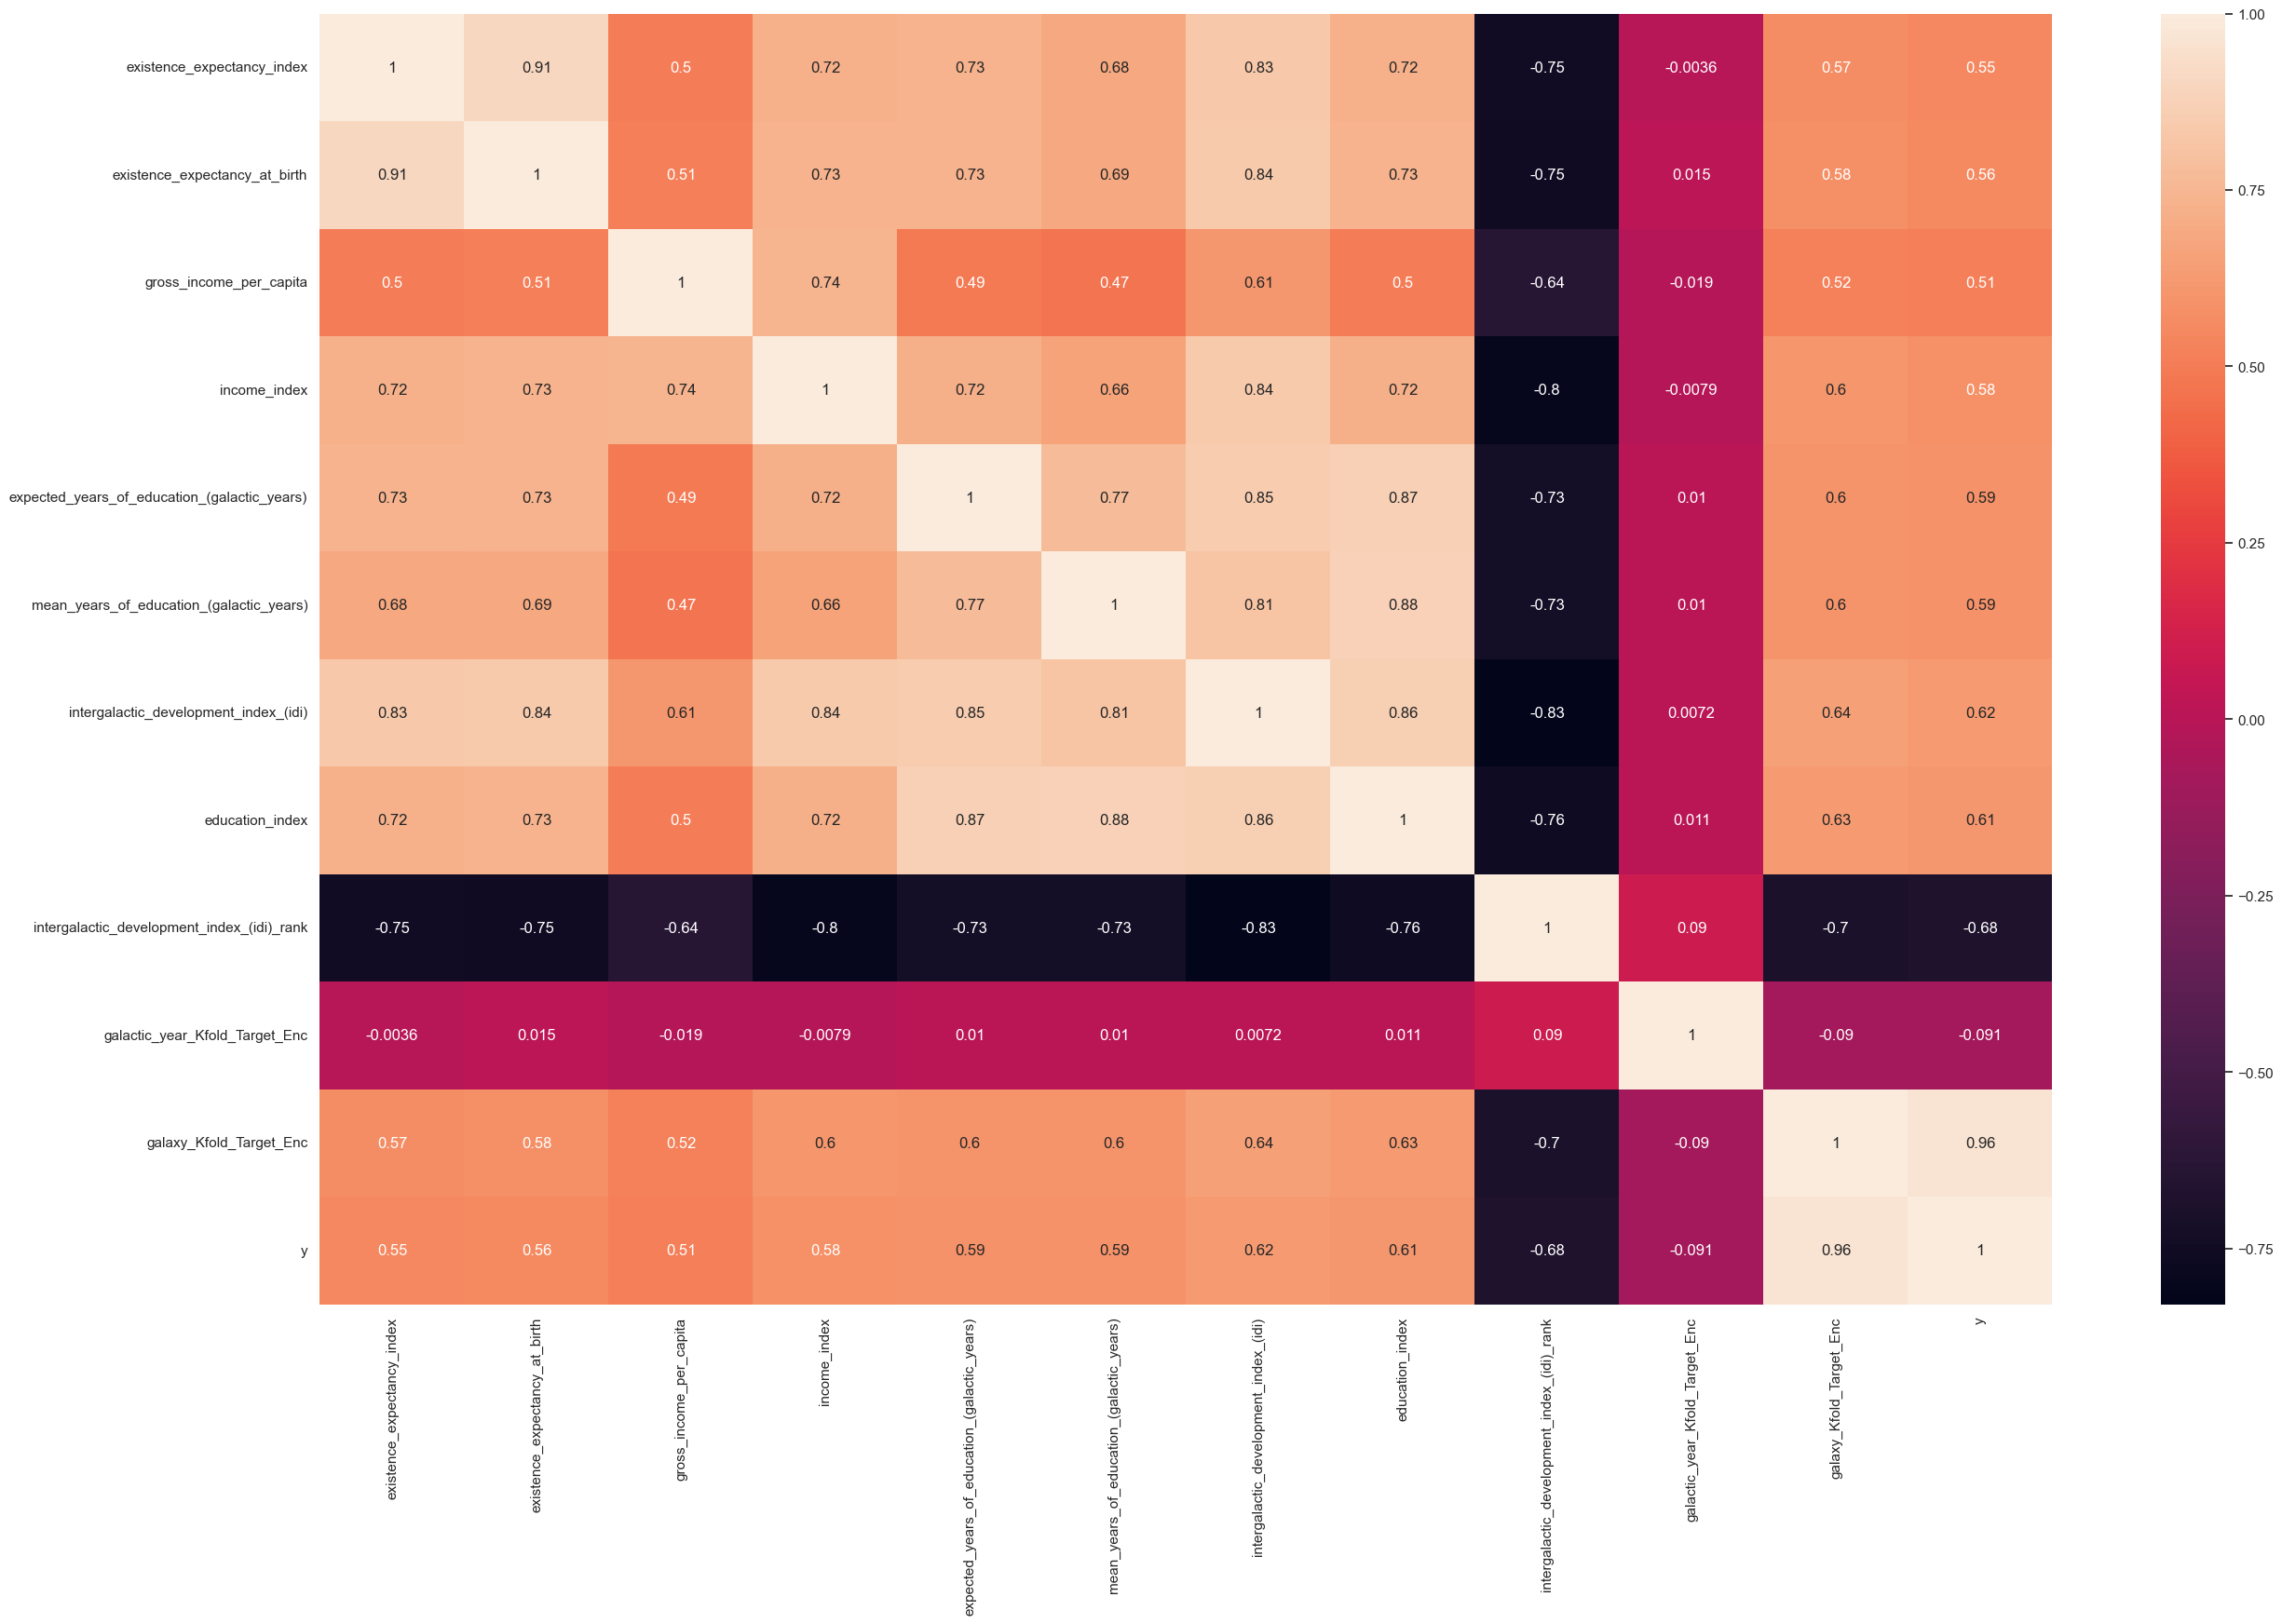

In [63]:
plt.figure(figsize = (30,18))
sns.heatmap(df_train.corr(method='pearson'), annot=True)
plt.show()

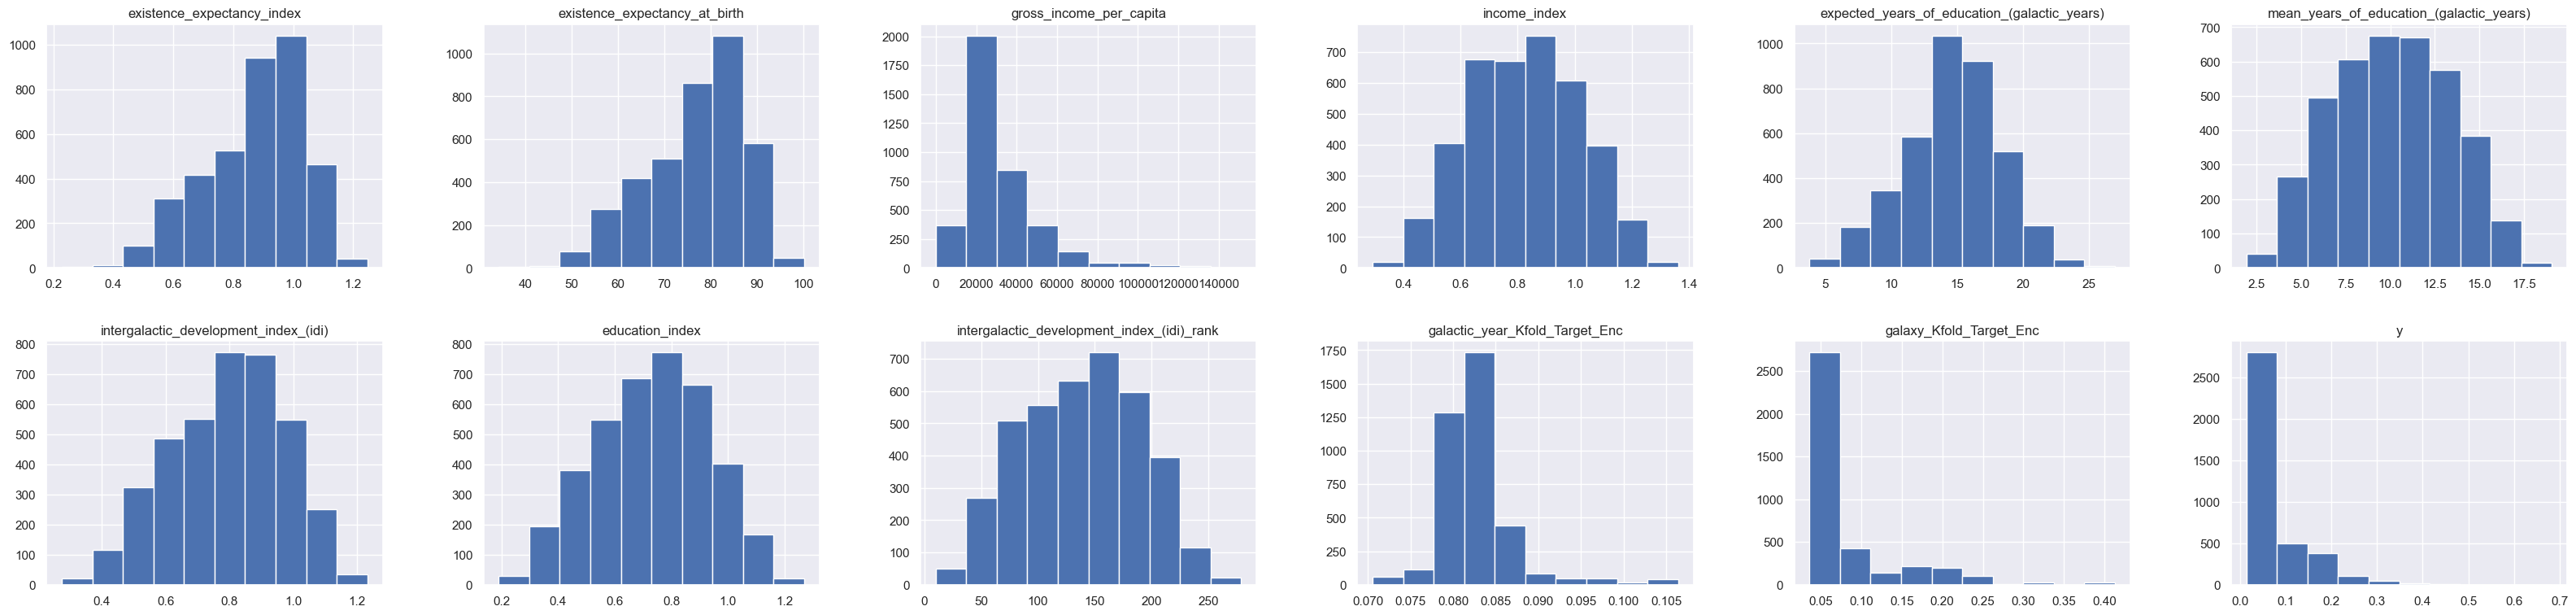

In [66]:
df_train.hist(figsize=(40,100), layout=(20,6))
plt.show()

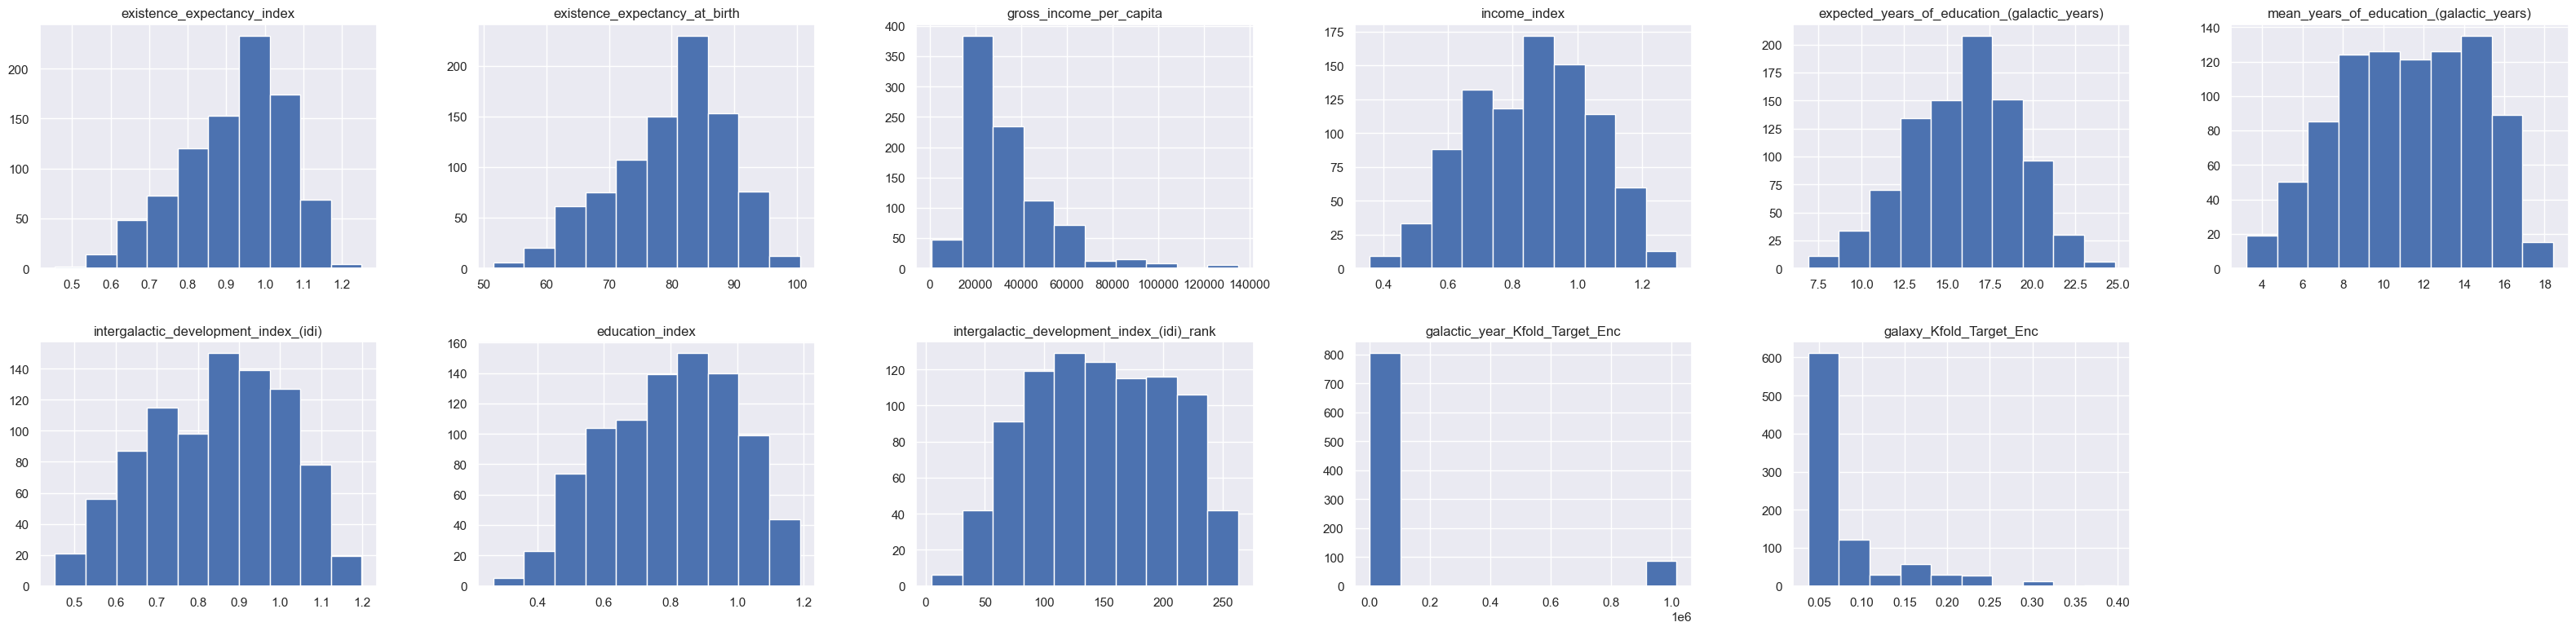

In [67]:
df_test.hist(figsize=(40,100), layout=(20,6))
plt.show()

In [68]:
scaler = RobustScaler()
df_train.iloc[:,:-1] = scaler.fit_transform(df_train.iloc[:,:-1])
df_train = pd.DataFrame(df_train) 
scaler = RobustScaler()
df_test.iloc[:,:] = scaler.fit_transform(df_test.iloc[:,:])
df_test = pd.DataFrame(df_test)

In [69]:
df_train.head(10)

existence_expectancy_index  existence_expectancy_at_birth  \
0                   -1.213603                      -1.085470   
1                   -0.388948                       0.136752   
2                   -1.077577                      -1.329060   
3                   -1.530287                      -1.822650   
4                    0.365569                       0.192308   

   gross_income_per_capita  income_index  \
0                 0.032653     -0.617243   
1                 0.214499      0.085798   
2                -1.077584     -1.116202   
3                -0.719818     -0.972820   
4                 3.239783      1.037068   

   expected_years_of_education_(galactic_years)  \
0                                     -1.466667   
1                                     -0.928139   
2                                     -1.333333   
3                                     -1.187030   
4                                     -0.235498   

   mean_years_of_education_(galactic_years)  \
0                                 -0.834597   
1                                 -1.057103   
2                                 -0.891622   
3                                 -0.845568   
4                                  0.606934   

   intergalactic_development_index_(idi)  education_index  \
0                              -1.009366        -1.030740   
1                               0.085981        -0.942005   
2                              -1.309346        -1.294946   
3                              -1.232519        -0.993169   
4                               0.379439         0.587407   

   intergalactic_development_index_(idi)_rank  galactic_year_Kfold_Target_Enc  \
0                                    0.635892                        0.377358   
1                                    0.141820                        0.415094   
2                                    0.859428                        0.377358   
3                                    0.862963                       -0.415094   
4                                   -0.866583                       -0.075472   

   galaxy_Kfold_Target_Enc         y  
0                -0.194404  0.052582  
1                 0.032401  0.059875  
2                -0.356406  0.050446  
3                -0.409426  0.049408  
4                 3.991900  0.154297

In [71]:
df_test.head(10)

existence_expectancy_index  existence_expectancy_at_birth  \
0                   -2.594805                      -2.402516   
1                   -2.202597                      -1.947170   
2                   -2.036364                      -1.773585   
3                   -2.010390                      -1.728302   
4                   -1.890909                      -2.090566   
5                   -1.883117                      -1.194969   
6                   -1.883117                      -1.245283   
7                   -1.859740                      -1.740881   
8                   -1.836364                      -1.627673   
9                   -1.836364                      -1.403774   

   gross_income_per_capita  income_index  \
0                -0.817126     -0.962393   
1                -1.262501     -0.675214   
2                -0.041861     -0.957265   
3                -0.406605     -0.105983   
4                -0.224125     -1.217094   
5                -0.727679     -0.500855   
6                -0.768992     -0.873504   
7                -0.910238     -1.068376   
8                -0.189730     -0.270085   
9                 0.053596     -0.851282   

   expected_years_of_education_(galactic_years)  \
0                                     -1.290273   
1                                     -1.992649   
2                                     -0.989625   
3                                     -1.024182   
4                                     -1.295456   
5                                     -0.956796   
6                                     -1.110575   
7                                     -0.993081   
8                                     -1.074290   
9                                     -1.146860   

   mean_years_of_education_(galactic_years)  \
0                                 -0.108578   
1                                 -1.106044   
2                                 -0.990228   
3                                 -0.224394   
4                                 -0.909157   
5                                 -1.321752   
6                                 -1.114730   
7                                 -0.253348   
8                                 -0.570394   
9                                 -0.107130   

   intergalactic_development_index_(idi)  education_index  \
0                              -1.192950        -0.856796   
1                              -1.379406        -1.341424   
2                              -1.200371        -1.088997   
3                              -0.643785        -0.965210   
4                              -1.254174        -0.775890   
5                              -1.128015        -1.069579   
6                              -0.768089        -1.351942   
7                              -0.753247        -0.460356   
8                              -0.643785        -0.303398   
9                              -0.732839        -0.486246   

   intergalactic_development_index_(idi)_rank  galactic_year_Kfold_Target_Enc  \
0                                    0.899900                        0.032463   
1                                    1.060596                        0.032463   
2                                    1.083361                        0.000000   
3                                    0.673586                        0.032463   
4                                    0.922665                        1.242985   
5                                    0.798125                        0.914862   
6                                    0.867760                       -0.137968   
7                                    0.911952                       -0.085138   
8                                    0.455306                        0.032463   
9                                    1.031135                       -0.007030   

   galaxy_Kfold_Target_Enc  
0                -0.290584  
1                -0.363778  
2                -0.363778  
3                -0.365528  
4                -0.3784

In [72]:
X = df_train.drop("y",axis=1)
y = df_train.y

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=85)
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [74]:
print("r2 eror rate :",r2_score(y_test,y_pred))
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("MAE :",mean_absolute_error(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 eror rate : 0.9644382890948802
MAPE : 0.06679813820448154
MAE : 0.005893473242340853
RMSE 0.01348091624396874


In [75]:
new_preds = xgb_model.predict(df_test)

In [76]:
df_test['new_preds'] = pd.Series(new_preds).to_frame()

<Figure size 3500x2000 with 0 Axes>

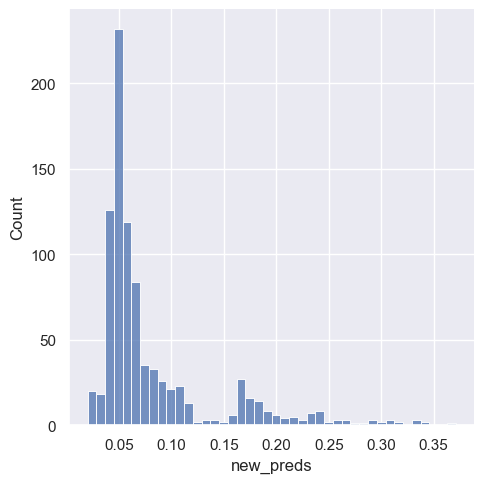

In [77]:
plt.figure(figsize = (35,20))
sns.displot(df_test['new_preds'])
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()

In [79]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train);
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)

In [80]:
from sklearn.metrics import r2_score

print(r2_score(y_test, model1_pred))
print(r2_score(y_test, model2_pred))
print(r2_score(y_test, model3_pred))

0.9095220171444232
0.23782298123722112
0.9440929325868304


In [81]:
from sklearn.ensemble import VotingRegressor

estimators = [('lr', model1), ('svr', model2), ('dt', model3)]

voting_reg = VotingRegressor(estimators)

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())])

In [82]:
voting_reg_pred = voting_reg.predict(X_test)
print(r2_score(y_test, voting_reg_pred))

0.8712202085444702


In [83]:
estimators = [('lr', model1), ('svr', model2), ('dt', model3)]
voting_reg = VotingRegressor(estimators, weights=[0.3, 0.1, 0.6])

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR()),
                            ('dt', DecisionTreeRegressor())],
                weights=[0.3, 0.1, 0.6])

In [84]:
voting_reg_pred = voting_reg.predict(X_test)
print(r2_score(y_test, voting_reg_pred))

0.9414511444538538


In [87]:
index = df_test['new_preds']
pot_inc = -np.log(index+0.01)+3
p2= pot_inc**2
df_test["p2"] = p2
Z = df_test.drop(df_test.iloc[:, 0:11],axis = 1)
Z

new_preds         p2
0     0.047371  34.318760
1     0.045625  34.681702
2     0.043943  35.044273
3     0.045518  34.704407
4     0.046824  34.431095
..         ...        ...
885   0.028478  39.158367
886   0.036832  36.737926
887   0.067594  30.872133
888   0.053986  33.052082
889   0.028741  39.073315

[890 rows x 2 columns]

In [88]:
Z = dd.sort_values('p2',ascending=False)
Z = dd.reset_index(drop=False)

In [89]:
Z['opt_pred']=0

In [90]:
Z

index  new_preds         p2  opt_pred
0        0   0.047371  34.318760         0
1        1   0.045625  34.681702         0
2        2   0.043943  35.044273         0
3        3   0.045518  34.704407         0
4        4   0.046824  34.431095         0
..     ...        ...        ...       ...
885    885   0.028478  39.158367         0
886    886   0.036832  36.737926         0
887    887   0.067594  30.872133         0
888    888   0.053986  33.052082         0
889    889   0.028741  39.073315         0

[890 rows x 4 columns]

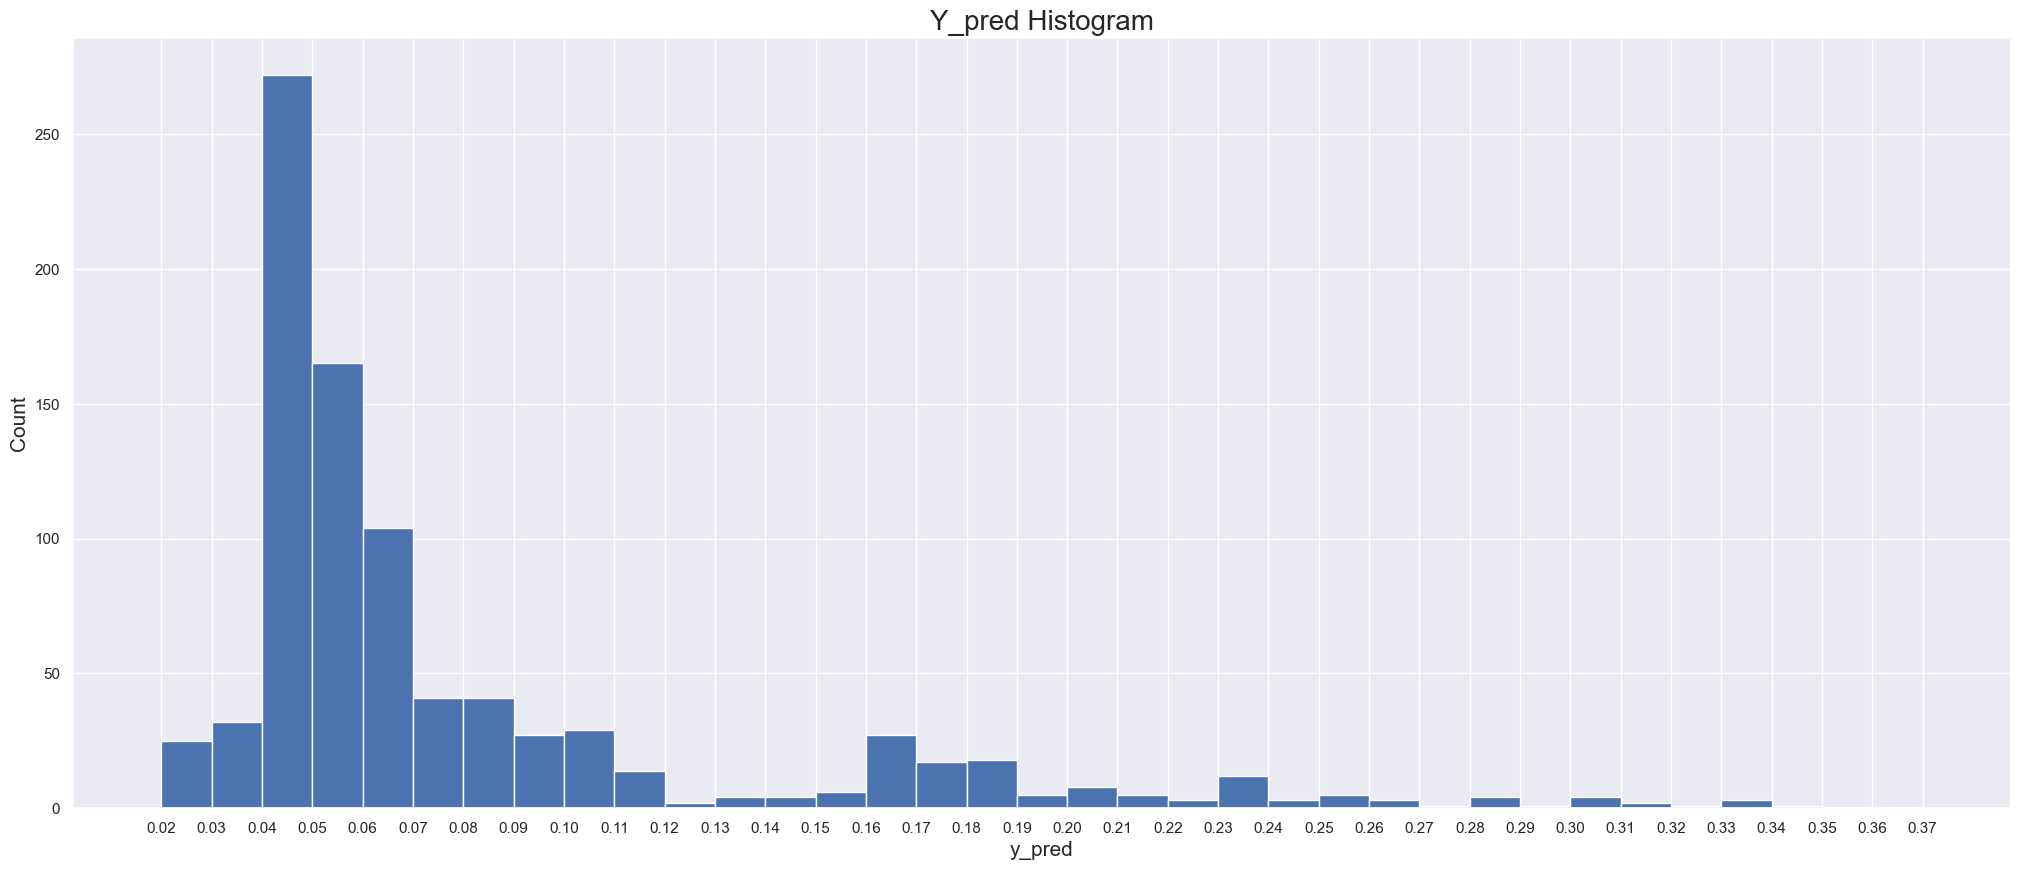

In [91]:
y_pred=Z.new_preds
x = np.arange(y_pred.min(),y_pred.max(),0.01)
plt.figure(figsize=(25,10))
plt.hist(y_pred,bins=x)
plt.title('Y_pred Histogram',fontsize=20)
plt.xlabel('y_pred',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(x)
plt.show()

In [92]:
n = 340

Z.opt_pred[:n]=100
Z.opt_pred[n:] = 0
c=100
alpha = 0.62685
for i in range(n,374):
    if c>=alpha: 
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
alpha=0.067345
for i in range(374,455):
    if c>=alpha:
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
    else:
        Z.loc[i,'opt_pred'] = 0
alpha = 0.03
for i in range(455,465):
    if c>=alpha: 
        c=c-alpha
        dd.loc[i,'opt_pred'] =c
alpha=0.4339465
for i in range(465,890):
    if c>=alpha: 
        c=c-alpha
        Z.loc[i,'opt_pred'] =c
    else:
        Z.loc[i,'opt_pred'] = 0

print(Z.opt_pred.sum())

40092.29752599994


In [94]:
Z['likely_inc'] = dd.opt_pred*(dd.p2**2)/1000
print(dd.opt_pred.sum())
Z.likely_inc.sum()

9907.698154999971


10467.64802953368

In [95]:
Z

index  new_preds         p2  opt_pred  likely_inc
0        0   0.047371  34.318760     100.0         NaN
1        1   0.045625  34.681702     100.0         NaN
2        2   0.043943  35.044273     100.0         NaN
3        3   0.045518  34.704407     100.0         NaN
4        4   0.046824  34.431095     100.0         NaN
..     ...        ...        ...       ...         ...
885    885   0.028478  39.158367       0.0         NaN
886    886   0.036832  36.737926       0.0         NaN
887    887   0.067594  30.872133       0.0         NaN
888    888   0.053986  33.052082       0.0         NaN
889    889   0.028741  39.073315       0.0         NaN

[890 rows x 5 columns]

In [96]:
print("sum",Z.opt_pred.sum())
print("left", (50000-Z.opt_pred.sum())) 
print("likely_inc",Z[dd.likely_inc<0.7]['opt_pred'].sum())

sum 40092.29752599994
left 9907.702474000063
likely_inc 0.0


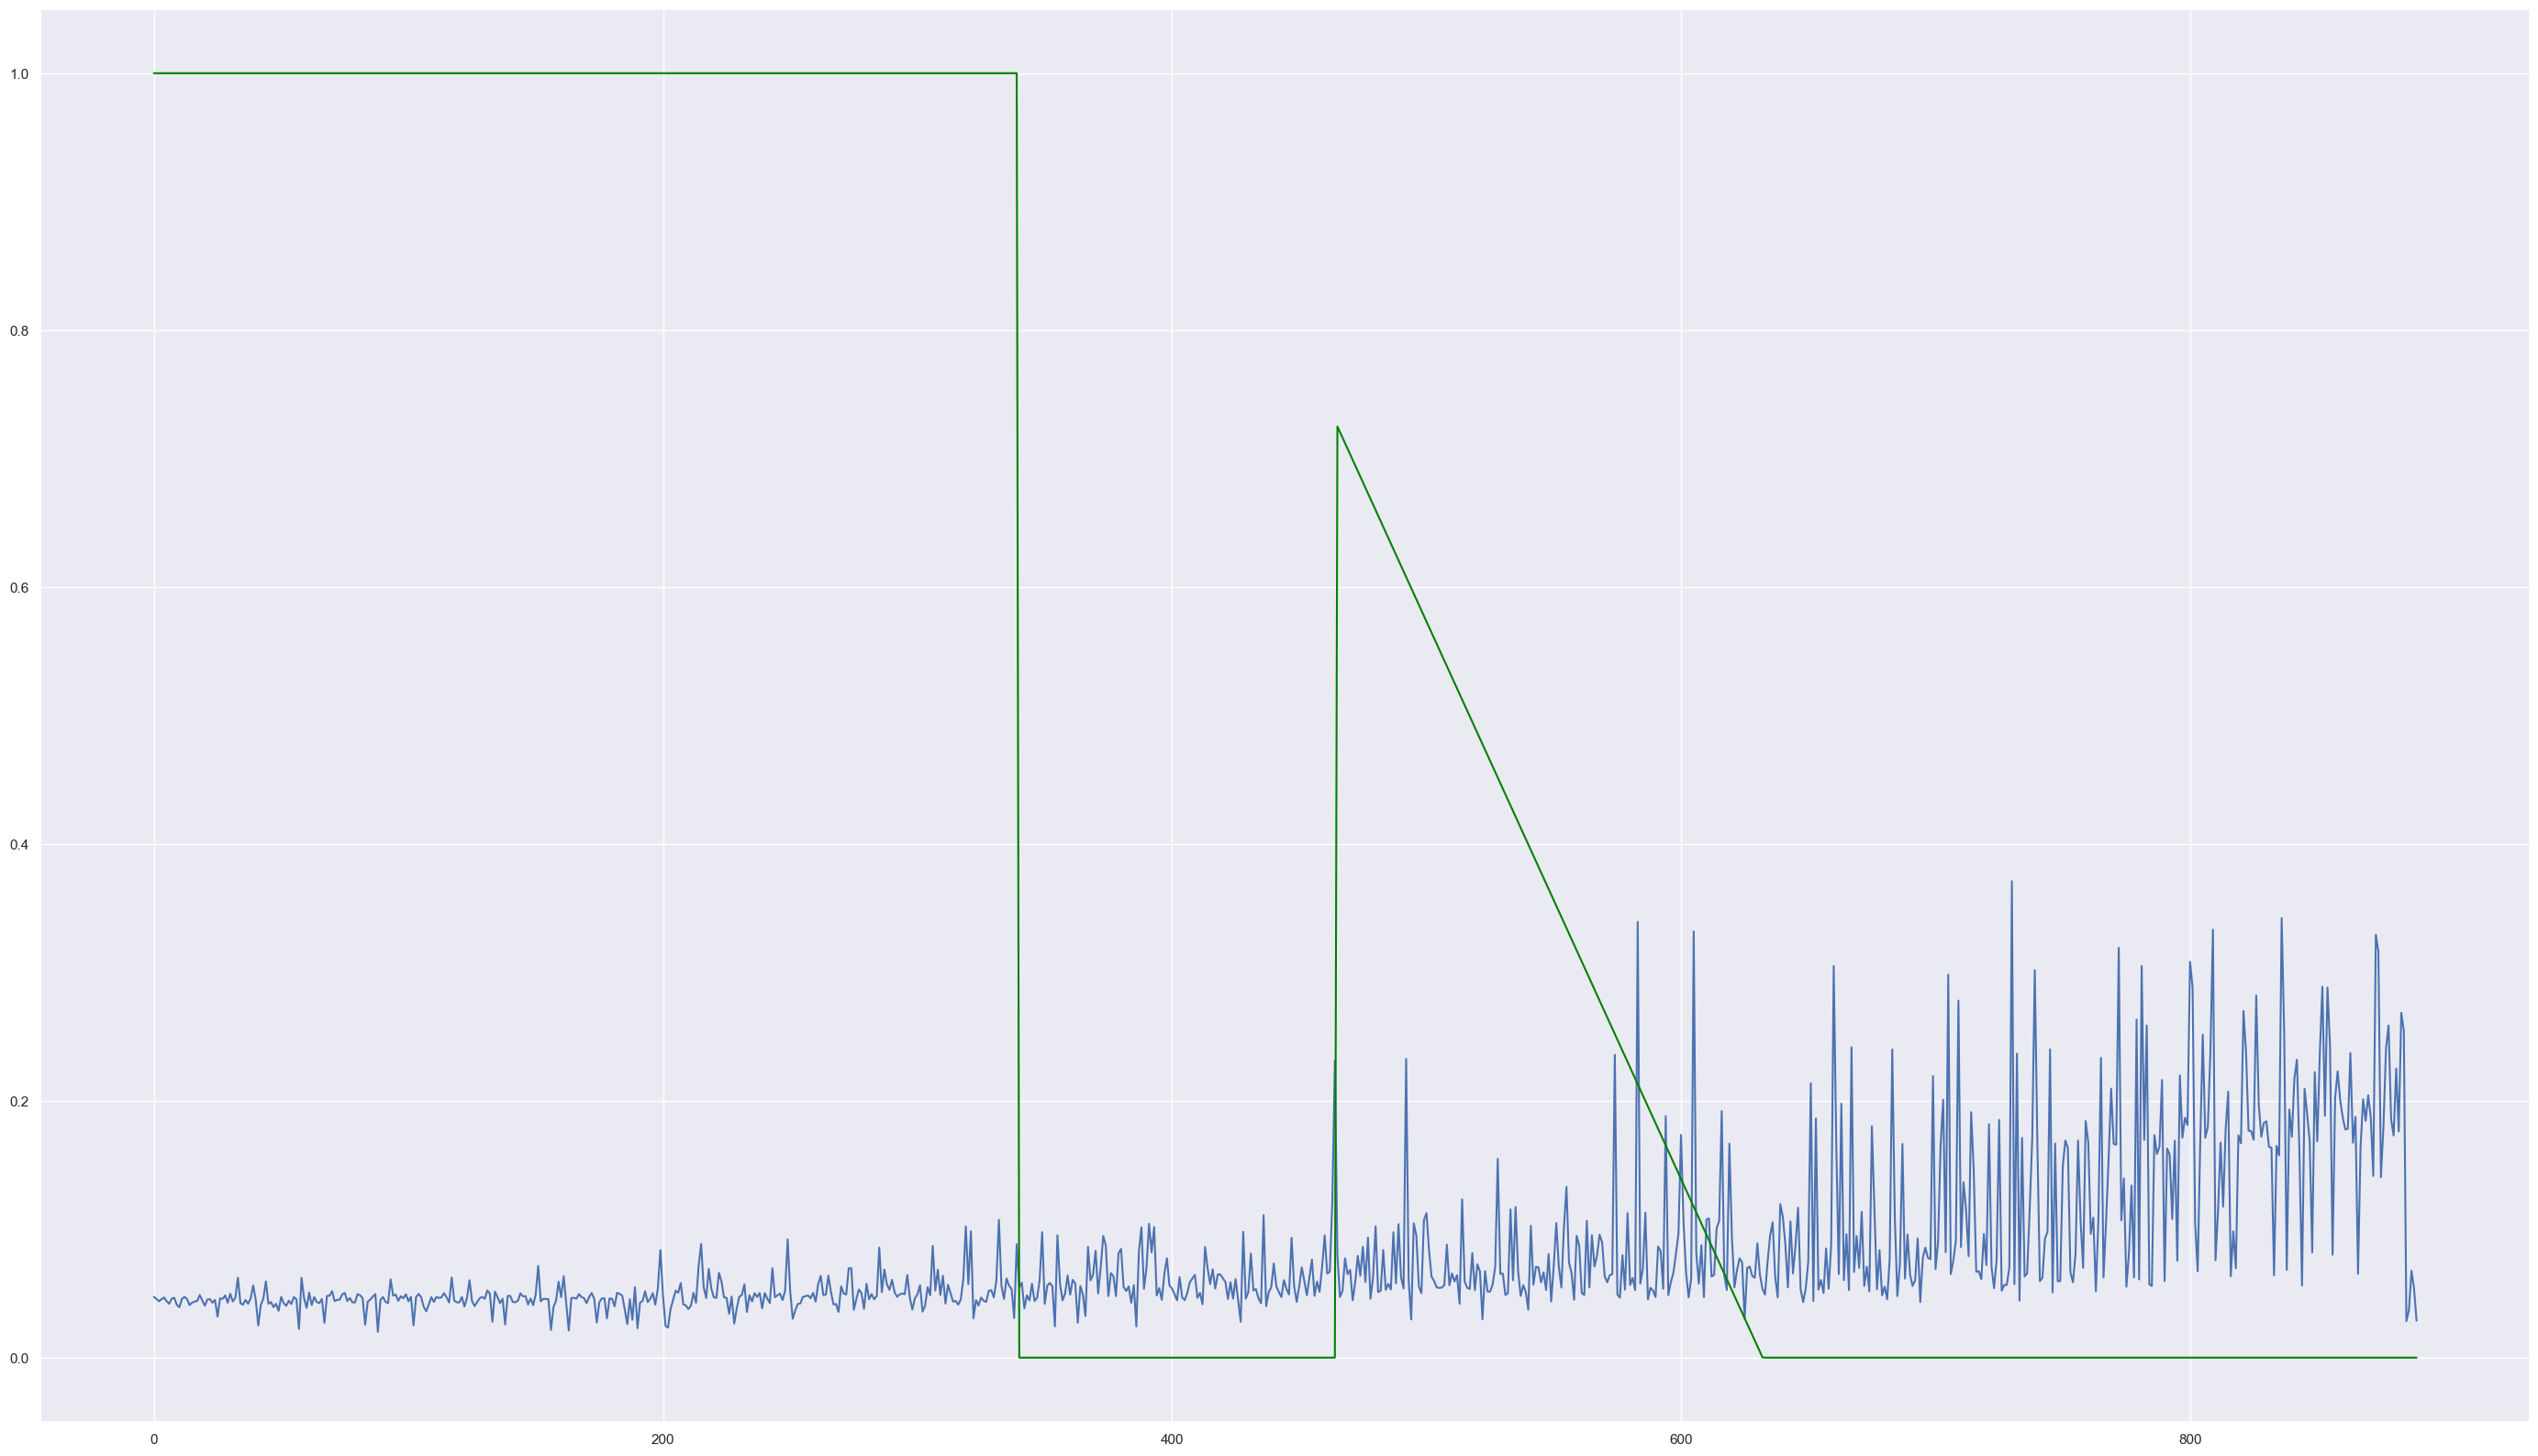

In [100]:
plt.figure(figsize = (35,20))
plt.plot(Z.new_preds)
plt.plot(Z.opt_pred/100,color="green")
plt.show()

In [101]:
Z=Z.sort_values('index',ascending=True)
Z=Z.reset_index(drop=True)

In [102]:
Z.rename(columns = {'new_preds':'pred'}, inplace=True)
Z

index      pred         p2  opt_pred  likely_inc
0        0  0.047371  34.318760     100.0         NaN
1        1  0.045625  34.681702     100.0         NaN
2        2  0.043943  35.044273     100.0         NaN
3        3  0.045518  34.704407     100.0         NaN
4        4  0.046824  34.431095     100.0         NaN
..     ...       ...        ...       ...         ...
885    885  0.028478  39.158367       0.0         NaN
886    886  0.036832  36.737926       0.0         NaN
887    887  0.067594  30.872133       0.0         NaN
888    888  0.053986  33.052082       0.0         NaN
889    889  0.028741  39.073315       0.0         NaN

[890 rows x 5 columns]

In [103]:
Z[['index', 'pred', 'opt_pred']].to_csv('sub.csv', index=False)

In [104]:
Z

index      pred         p2  opt_pred  likely_inc
0        0  0.047371  34.318760     100.0         NaN
1        1  0.045625  34.681702     100.0         NaN
2        2  0.043943  35.044273     100.0         NaN
3        3  0.045518  34.704407     100.0         NaN
4        4  0.046824  34.431095     100.0         NaN
..     ...       ...        ...       ...         ...
885    885  0.028478  39.158367       0.0         NaN
886    886  0.036832  36.737926       0.0         NaN
887    887  0.067594  30.872133       0.0         NaN
888    888  0.053986  33.052082       0.0         NaN
889    889  0.028741  39.073315       0.0         NaN

[890 rows x 5 columns]